# Exploratory Data Analysis

## Import Library

In [1]:
#Import library untuk data preparation dan visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import statistics
import src.util as util

from scipy.stats import ttest_ind# import scipy stats untuk uji statistik
from scipy.stats import t  
import scipy.stats as scs
import yaml
import matplotlib.pyplot as plt
import pickle

In [2]:
#load config data
config_data = util.load_config()

In [3]:
#cek param direktori
params_dir = "config/config.yaml"

In [4]:
# fungsi load parameter
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [5]:
# melakukan load param
params = load_params(params_dir)

In [6]:
#sanity check
params

{'raw_dataset_dir': 'dataset/1 - raw data/',
 'train_set_path': ['dataset/2 - processed/X_train.pkl',
  'dataset/2 - processed/y_train.pkl'],
 'valid_set_path': ['dataset/2 - processed/X_valid.pkl',
  'dataset/2 - processed/y_valid.pkl'],
 'test_set_path': ['dataset/2 - processed/X_test.pkl',
  'dataset/2 - processed/y_test.pkl'],
 'train_feng_set_path': ['dataset/2 - processed/X_train_feng.pkl',
  'dataset/2 - processed/y_train_feng.pkl'],
 'valid_feng_set_path': ['dataset/2 - processed/X_valid_feng.pkl',
  'dataset/2 - processed/y_valid_feng.pkl'],
 'test_feng_set_path': ['dataset/2 - processed/X_test_feng.pkl',
  'dataset/2 - processed/y_test_feng.pkl'],
 'impute_data_train': ['dataset/2 - processed/X_train_impute.pkl',
  'dataset/2 - processed/y_test_impute.pkl'],
 'impute_data_test': ['dataset/2 - processed/X_test_impute.pkl',
  'dataset/2 - processed/y_test_impute.pkl'],
 'impute_data_valid': ['dataset/2 - processed/X_valid_impute.pkl',
  'dataset/2 - processed/y_valid_impute.pkl

# Import Data

Import data dengan format pickle dan akan diload menjadi dataframe sesuai dengan format save sebelumnya

In [7]:
# Memuat DataFrame dari file pickle
X_train = pickle.load(open(config_data["train_set_path"][0], "rb"))
y_train = pickle.load(open(config_data["train_set_path"][1], "rb"))

In [8]:
#Import data yang sudah dibuat sebelumnya dari proses data preparation
X_train = util.pickle_load(config_data["train_set_path"][0])
y_train = util.pickle_load(config_data["train_set_path"][1])

In [9]:
#Sanity Check Data
X_train

TransactionAmt ProductCD  card1  card2  card3       card4  card5  \
378585          59.000         W   6470  111.0  150.0        visa  226.0   
85054           39.000         W   7826  481.0  150.0  mastercard  224.0   
442830          48.950         W   3070  537.0  150.0        visa  226.0   
448182        3224.450         W   9803  583.0  150.0        visa  226.0   
390346          34.000         W  13139  512.0  150.0  mastercard  224.0   
...                ...       ...    ...    ...    ...         ...    ...   
194278          59.000         W   3277  111.0  150.0        visa  226.0   
192476         100.000         H   7585  553.0  150.0        visa  226.0   
17730           47.732         C  10086  500.0  185.0  mastercard  224.0   
28030           25.000         W   6933  477.0  150.0  mastercard  117.0   
277869         107.950         W  14290  512.0  150.0        visa  226.0   

         card6  addr1  addr2  ...   V312       V313       V314       V315  \
378585   debit  299.0   87.0  ...  102.0   0.000000   0.000000   0.000000   
85054    debit  184.0   87.0  ...    0.0   0.000000   0.000000   0.000000   
442830   debit  315.0   87.0  ...    0.0  36.950001  36.950001  36.950001   
448182  credit  264.0   87.0  ...    0.0   0.000000   0.000000   0.000000   
390346   debit  143.0   87.0  ...    0.0   0.000000   0.000000   0.000000   
...        ...    ...    ...  ...    ...        ...        ...        ...   
194278   debit  231.0   87.0  ...    0.0   0.000000   0.000000   0.000000   
192476  credit  299.0   87.0  ...    0.0   0.000000   0.000000   0.000000   
17730   credit  431.0   60.0  ...    0.0   0.000000   0.000000   0.000000   
28030    debit  204.0   87.0  ...  119.0   0.000000   0.000000   0.000000   
277869   debit  177.0   87.0  ...    0.0   0.000000   0.000000   0.000000   

        V316  V317  V318         V319         V320         V321  
378585   0.0   0.0   0.0     0.000000     0.000000     0.000000  
85054    0.0   0.0   0.0     0.000000     0.000000     0.000000  
442830   0.0   0.0   0.0     0.000000     0.000000     0.000000  
448182   0.0   0.0   0.0  6448.899902  6448.899902  6448.899902  
390346   0.0   0.0   0.0     0.000000     0.000000     0.000000  
...      ...   ...   ...          ...          ...          ...  
194278   0.0   0.0   0.0     0.000000     0.000000     0.000000  
192476   0.0   0.0   0.0     0.000000     0.000000     0.000000  
17730    0.0   0.0   0.0     0.000000     0.000000     0.000000  
28030    0.0   0.0   0.0     0.000000     0.000000     0.000000  
277869   0.0   0.0   0.0     0.000000     0.000000     0.000000  

[413378 rows x 217 columns]

In [10]:
#Sanity Check Data
y_train

378585    0
85054     0
442830    0
448182    0
390346    0
         ..
194278    0
192476    0
17730     1
28030     0
277869    0
Name: isFraud, Length: 413378, dtype: int64

## Menggabungkan Data untuk dijadikan Set EDA

In [11]:
#Menggabungkan x train dan y train untuk keperluan EDA
df_train = pd.merge(X_train, y_train, left_index=True, right_index=True)
#Sanity Check Data
df_train

TransactionAmt ProductCD  card1  card2  card3       card4  card5  \
378585          59.000         W   6470  111.0  150.0        visa  226.0   
85054           39.000         W   7826  481.0  150.0  mastercard  224.0   
442830          48.950         W   3070  537.0  150.0        visa  226.0   
448182        3224.450         W   9803  583.0  150.0        visa  226.0   
390346          34.000         W  13139  512.0  150.0  mastercard  224.0   
...                ...       ...    ...    ...    ...         ...    ...   
194278          59.000         W   3277  111.0  150.0        visa  226.0   
192476         100.000         H   7585  553.0  150.0        visa  226.0   
17730           47.732         C  10086  500.0  185.0  mastercard  224.0   
28030           25.000         W   6933  477.0  150.0  mastercard  117.0   
277869         107.950         W  14290  512.0  150.0        visa  226.0   

         card6  addr1  addr2  ...       V313       V314       V315  V316  \
378585   debit  299.0   87.0  ...   0.000000   0.000000   0.000000   0.0   
85054    debit  184.0   87.0  ...   0.000000   0.000000   0.000000   0.0   
442830   debit  315.0   87.0  ...  36.950001  36.950001  36.950001   0.0   
448182  credit  264.0   87.0  ...   0.000000   0.000000   0.000000   0.0   
390346   debit  143.0   87.0  ...   0.000000   0.000000   0.000000   0.0   
...        ...    ...    ...  ...        ...        ...        ...   ...   
194278   debit  231.0   87.0  ...   0.000000   0.000000   0.000000   0.0   
192476  credit  299.0   87.0  ...   0.000000   0.000000   0.000000   0.0   
17730   credit  431.0   60.0  ...   0.000000   0.000000   0.000000   0.0   
28030    debit  204.0   87.0  ...   0.000000   0.000000   0.000000   0.0   
277869   debit  177.0   87.0  ...   0.000000   0.000000   0.000000   0.0   

        V317  V318         V319         V320         V321  isFraud  
378585   0.0   0.0     0.000000     0.000000     0.000000        0  
85054    0.0   0.0     0.000000     0.000000     0.000000        0  
442830   0.0   0.0     0.000000     0.000000     0.000000        0  
448182   0.0   0.0  6448.899902  6448.899902  6448.899902        0  
390346   0.0   0.0     0.000000     0.000000     0.000000        0  
...      ...   ...          ...          ...          ...      ...  
194278   0.0   0.0     0.000000     0.000000     0.000000        0  
192476   0.0   0.0     0.000000     0.000000     0.000000        0  
17730    0.0   0.0     0.000000     0.000000     0.000000        1  
28030    0.0   0.0     0.000000     0.000000     0.000000        0  
277869   0.0   0.0     0.000000     0.000000     0.000000        0  

[413378 rows x 218 columns]

In [12]:
# Mengidentifikasi kolom-kolom numerik
numeric_cols = df_train.select_dtypes(include=np.number).columns

# Menghitung skewness untuk setiap kolom numerik
skewness = {}
for col in numeric_cols:
    skewness[col] = df_train[col].skew()

# Menampilkan hasil skewness
for col, value in skewness.items():
    print(f"Skewness for {col}: {value}")

Skewness for TransactionAmt: 12.400478118125468
Skewness for card1: -0.04069649393674777
Skewness for card2: -0.19883319697543947
Skewness for card3: 2.017786443986007
Skewness for card5: -1.2265787194015403
Skewness for addr1: 0.37400981911716513
Skewness for addr2: -14.454232735793099
Skewness for C1: 24.085489095925123
Skewness for C2: 23.80406286023116
Skewness for C3: 93.22980702860477
Skewness for C4: 22.203285011414444
Skewness for C5: 5.781964833979288
Skewness for C6: 19.816844511225945
Skewness for C7: 27.428251162479494
Skewness for C8: 26.295065592197144
Skewness for C9: 5.689107021230622
Skewness for C10: 25.435296881281502
Skewness for C11: 22.461901949804027
Skewness for C12: 27.65318002679576
Skewness for C13: 8.905861396194787
Skewness for C14: 16.516885188942535
Skewness for D1: 1.800977526093526
Skewness for D2: 1.0104796944329901
Skewness for D3: 4.526541867820433
Skewness for D4: 1.1714659616813103
Skewness for D10: 1.389841099542233
Skewness for D11: 1.04969741612

In [13]:
import pandas as pd

# Cek skewness
skewness_lengkap = df_train.skew(numeric_only=True)

# Memisahkan nilai skewness di atas 0.5 dan di bawah/sama dengan 0.5
skew_above_05 = {col: value for col, value in skewness_lengkap.items() if value > 0.5}
skew_below_eq_05 = {col: value for col, value in skewness_lengkap.items() if value <= 0.5}

# Menampilkan hasil
print("Skewness di atas 0.5:")
for col, value in skew_above_05.items():
    print(f"{col}: {value}")

print("\nSkewness di bawah/sama dengan 0.5:")
for col, value in skew_below_eq_05.items():
    print(f"{col}: {value}")

Skewness di atas 0.5:
TransactionAmt: 12.400478118125468
card3: 2.017786443986007
C1: 24.085489095925123
C2: 23.80406286023116
C3: 93.22980702860477
C4: 22.203285011414444
C5: 5.781964833979288
C6: 19.816844511225945
C7: 27.428251162479494
C8: 26.295065592197144
C9: 5.689107021230622
C10: 25.435296881281502
C11: 22.461901949804027
C12: 27.65318002679576
C13: 8.905861396194787
C14: 16.516885188942535
D1: 1.800977526093526
D2: 1.0104796944329901
D3: 4.526541867820433
D4: 1.1714659616813103
D10: 1.389841099542233
D11: 1.0496974161243973
D15: 0.9553061157780854
V2: 6.761614235848903
V3: 5.309893941966421
V6: 6.75418541483616
V7: 5.5140028124965825
V8: 8.602582641128537
V9: 6.897901226185877
V11: 0.7358378663088275
V15: 2.615073174610291
V16: 3.952463402583968
V17: 3.7289648430644387
V18: 3.9455015604871804
V21: 2.308212816523271
V22: 3.5877116487926664
V23: 11.895916190523373
V24: 9.02852264884102
V26: 3.2607480286478556
V27: 40.910815023094784
V28: 42.79313350975898
V29: 0.781615192755855

In [14]:
# Cek skewness
skewness = df_train.skew(numeric_only=True)

# Memisahkan nama kolom dengan nilai skewness di atas 0.5 dan di bawah 0.05
skew_above_05 = []
skew_below_005 = []

for col, value in skewness.items():
    if value > 0.5:
        skew_above_05.append(col)
    elif value <= 0.5:
        skew_below_005.append(col)

# Menampilkan hasil
print("Kolom dengan skewness di atas 0.5:")
print(skew_above_05)

print("\nKolom dengan skewness di bawah 0.5:")
print(skew_below_005)

Kolom dengan skewness di atas 0.5:
['TransactionAmt', 'card3', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D10', 'D11', 'D15', 'V2', 'V3', 'V6', 'V7', 'V8', 'V9', 'V11', 'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V23', 'V24', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V37', 'V38', 'V39', 'V40', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V62', 'V63', 'V64', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V77', 'V78', 'V79', 'V80', 'V81', 'V83', 'V84', 'V85', 'V86', 'V87', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134'

Rules :

-   jika kolom mendapati skewnya sebesar > +- 0.5, maka dari itu kolom tersebut akan diimputasi dengan median
-   jika kolom mendapati skewnya sebesar <= +- 0.5 kolom lainnya akan diimputasi dengan mean

Kolom dengan skewness di atas 0.5:
['isFraud', 'TransactionAmt', 'card3', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D10', 'D11', 'D15', 'V2', 'V3', 'V6', 'V7', 'V8', 'V9', 'V11', 'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V23',
'V24', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V37', 'V38', 'V39', 'V40', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V62', 'V63', 'V64', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V77', 'V78', 'V79', 'V80', 'V81', 'V83', 'V84', 'V85', 'V86', 'V87', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']

Kolom dengan skewness di bawah 0.5:
['card1', 'card2', 'card5', 'addr1', 'addr2', 'V1', 'V4', 'V5', 'V10', 'V12', 'V13', 'V14', 'V19', 'V20', 'V25', 'V35', 'V36', 'V41', 'V53', 'V54', 'V61', 'V65', 'V66', 'V75', 'V76', 'V82', 'V88', 'V107']

In [15]:
# pisahkan menjadi 2 kelas untuk melihat apakah kita perlu melakukan imputasi berdasarkan kelas
dataset_nontfraud = df_train[df_train.isFraud == 0].copy()
dataset_fraud = df_train[df_train.isFraud != 0].copy()

In [16]:
# Mengatur opsi tampilan pandas
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', 230)  # Menampilkan 400 kolom

# Menghitung rata-rata pada masing-masing kolom
mean_values_nonfraud = dataset_nontfraud.mean()

# Menampilkan semua nilai mean
print(mean_values_nonfraud)

TransactionAmt     134.482071
card1             9913.580123
card2              362.439658
card3              152.862334
card5              199.570159
addr1              290.648453
addr2               86.816098
C1                  13.219773
C2                  14.058684
C3                   0.005770
C4                   3.633072
C5                   5.739114
C6                   8.742613
C7                   2.464317
C8                   4.477992
C9                   4.595347
C10                  4.634947
C11                  9.680961
C12                  3.475678
C13                 32.809463
C14                  8.197472
D1                  96.603021
D2                 172.541147
D3                  28.977006
D4                 142.390965
D10                126.631733
D11                147.999981
D15                166.816058
V1                   0.999939
V2                   1.044526
V3                   1.075407
V4                   0.846090
V5                   0.874785
V6        

C:\Users\hp\AppData\Local\Temp\ipykernel_14908\699230120.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values_nonfraud = dataset_nontfraud.mean()


In [17]:
# Mengatur opsi tampilan pandas
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', 230)  # Menampilkan 400 kolom

# Menghitung rata-rata pada masing-masing kolom
mean_values_fraud = dataset_fraud.mean()

# Menampilkan semua nilai mean
print(mean_values_fraud)

TransactionAmt     148.294067
card1             9527.376934
card2              365.918633
card3              162.444514
card5              192.146063
addr1              294.364567
addr2               86.259849
C1                  34.917216
C2                  44.649920
C3                   0.000347
C4                  14.835820
C5                   1.315245
C6                  16.596558
C7                  11.706266
C8                  20.882243
C9                   1.635973
C10                 19.081743
C11                 23.406148
C12                 18.215252
C13                 24.431545
C14                 10.120741
D1                  38.859695
D2                  78.774093
D3                  11.496790
D4                  72.146512
D10                 51.743287
D11                 87.963761
D15                 78.331727
V1                   1.000000
V2                   1.072004
V3                   1.188299
V4                   0.885126
V5                   1.004027
V6        

C:\Users\hp\AppData\Local\Temp\ipykernel_14908\2614733475.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values_fraud = dataset_fraud.mean()


Semua kolom menunjukkan tidak jauh berbeda antara mean kelas 0 dan mean kelas 1. maka, imputasi tidak akan menggunakan data kelas, namun tabel df_train keseluruhan.

In [18]:
# Mengidentifikasi kolom-kolom kategorikal
categorical_cols = df_train.select_dtypes(include=['object', 'category']).columns

# Menampilkan kolom-kolom kategorikal
print(categorical_cols)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4',
       'M6'],
      dtype='object')


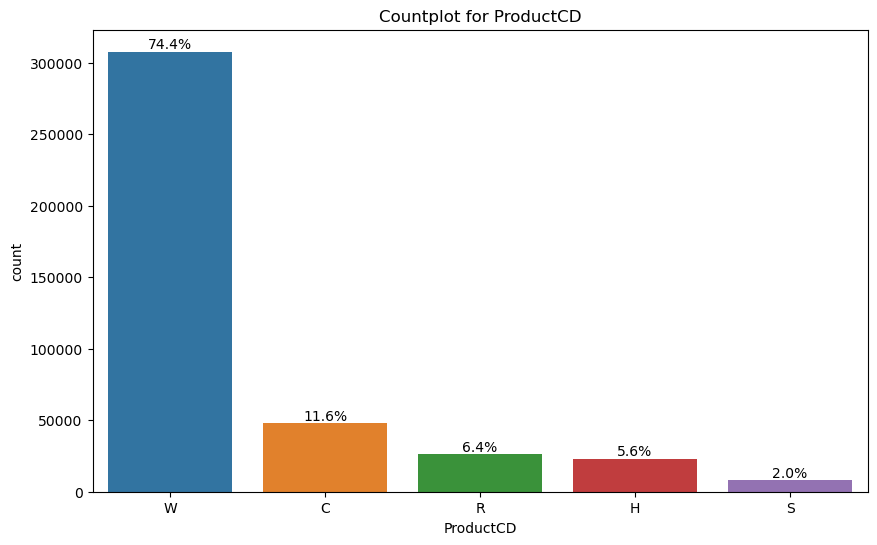

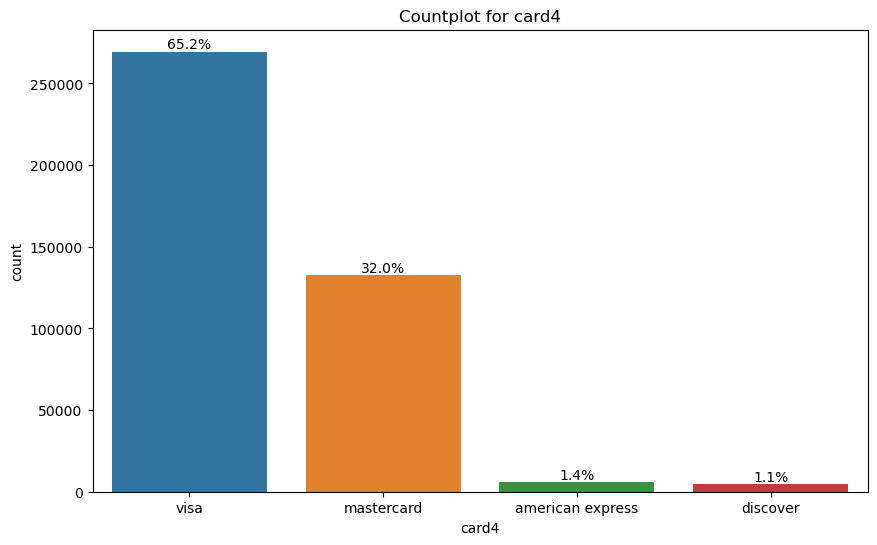

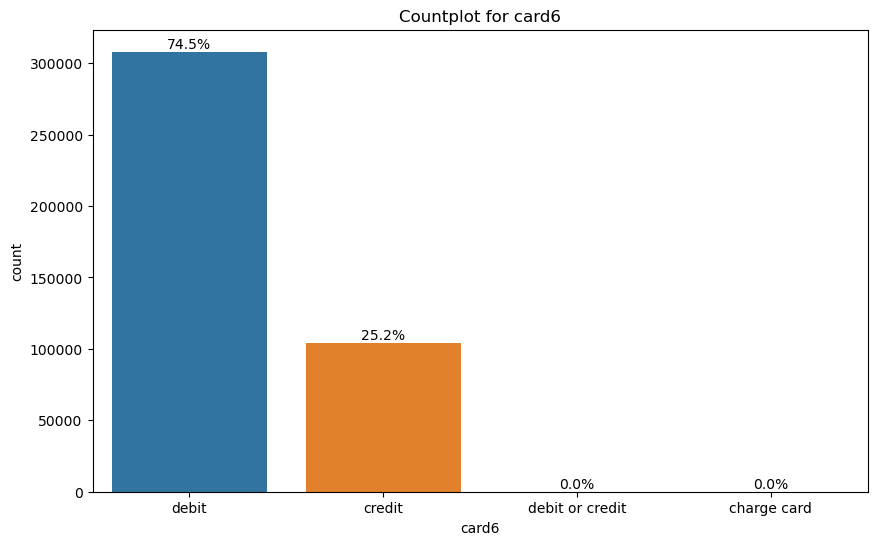

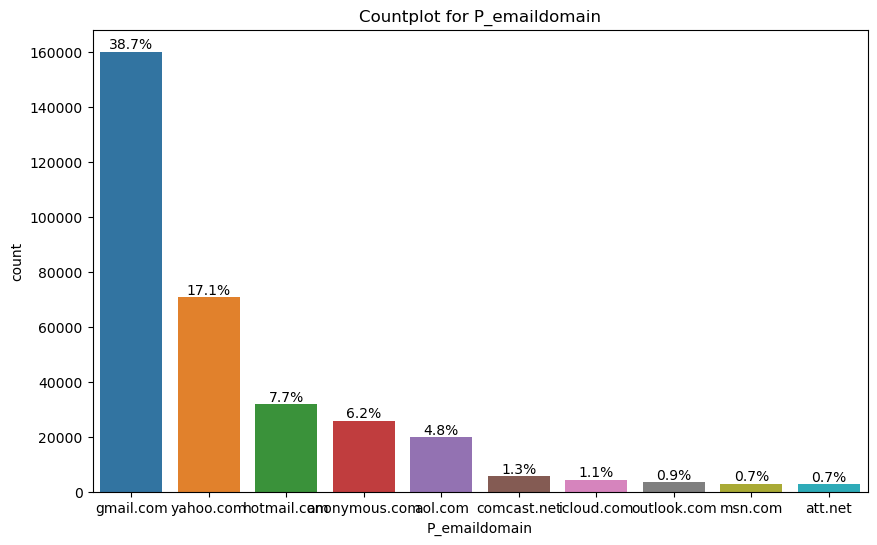

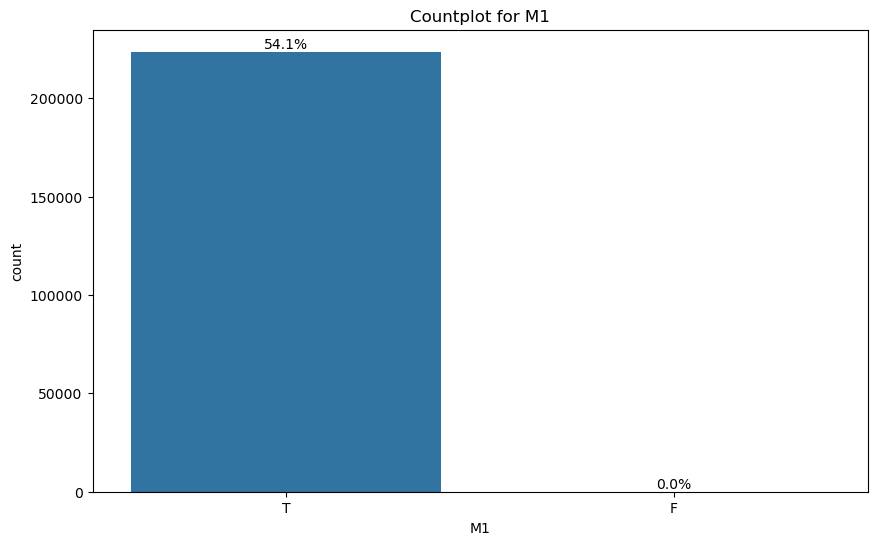

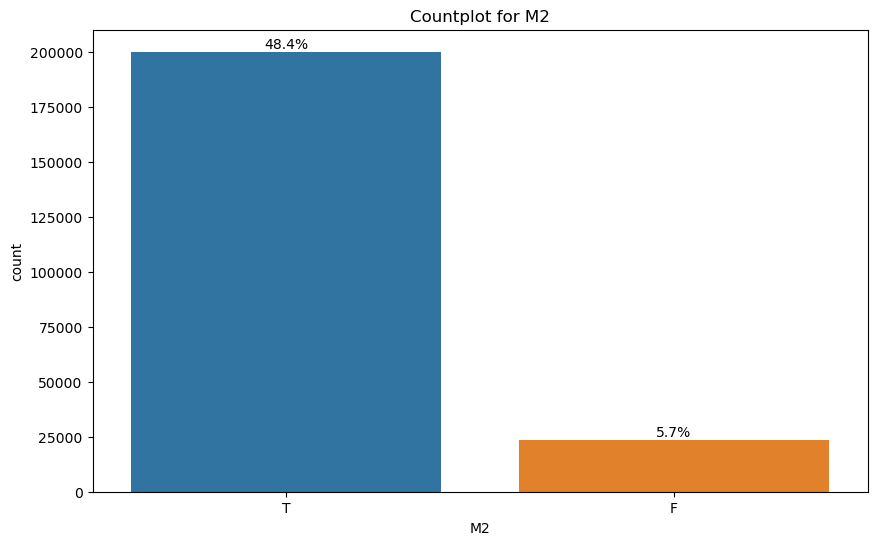

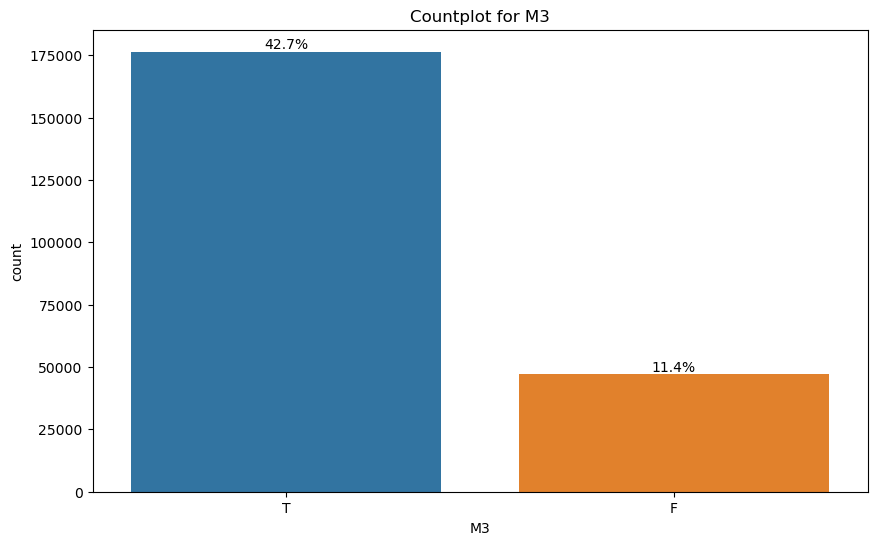

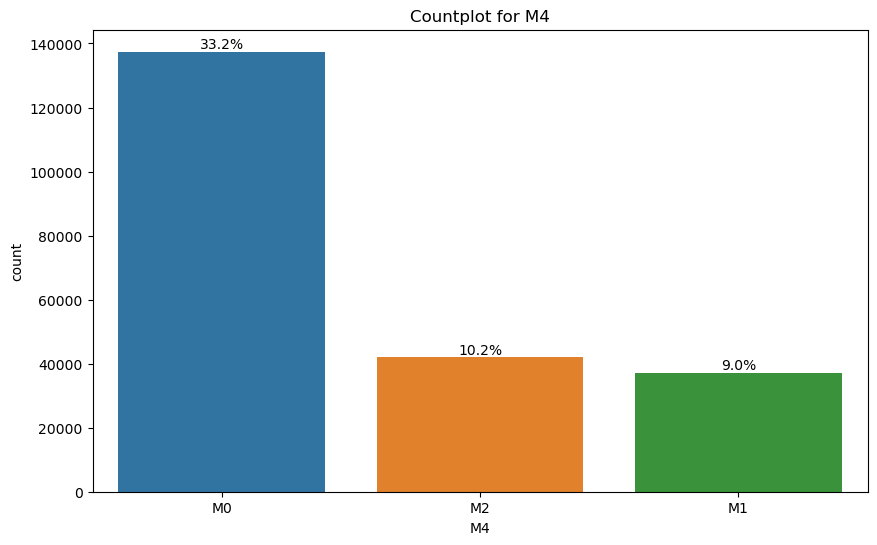

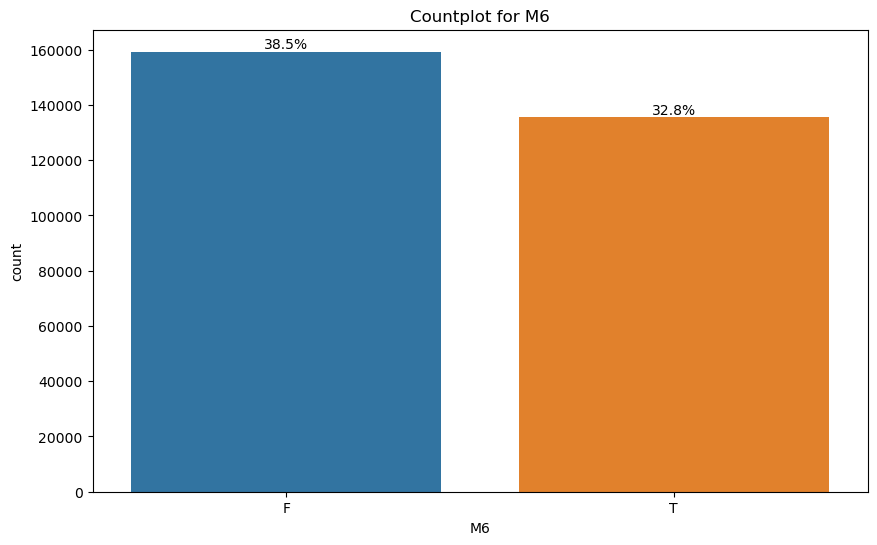

In [19]:
# Meloop melalui setiap kolom kategorikal
for col in categorical_cols:
    # Menghitung frekuensi nilai pada kolom
    value_counts = df_train[col].value_counts().sort_values(ascending=False)
    
    # Mengambil 10 data teratas
    top_10_values = value_counts.head(10)
    
    # Menampilkan countplot untuk 10 data teratas
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df_train, order=top_10_values.index)
    plt.title(f'Countplot for {col}')
    
    # Menambahkan label persentase pada setiap bar
    total = len(df_train[col])
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plt.gca().annotate(percentage, (x, y), ha='center', va='bottom')
    
    plt.show()

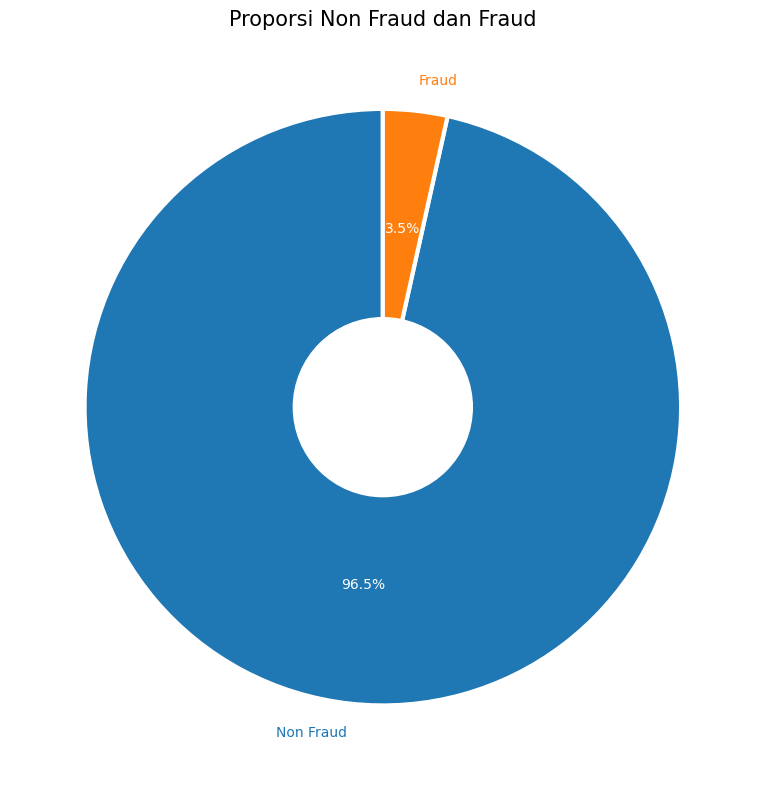

In [20]:
# Menghitung jumlah data Non Fraud dan Fraud
proporsi_fraud = df_train.groupby("isFraud")["card1"].count().reset_index()
proporsi_fraud.rename(columns = {"card1":"count"}, inplace=True)

# Menyimpan nilai kategori Non Fraud dan Fraud
fraud_user = proporsi_fraud["isFraud"].map({0: "Non Fraud", 1: "Fraud"})
count_fraud_user = proporsi_fraud["count"]

# Melakukan visualisasi data dengan menggunakan doughnut chart
fig, ax = plt.subplots(figsize=(10, 8))

# Membuat doughnut chart dengan menggunakan pie plot
patches, texts, pcts = ax.pie(
    count_fraud_user, labels=fraud_user, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'},
    startangle=90)

# Mengatur warna teks sesuai dengan warna setiap slice
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

# Membuat lingkaran di tengah doughnut chart
central_circle = plt.Circle((0, 0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)

# Mengatur warna persentase teks menjadi putih
plt.setp(pcts, color='white')
# Mengatur teks dengan fontweight 100
plt.setp(texts, fontweight=100)

# Memberikan judul pada doughnut chart
ax.set_title('Proporsi Non Fraud dan Fraud', fontsize=15)

# Menyesuaikan tata letak plot
plt.tight_layout()

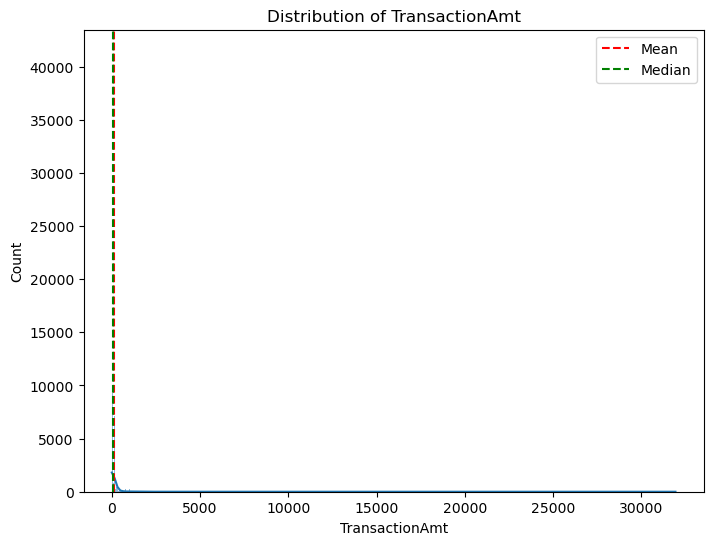

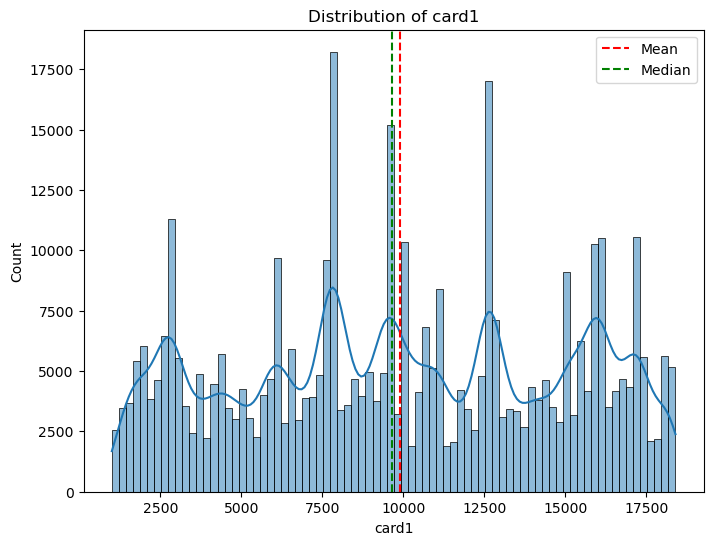

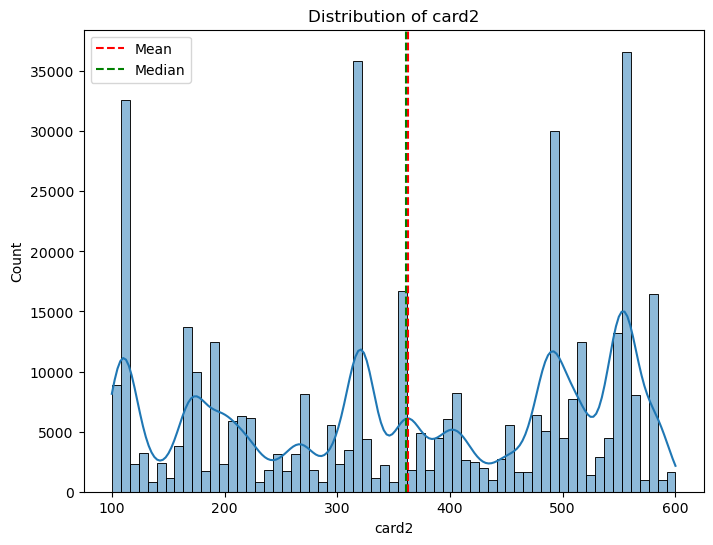

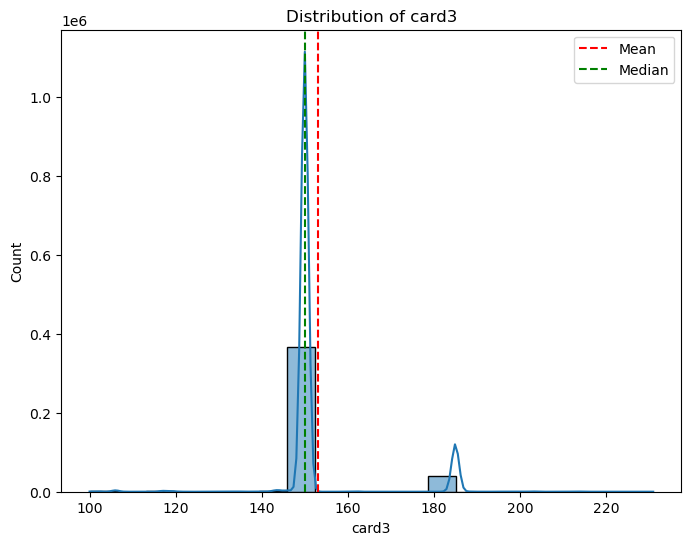

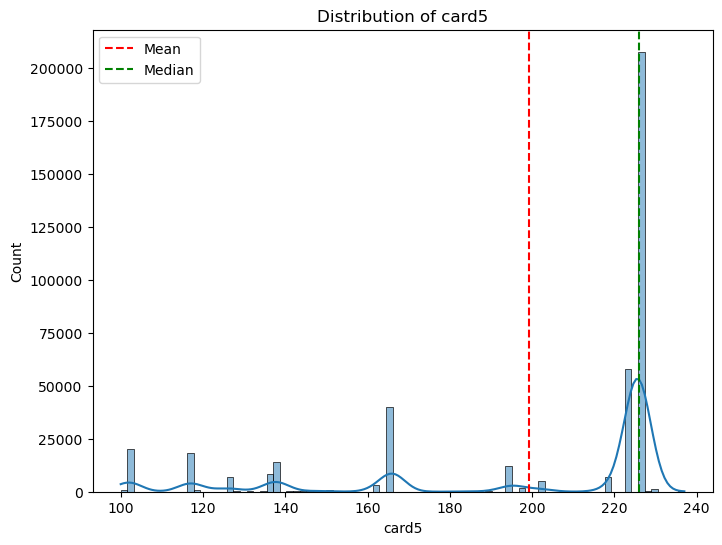

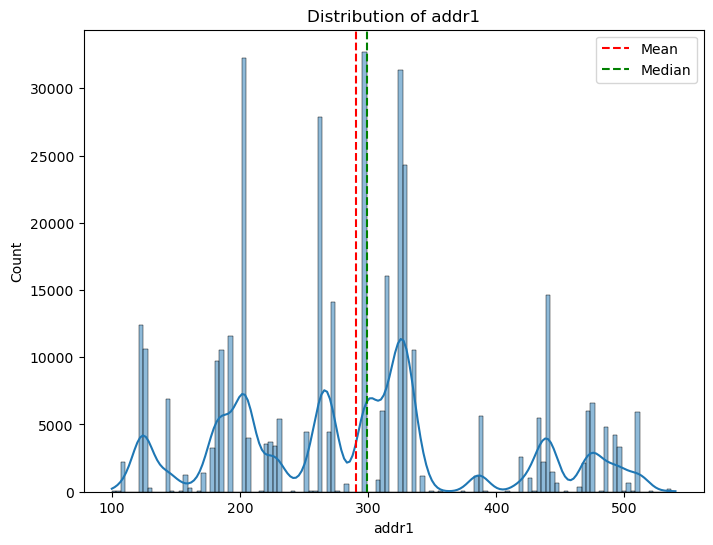

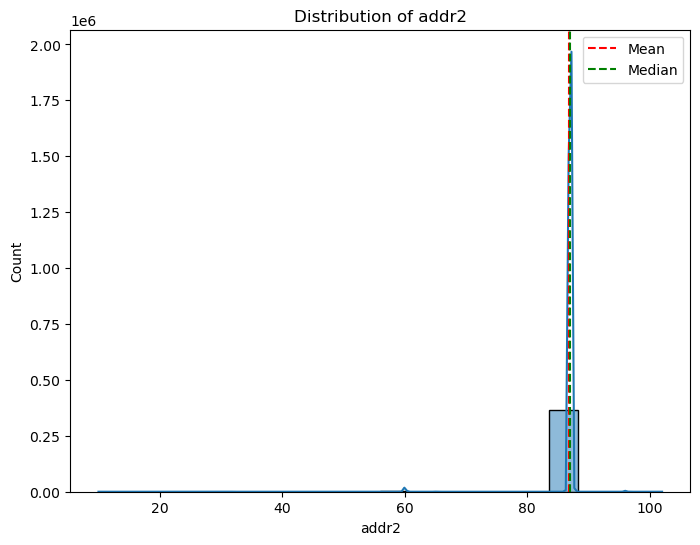

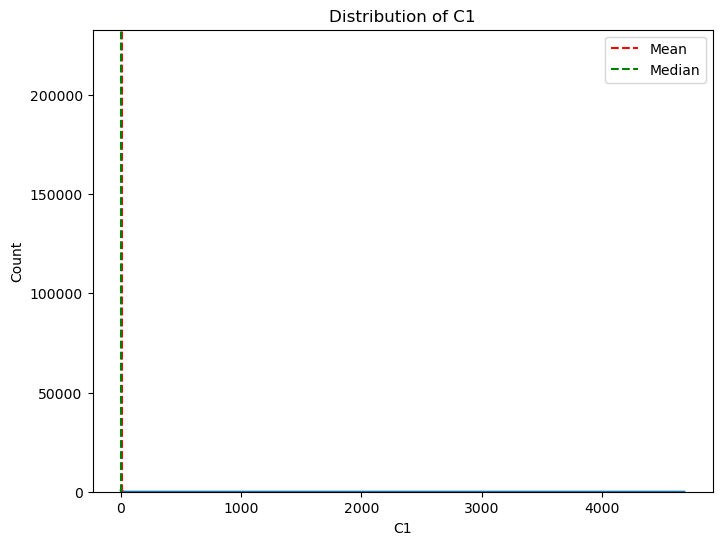

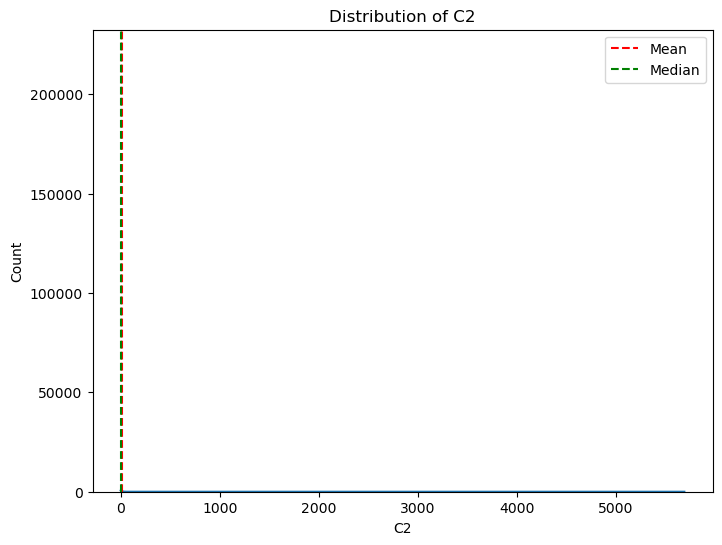

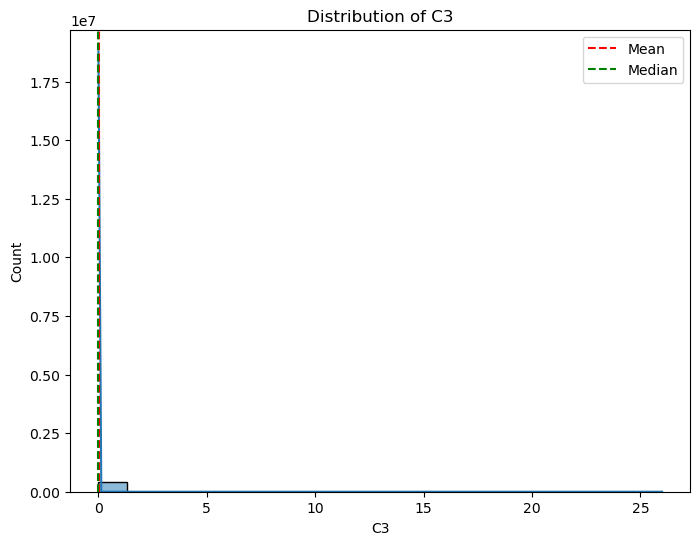

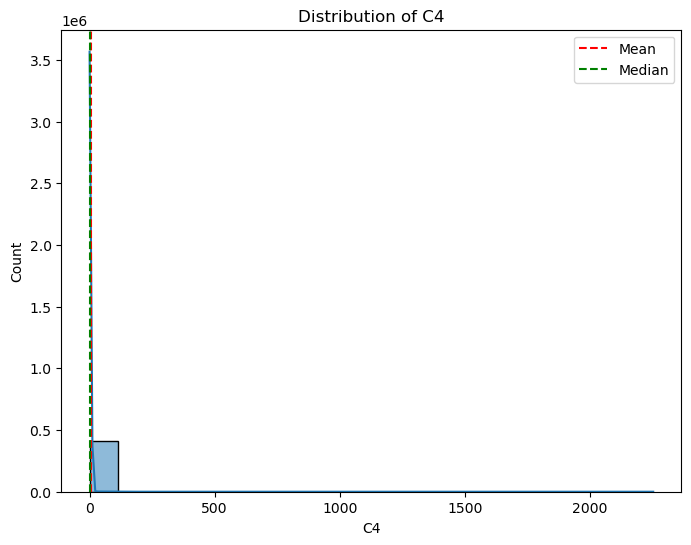

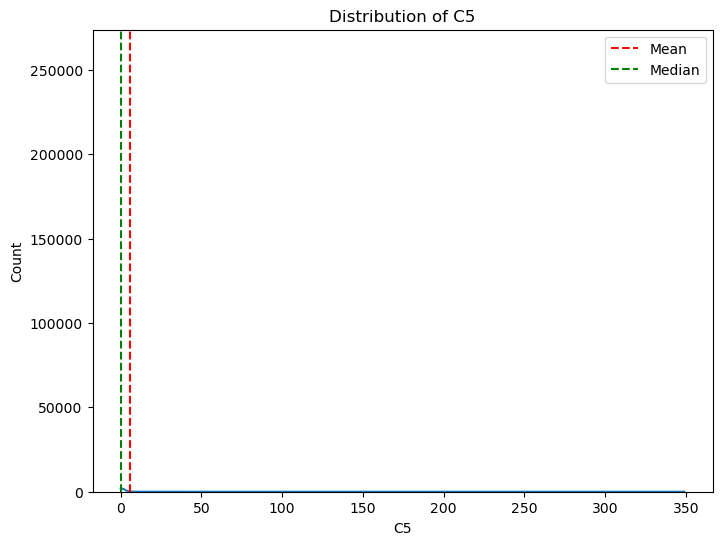

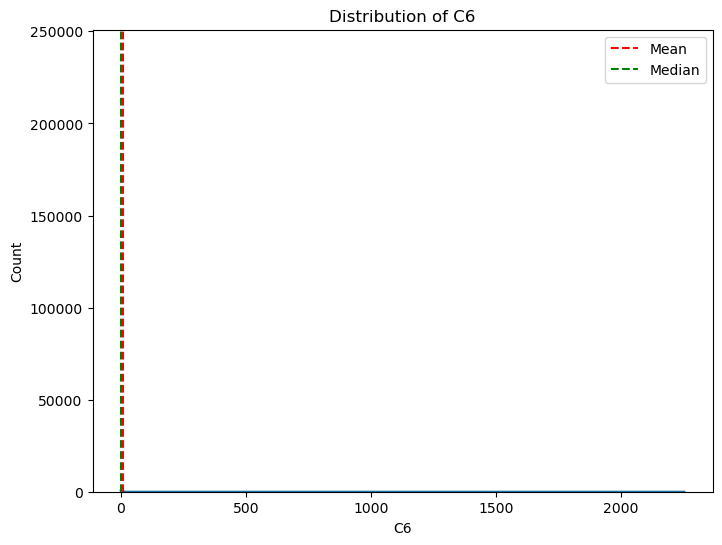

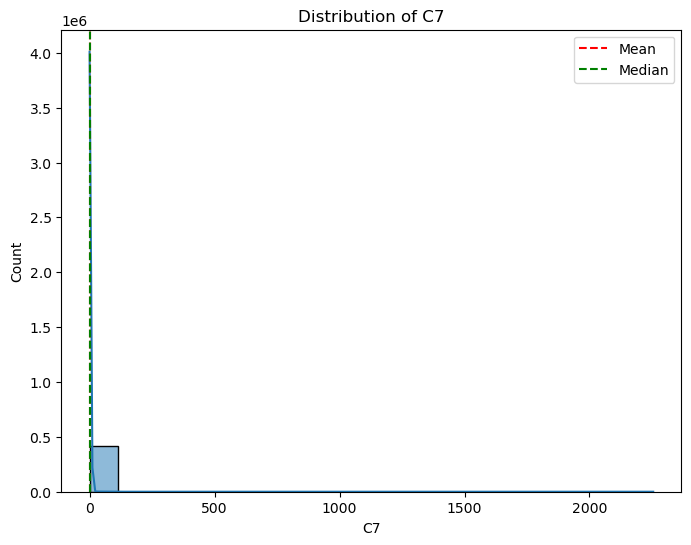

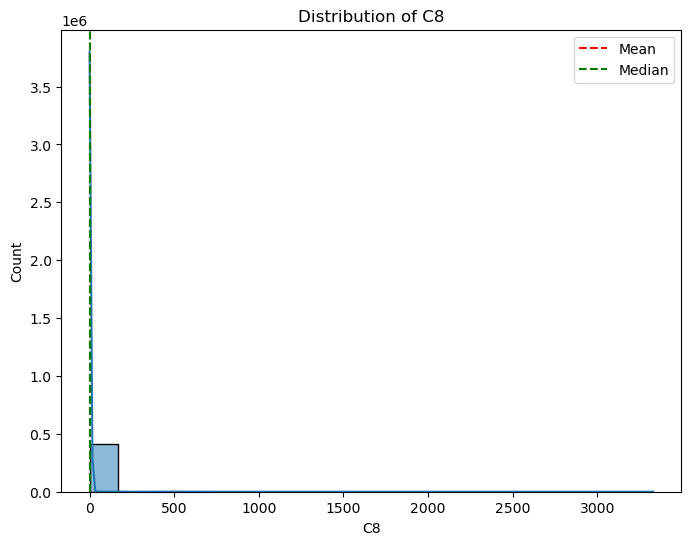

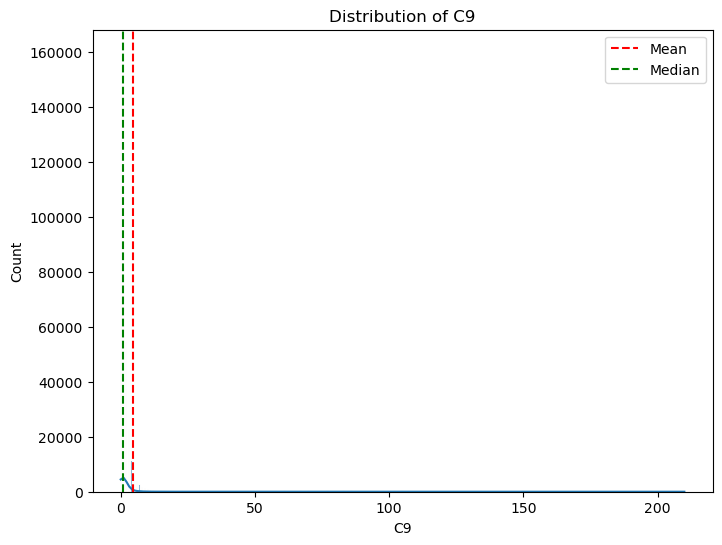

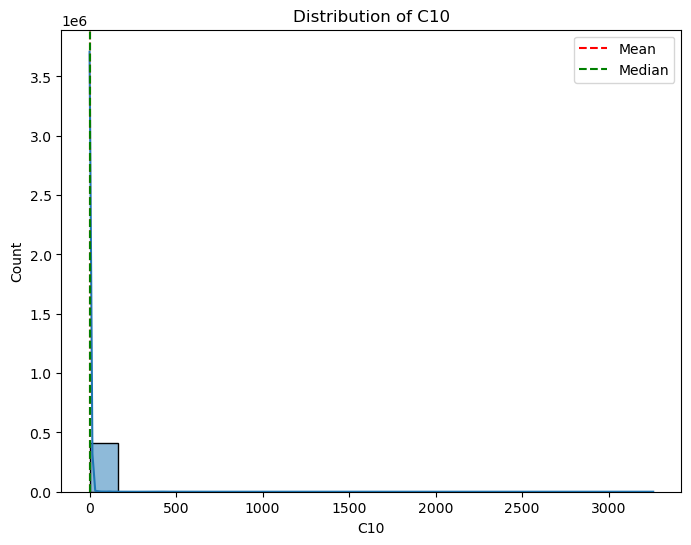

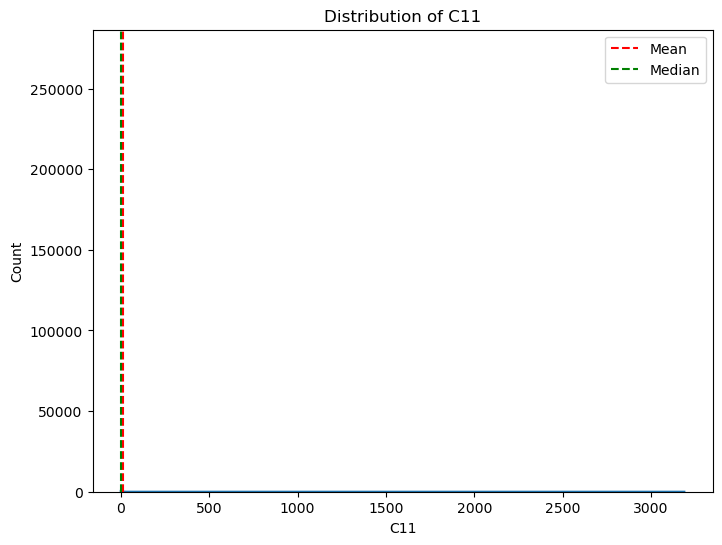

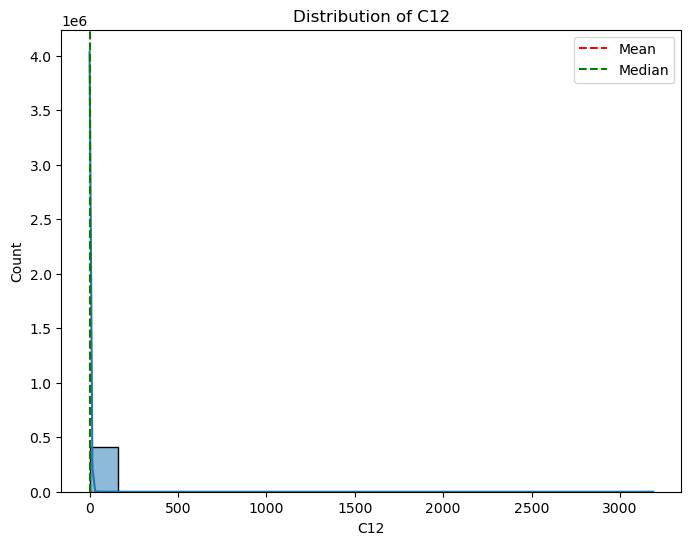

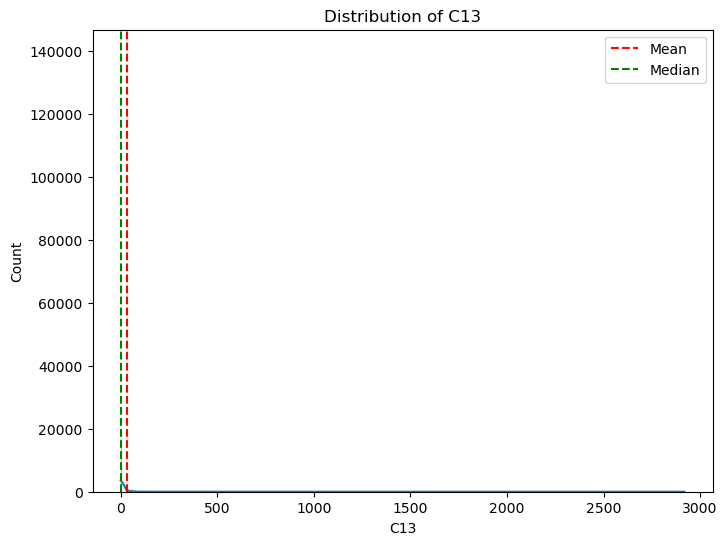

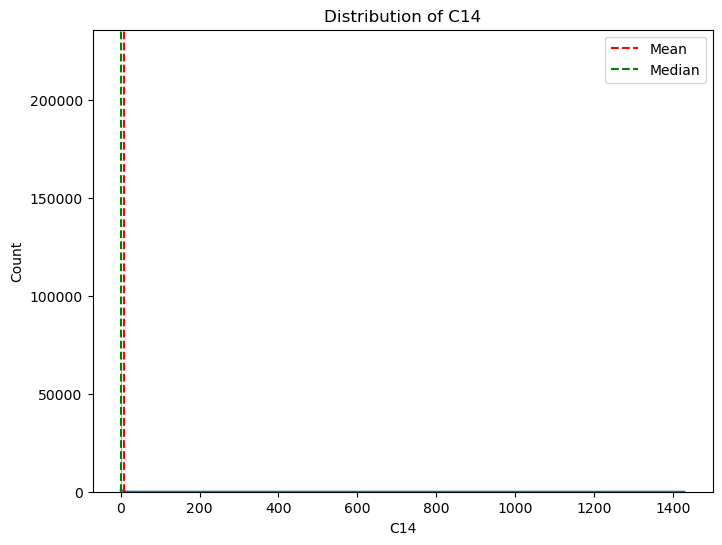

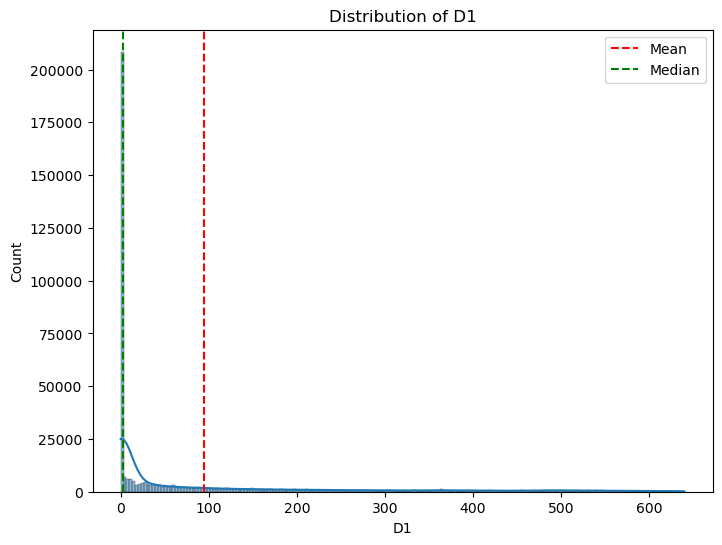

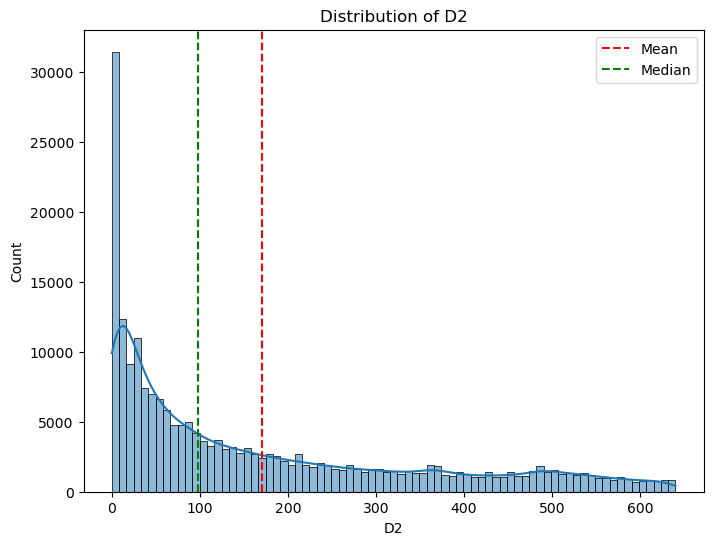

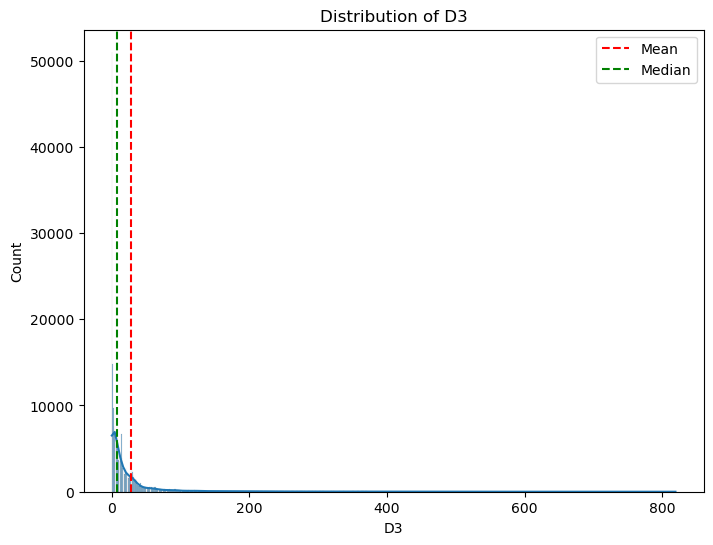

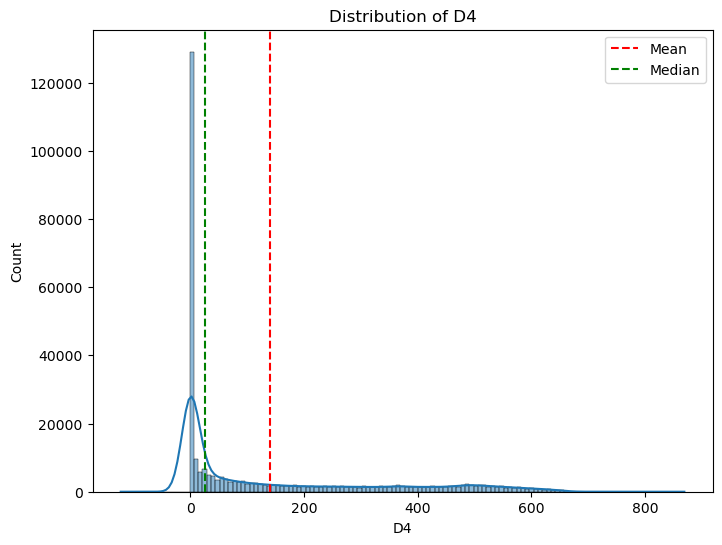

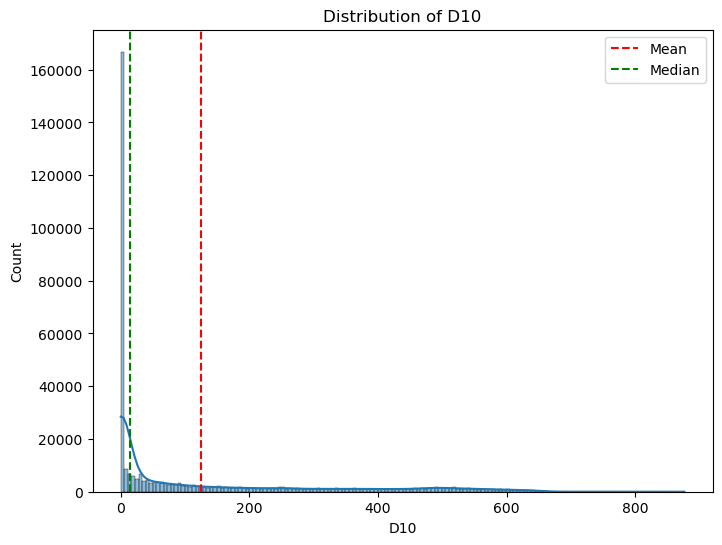

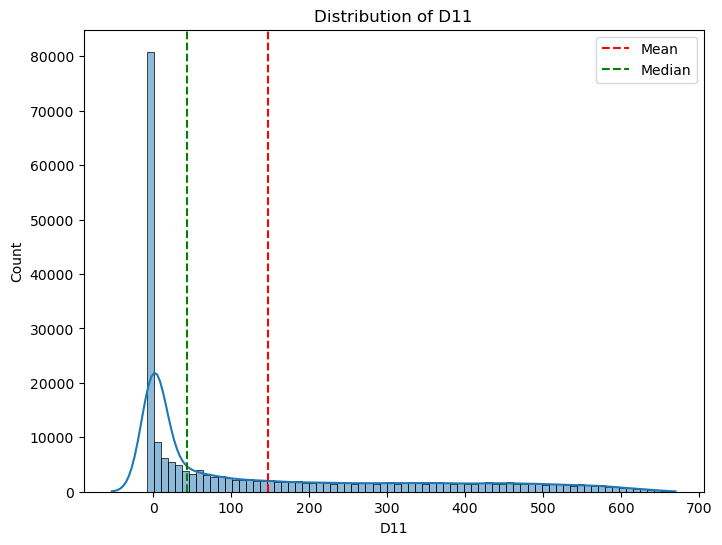

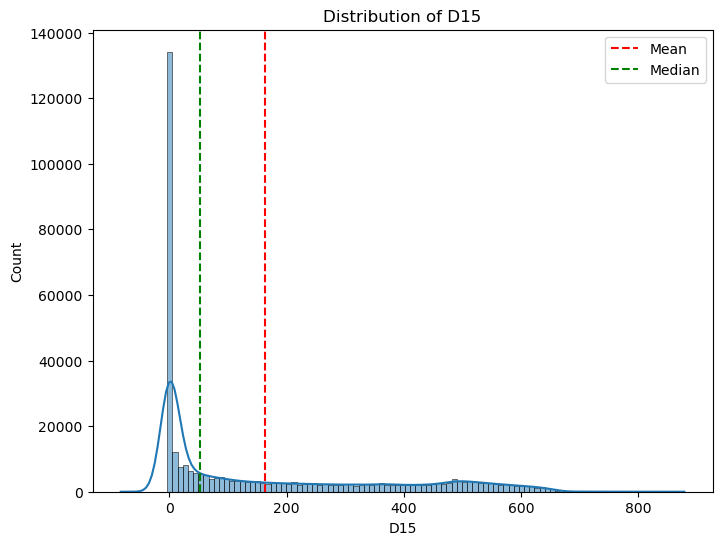

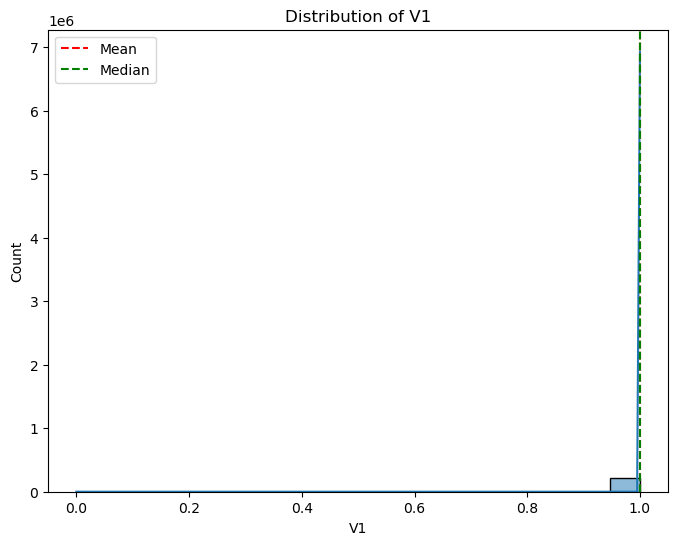

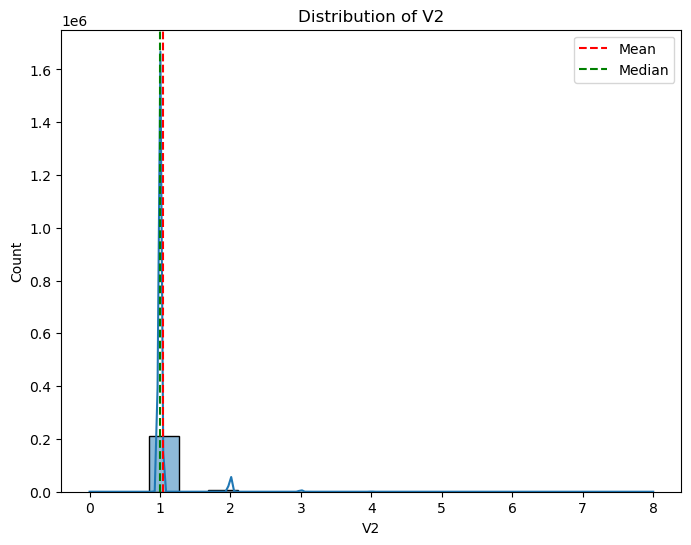

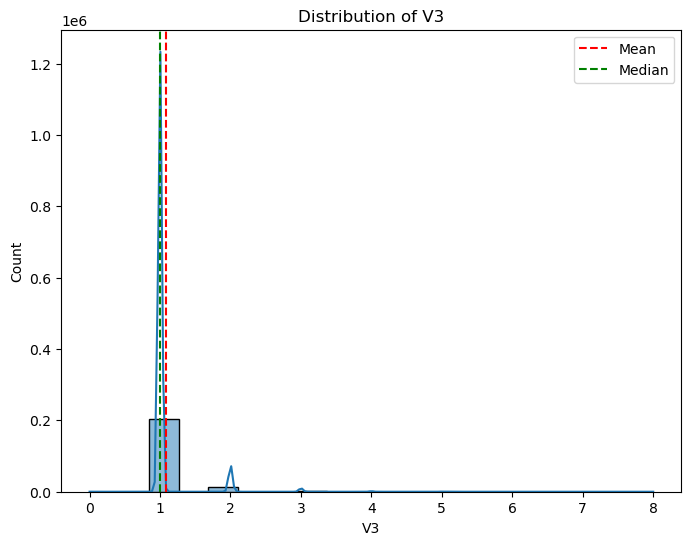

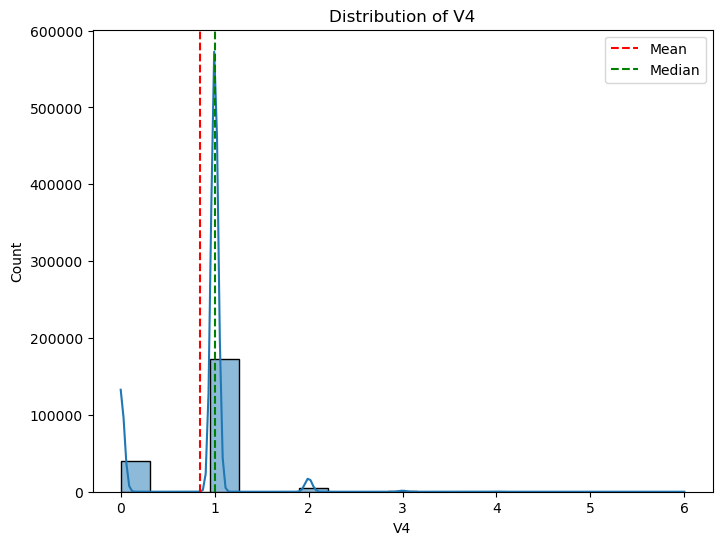

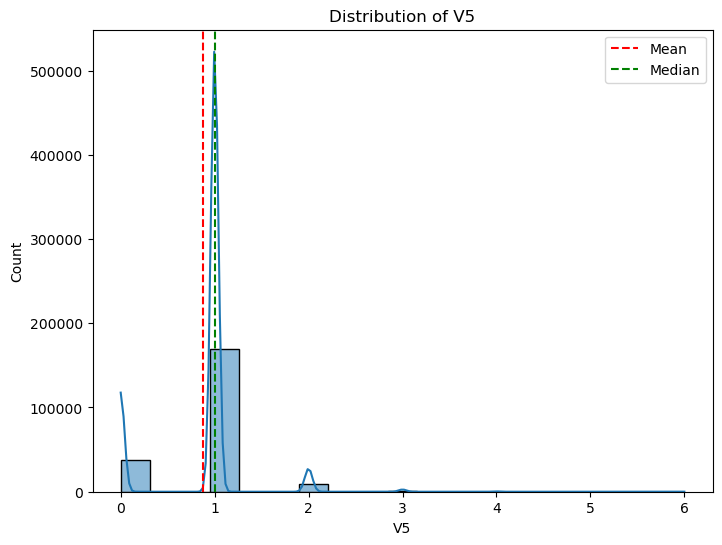

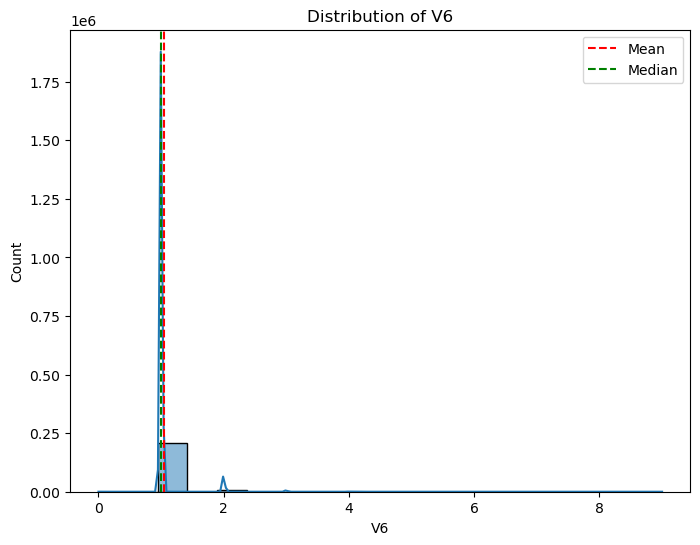

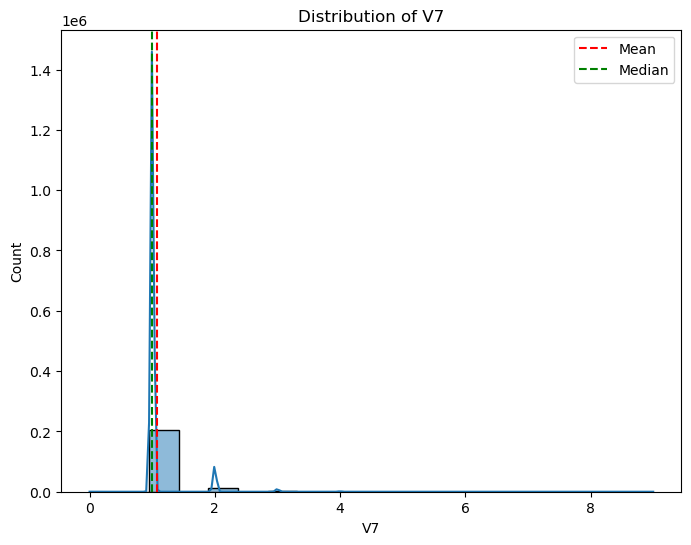

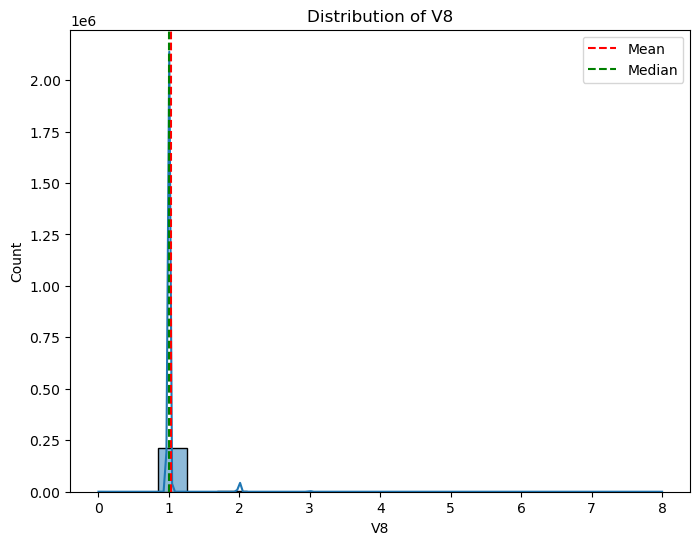

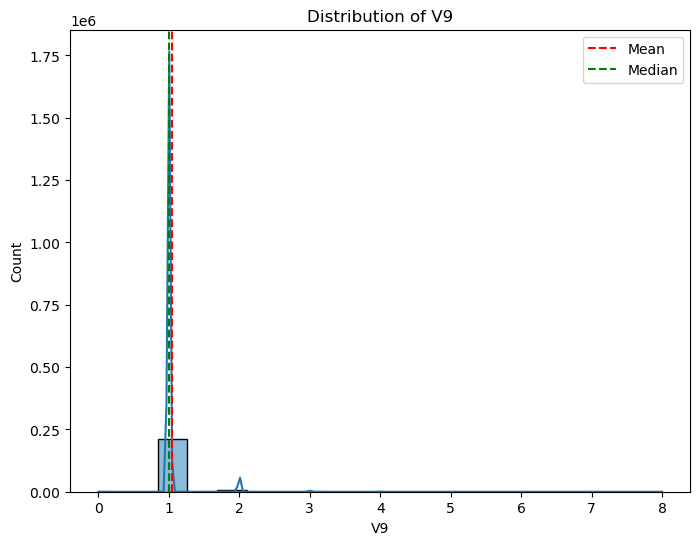

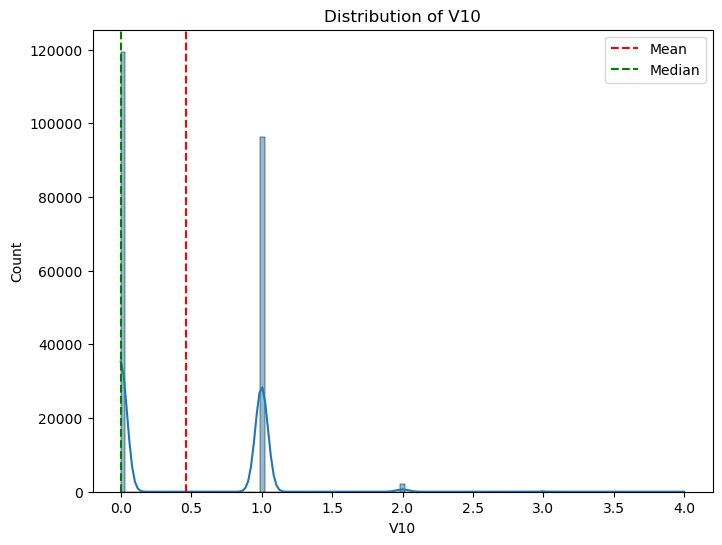

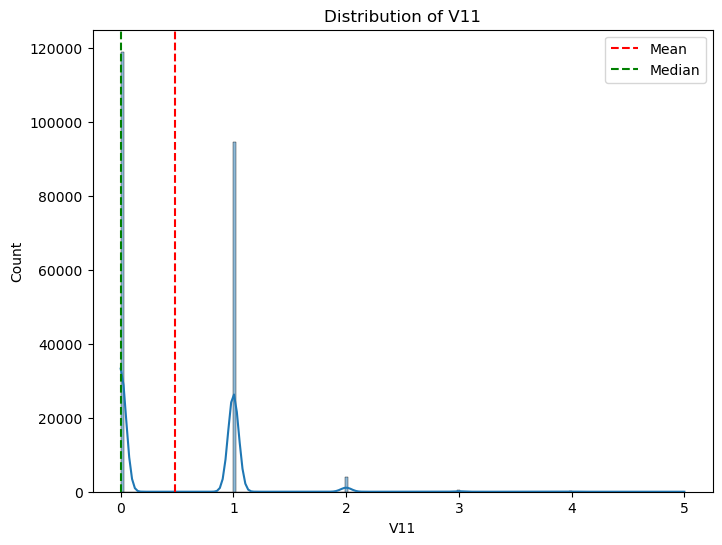

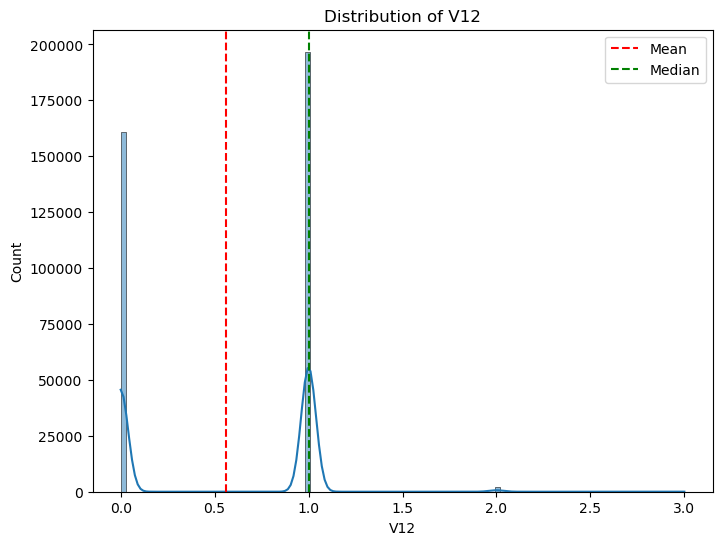

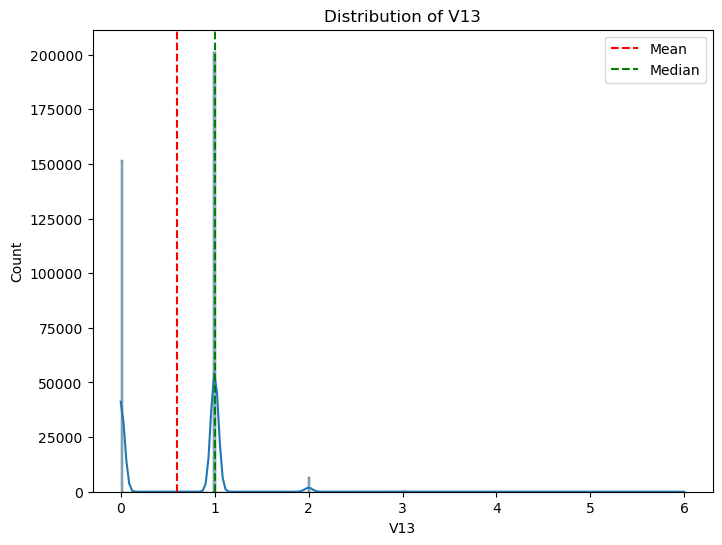

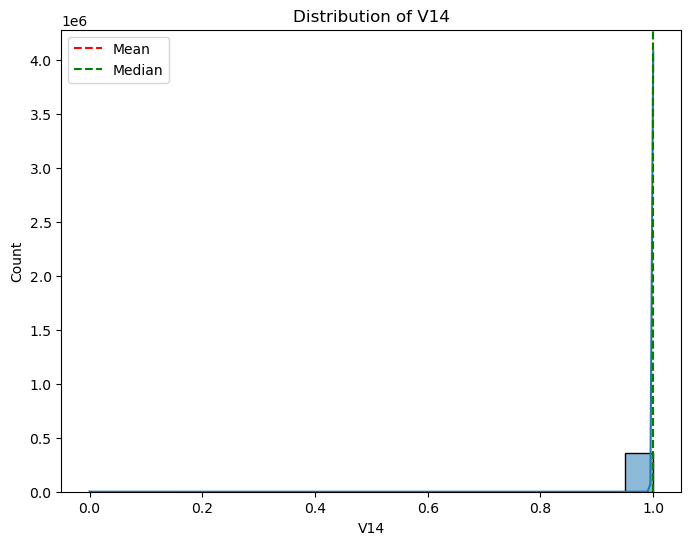

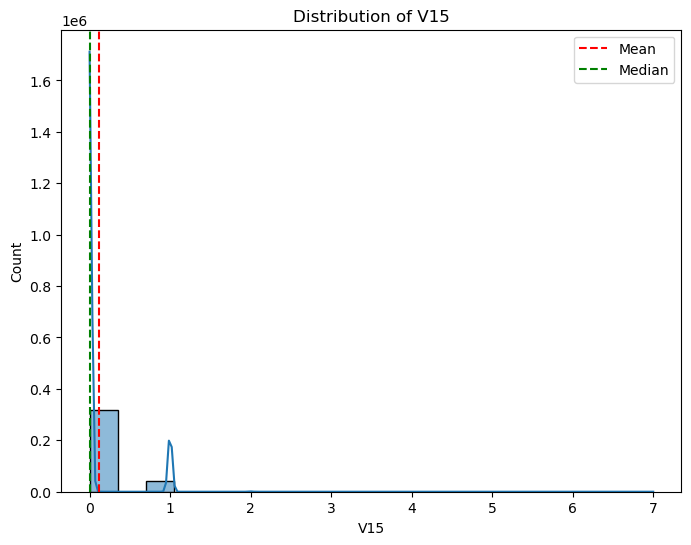

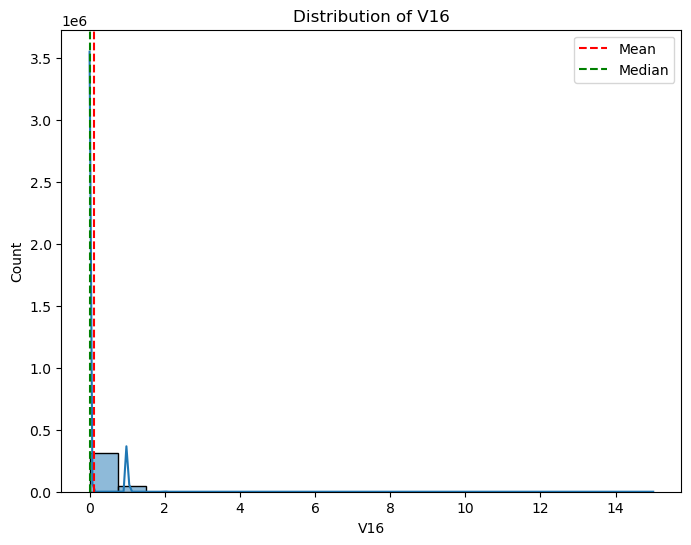

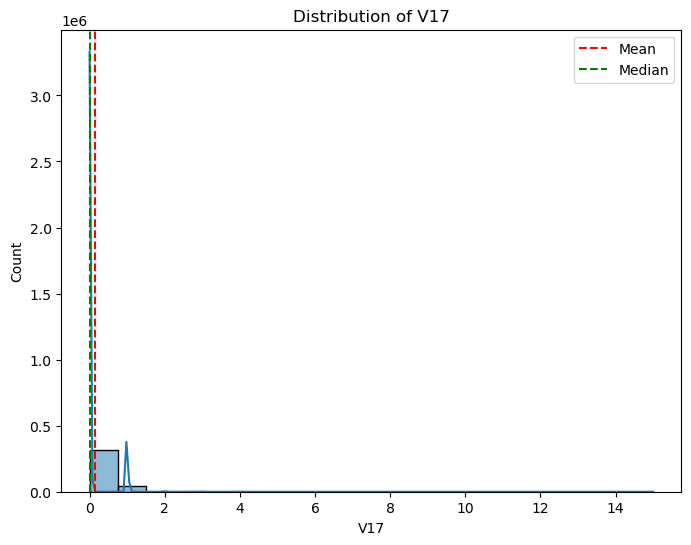

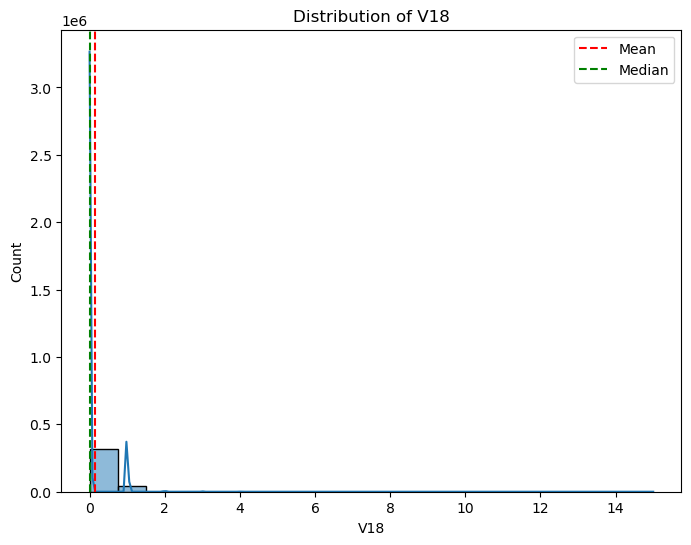

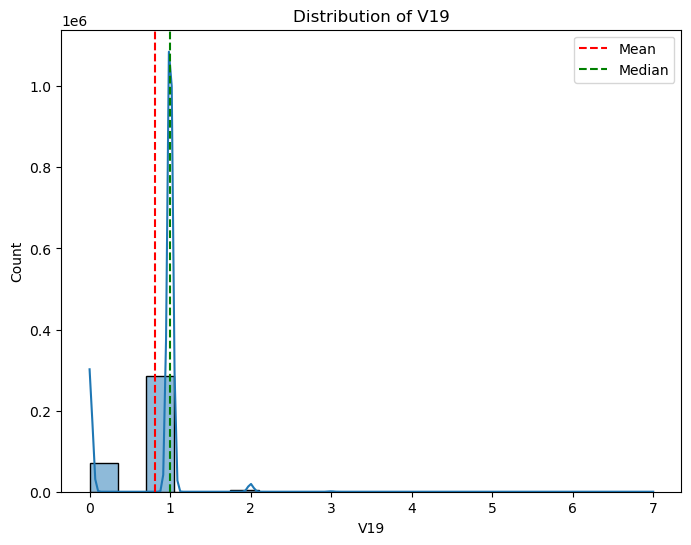

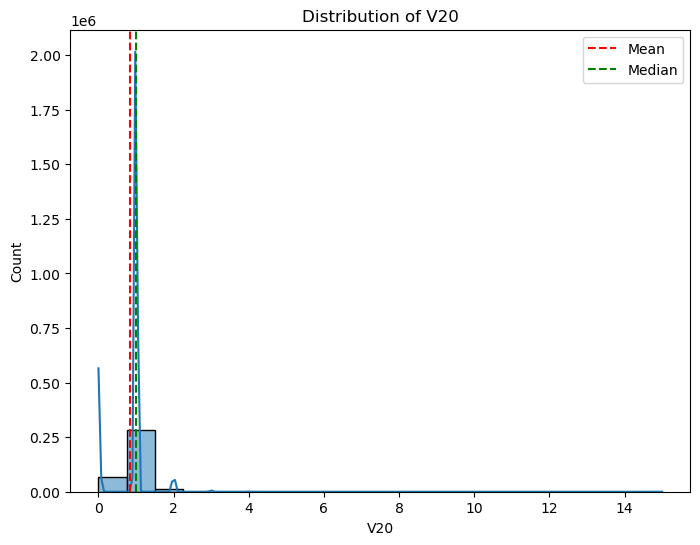

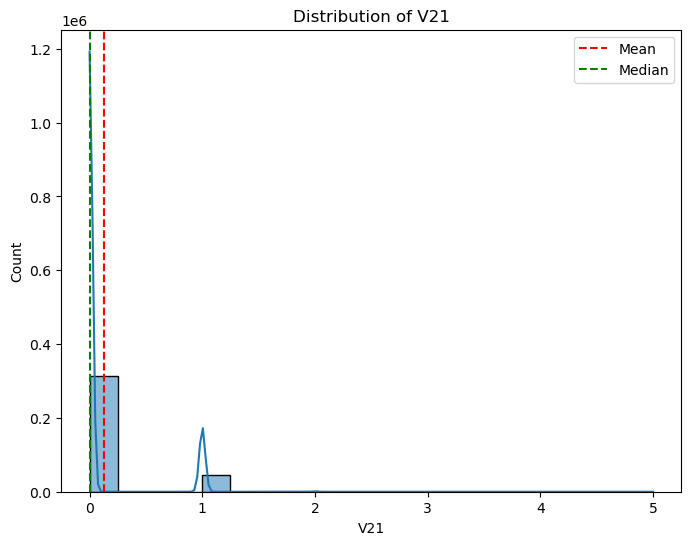

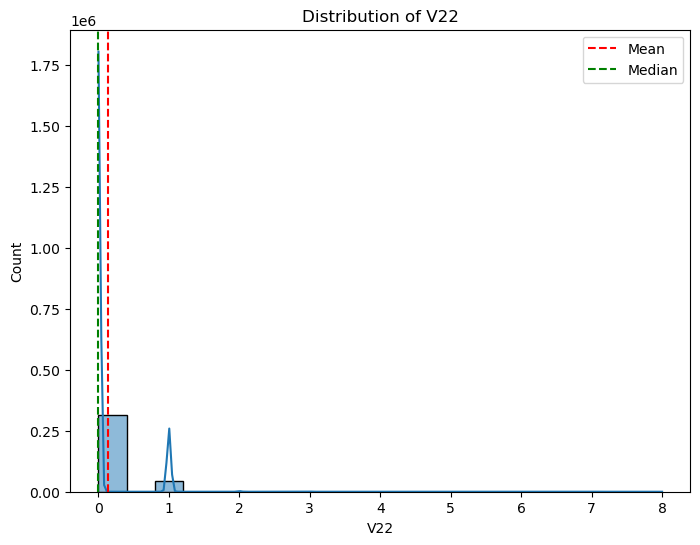

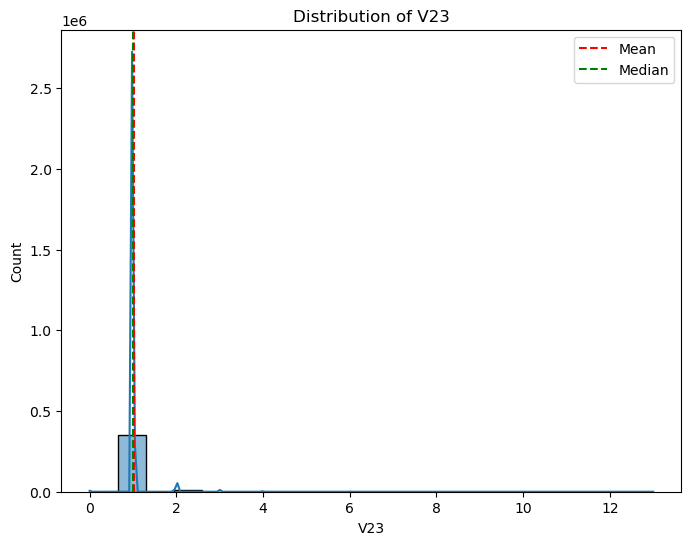

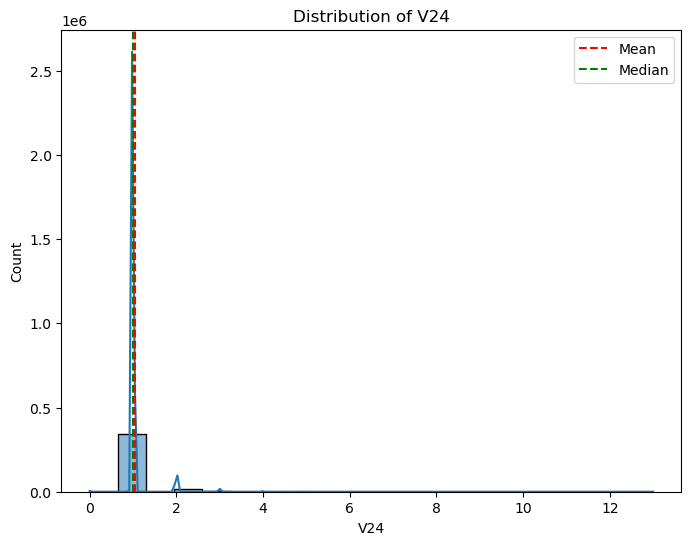

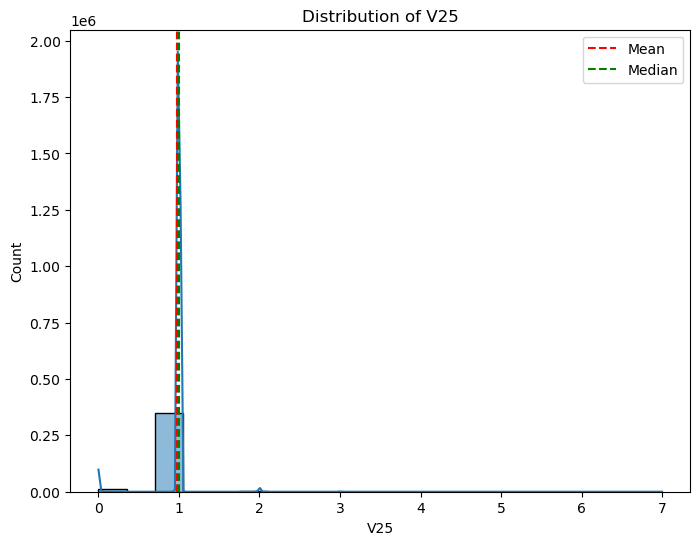

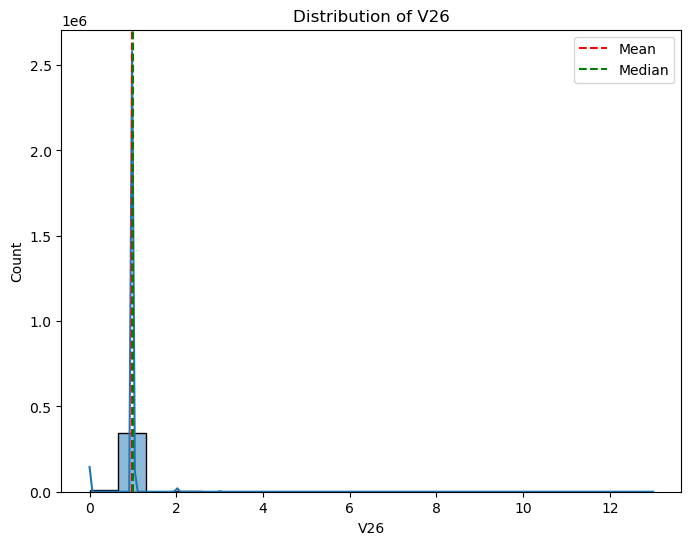

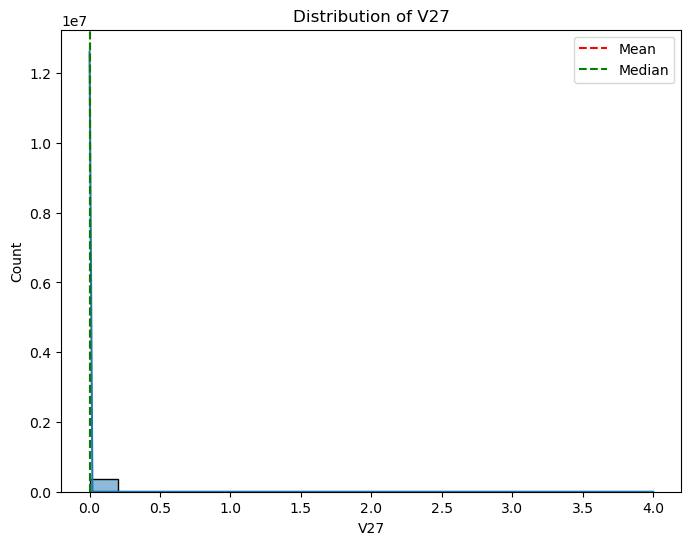

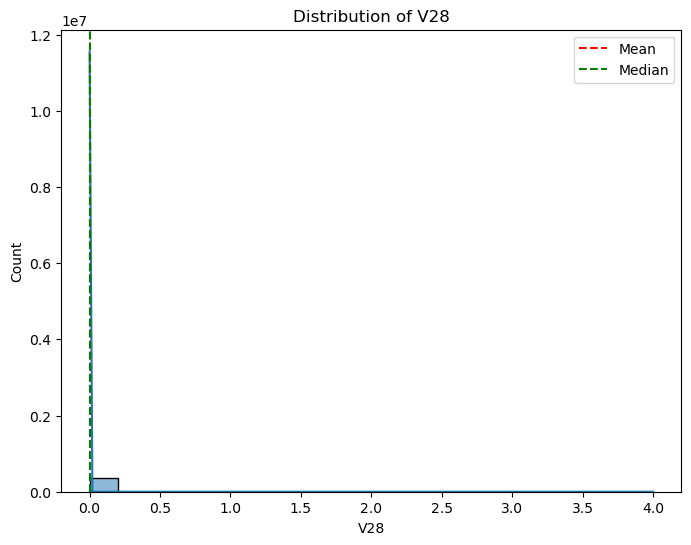

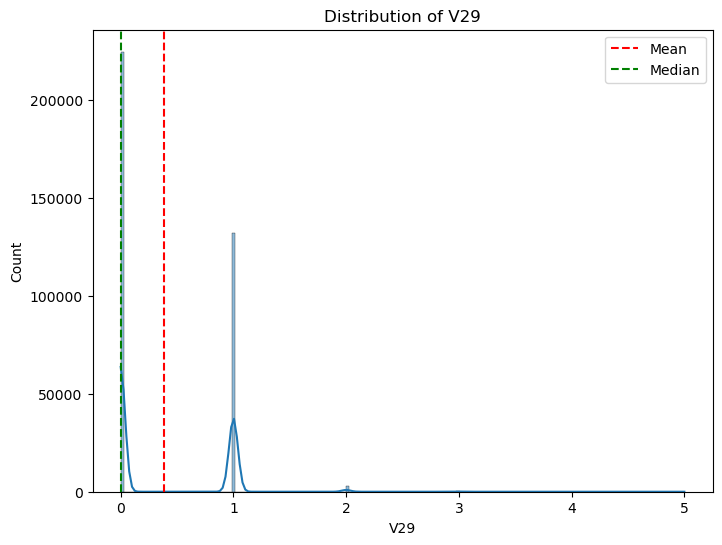

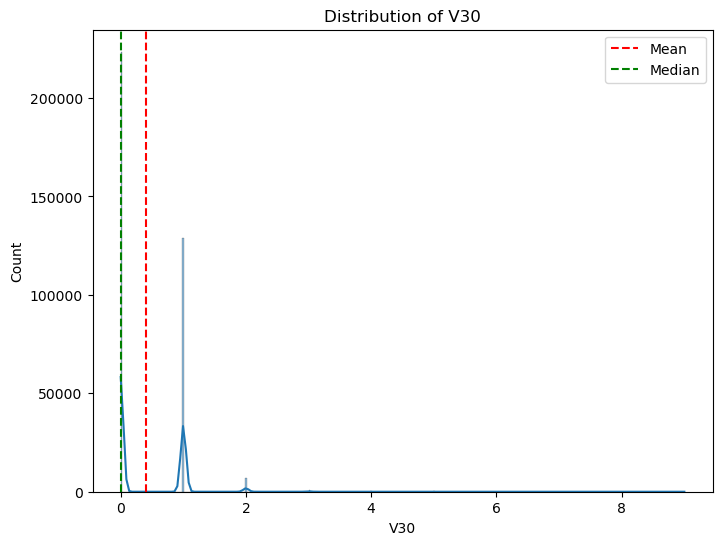

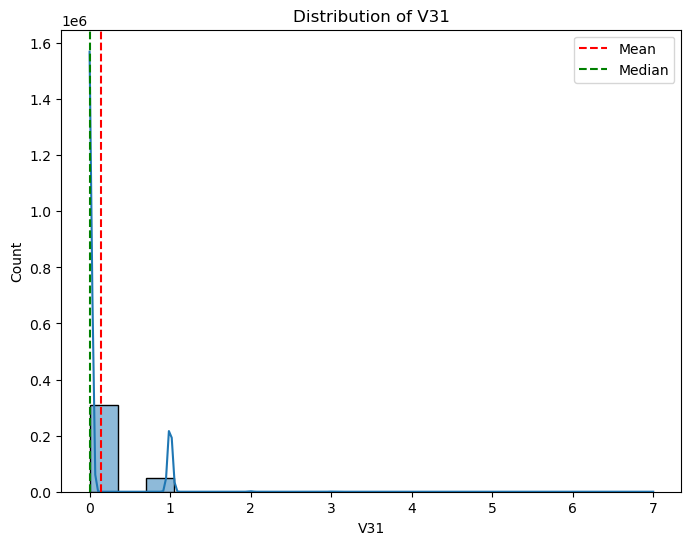

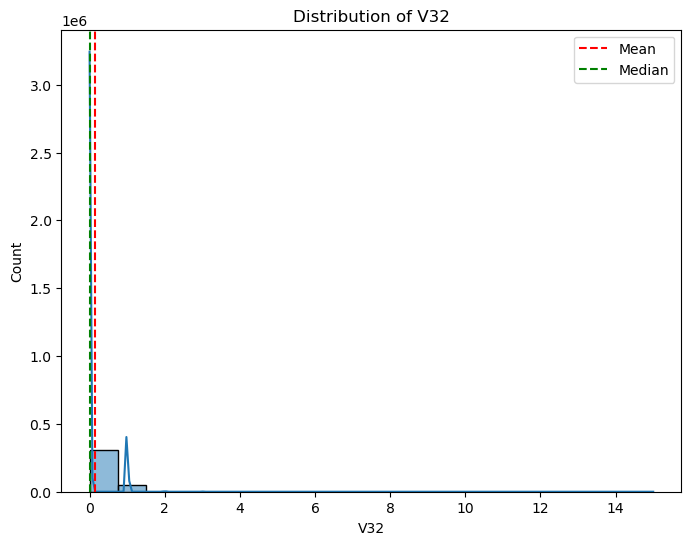

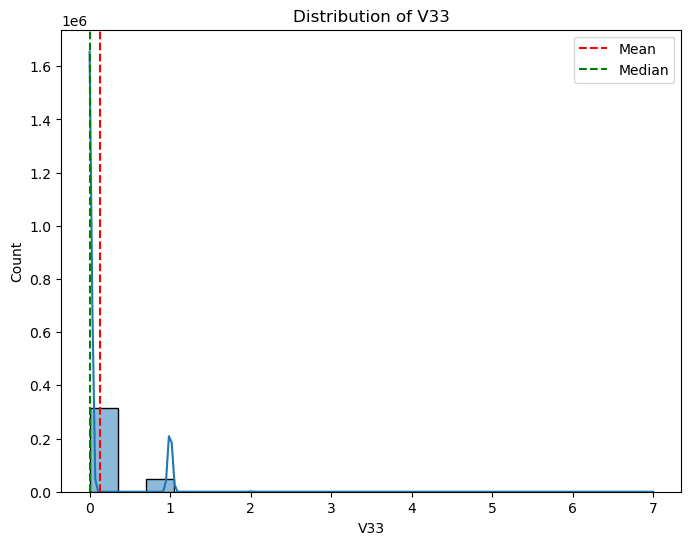

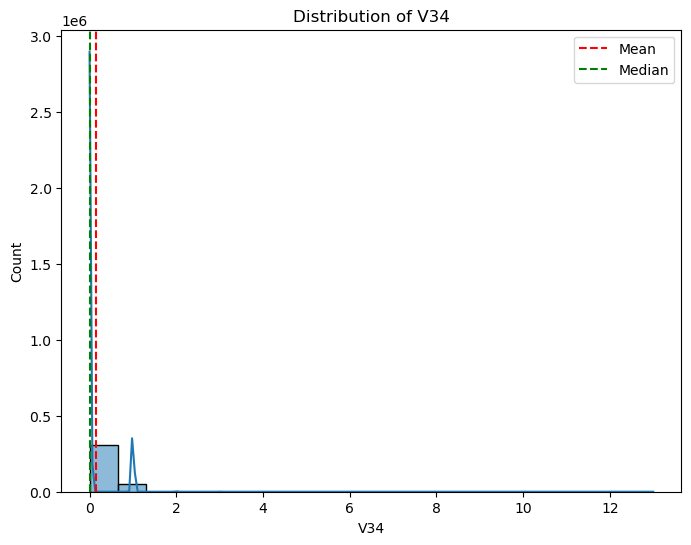

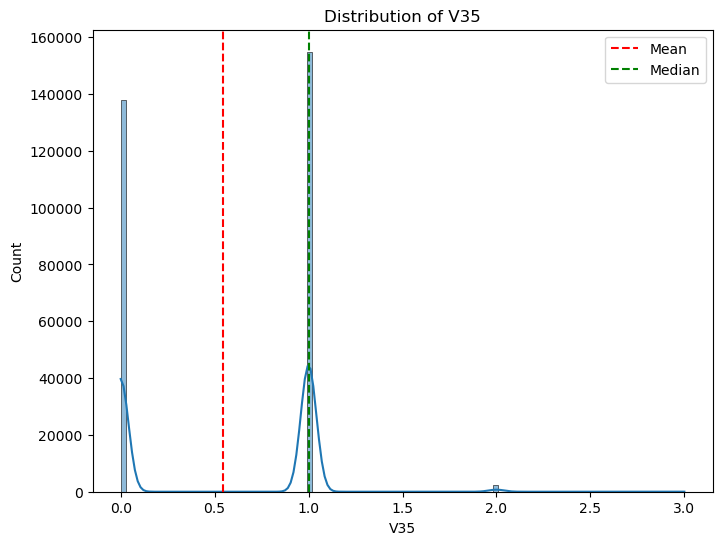

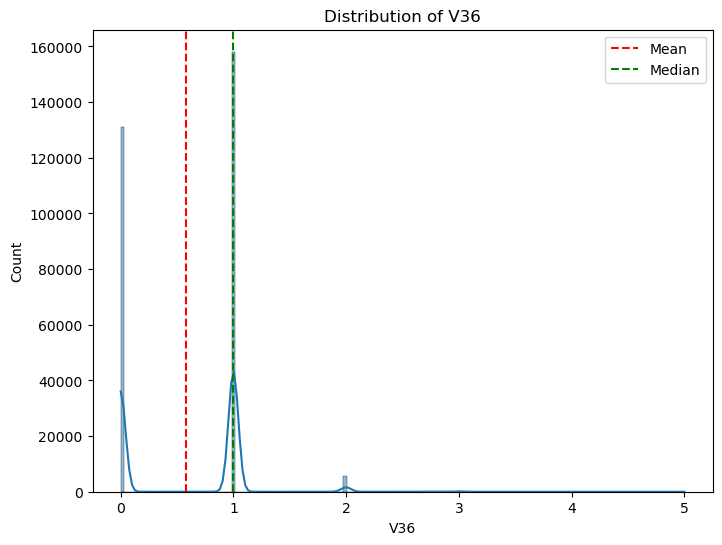

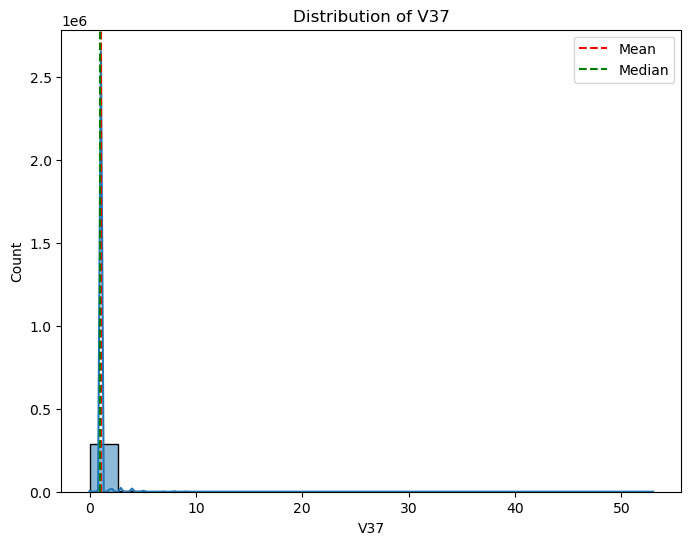

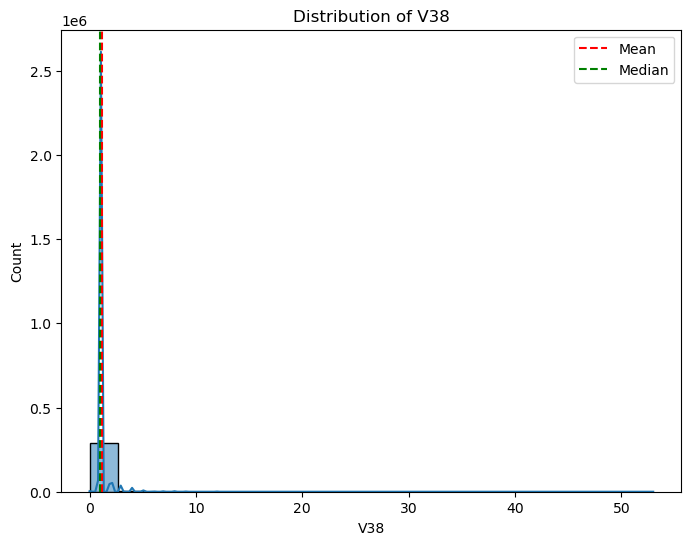

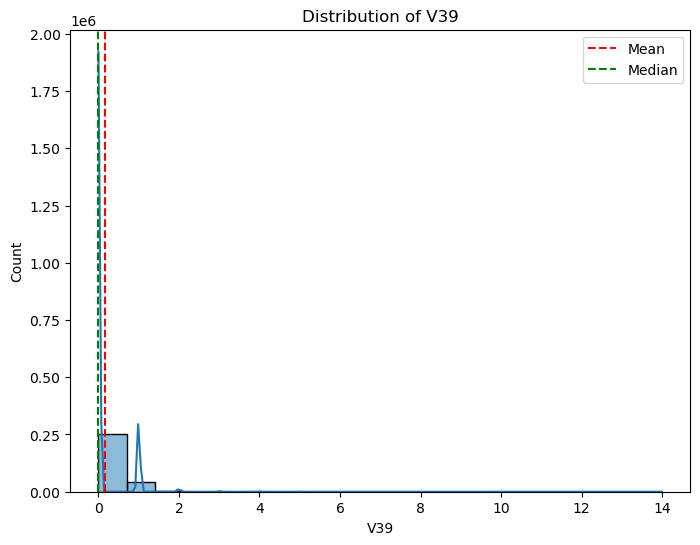

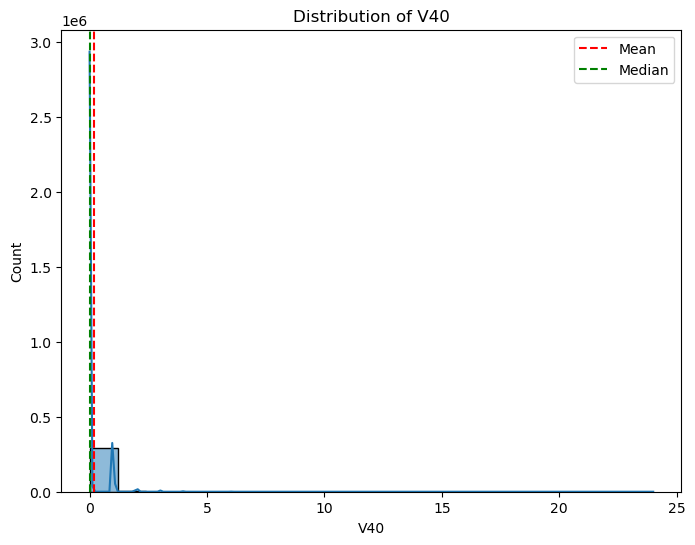

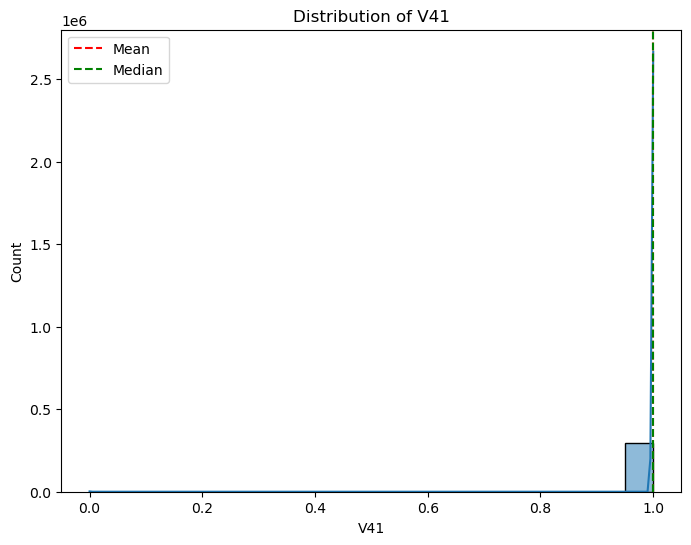

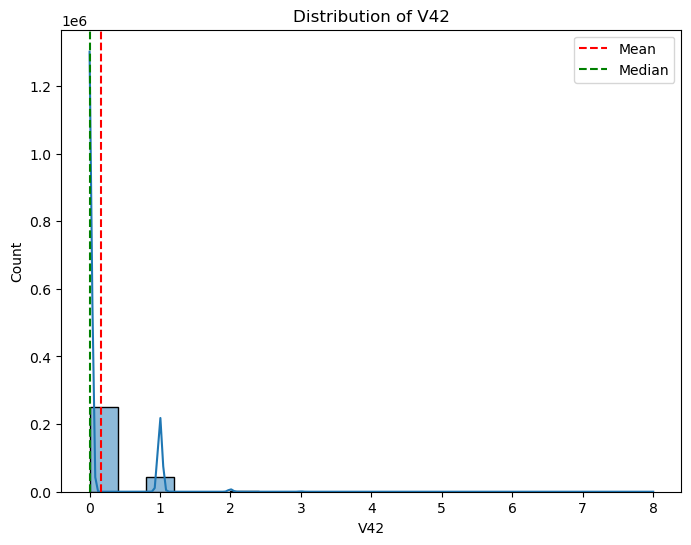

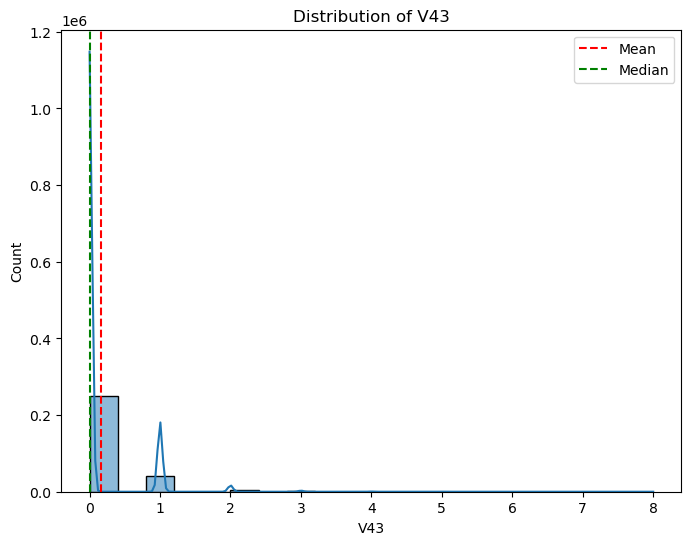

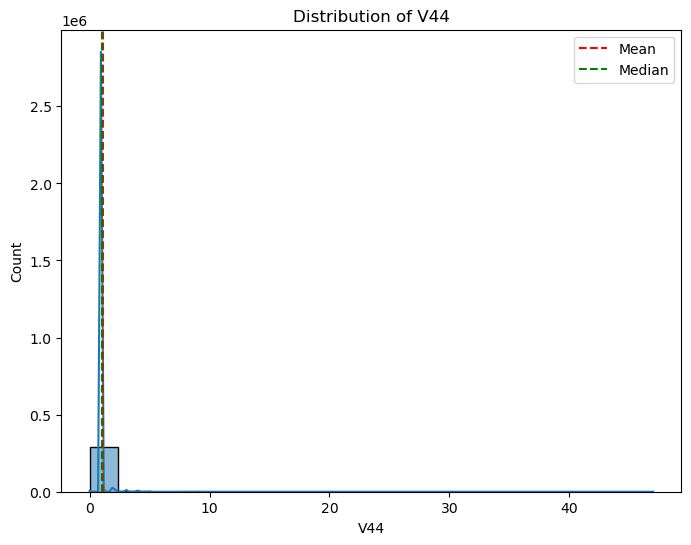

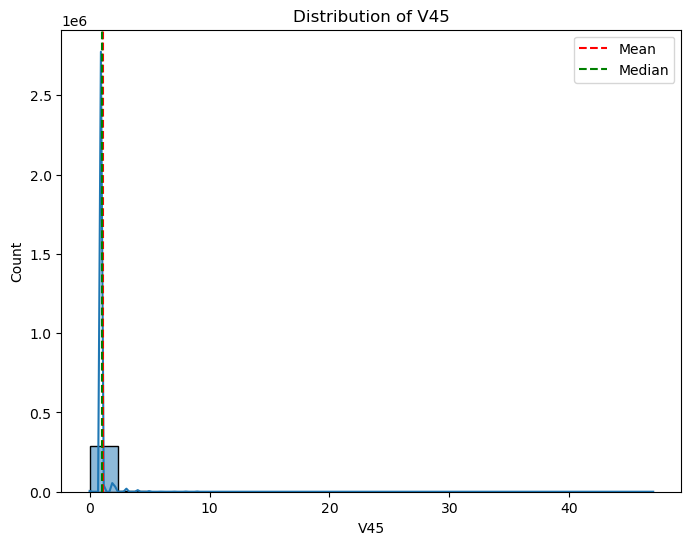

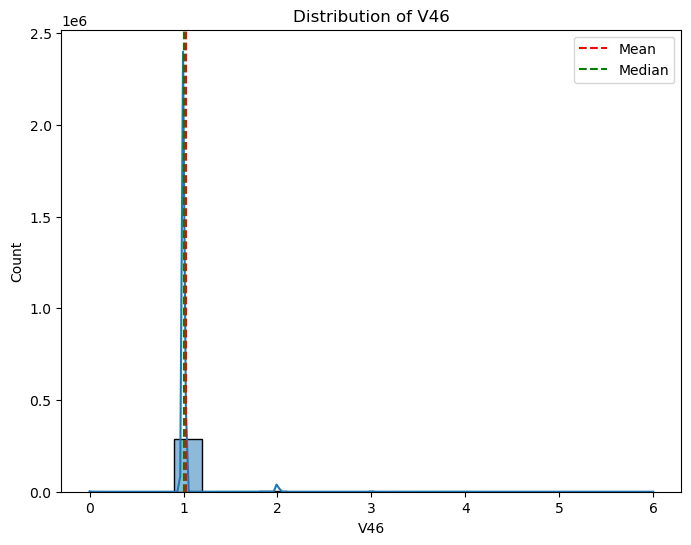

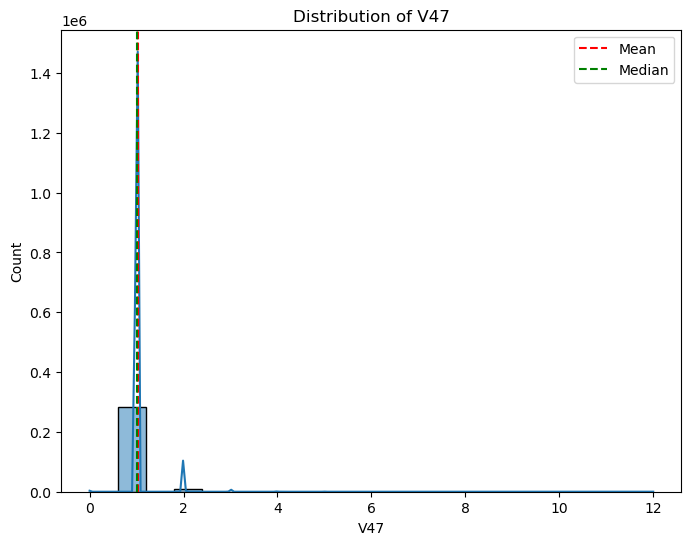

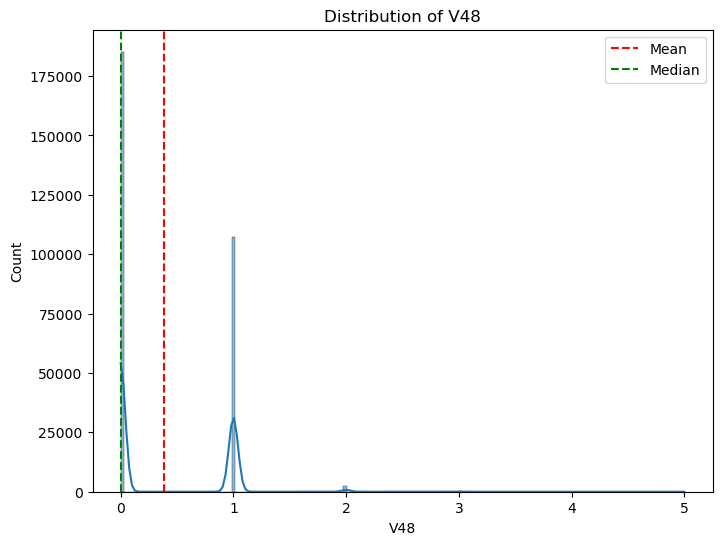

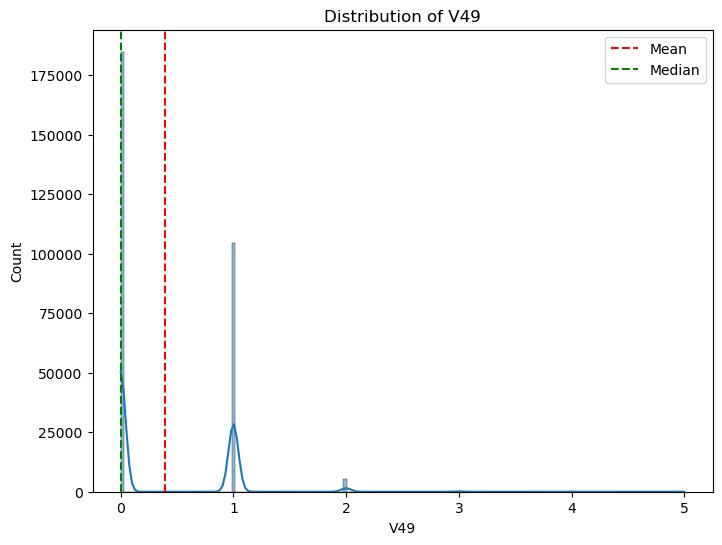

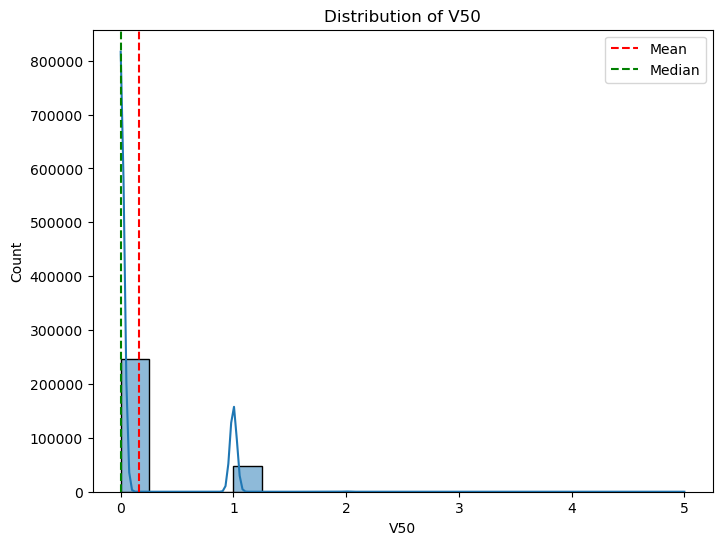

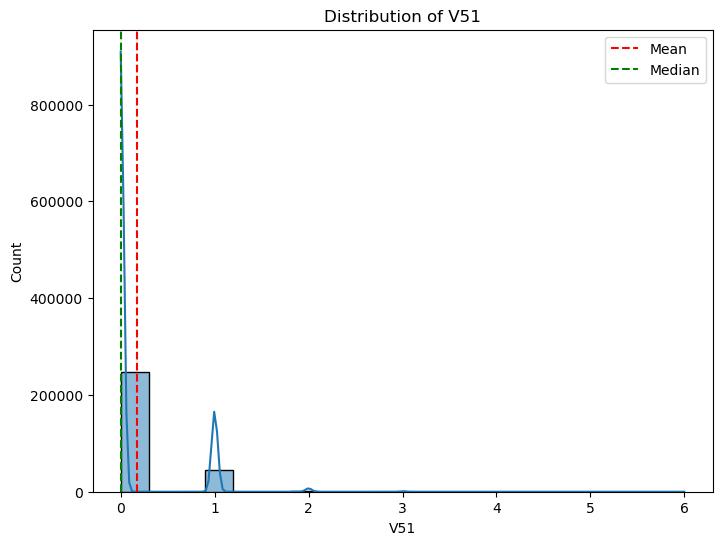

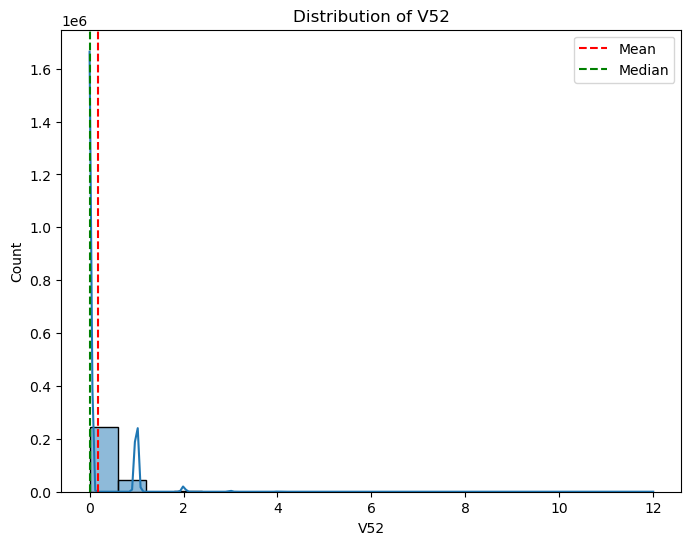

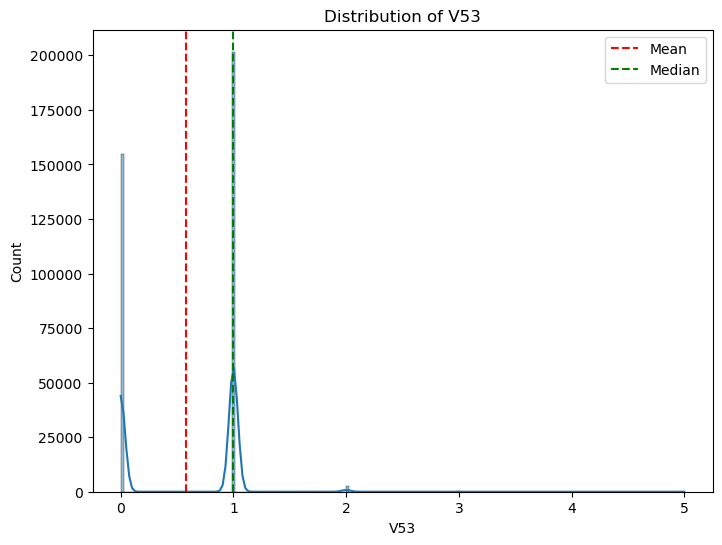

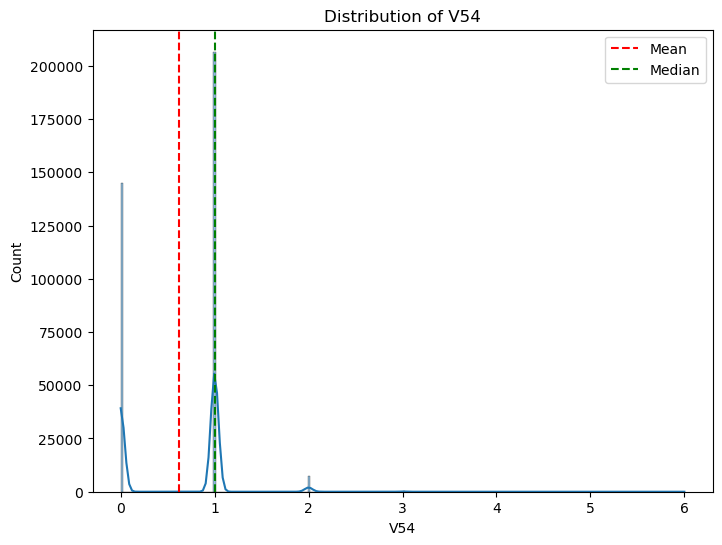

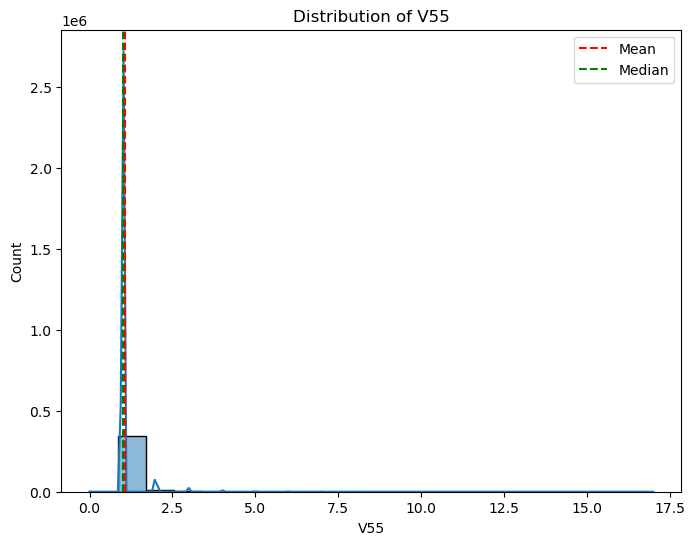

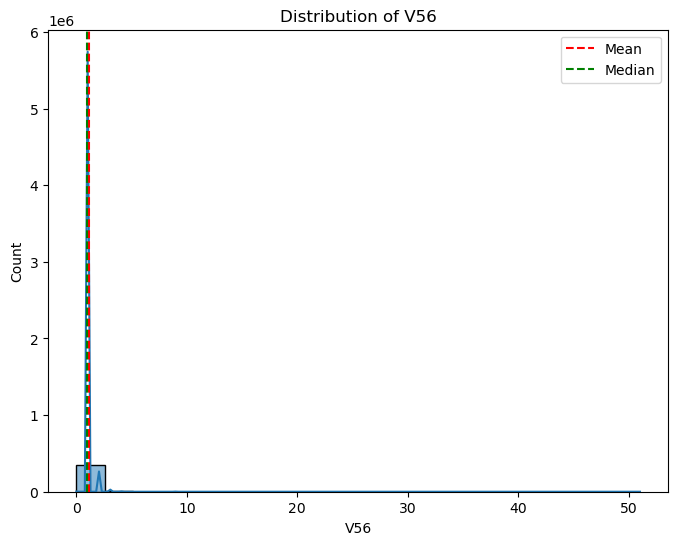

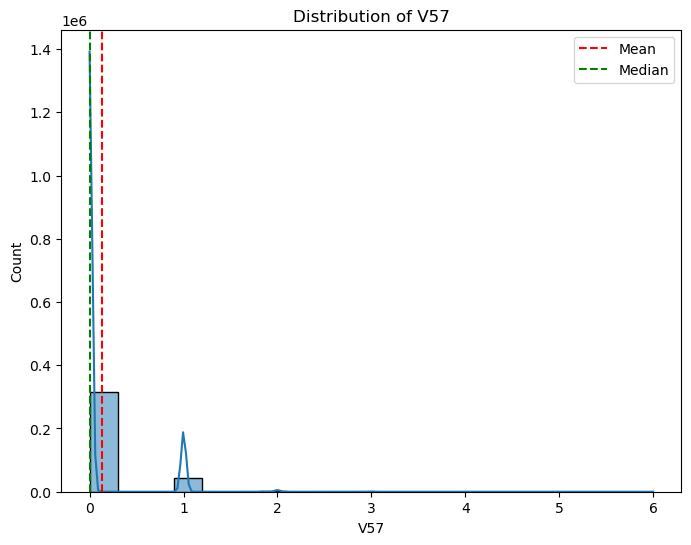

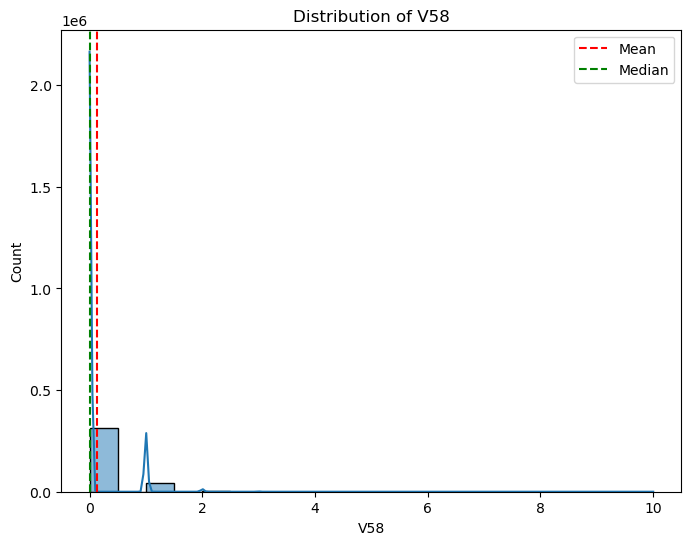

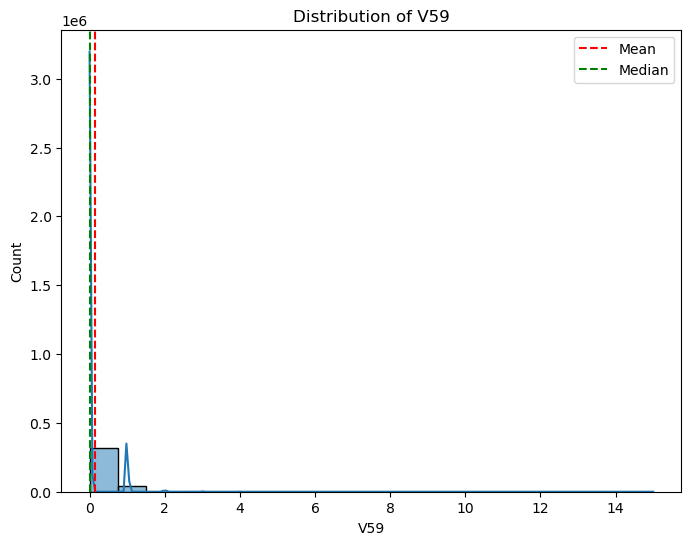

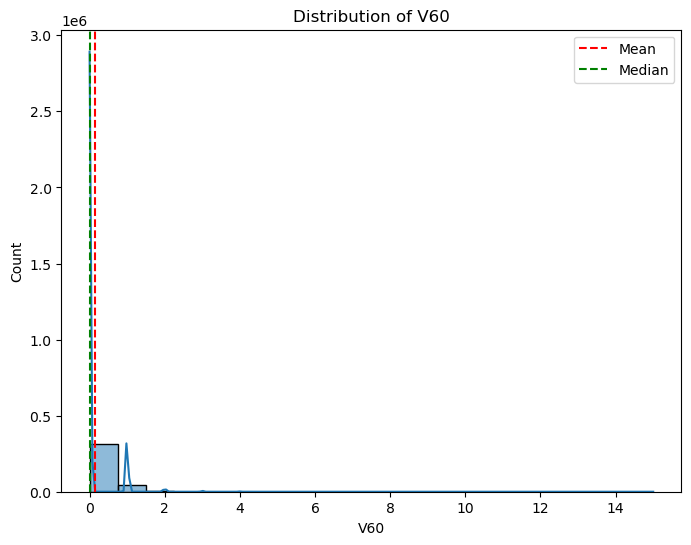

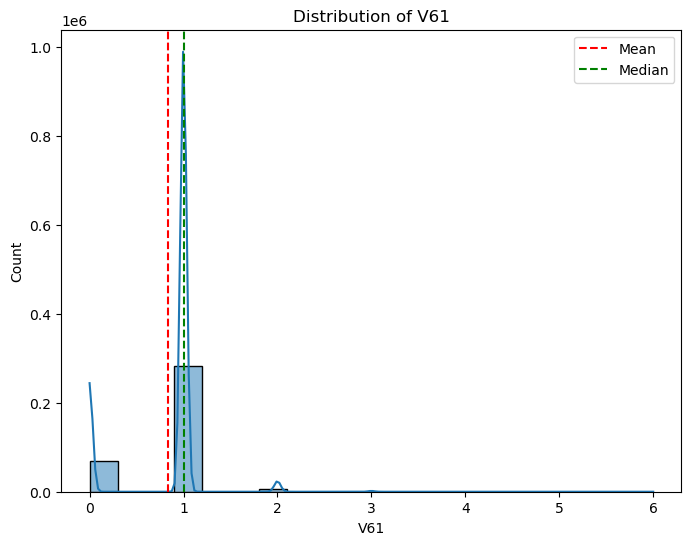

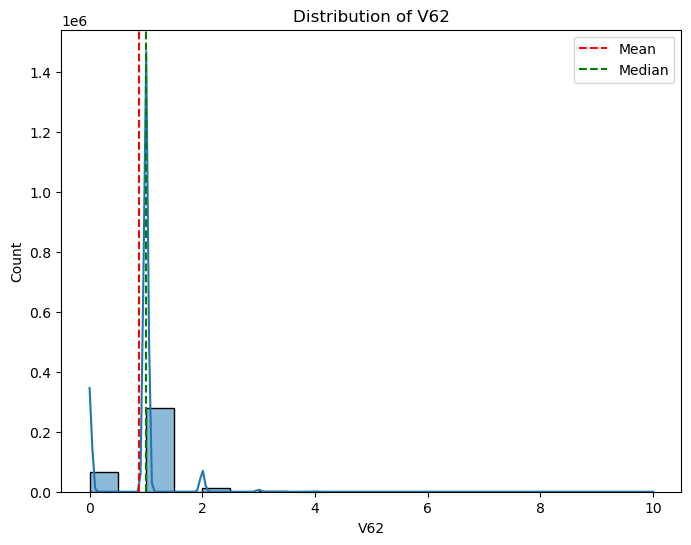

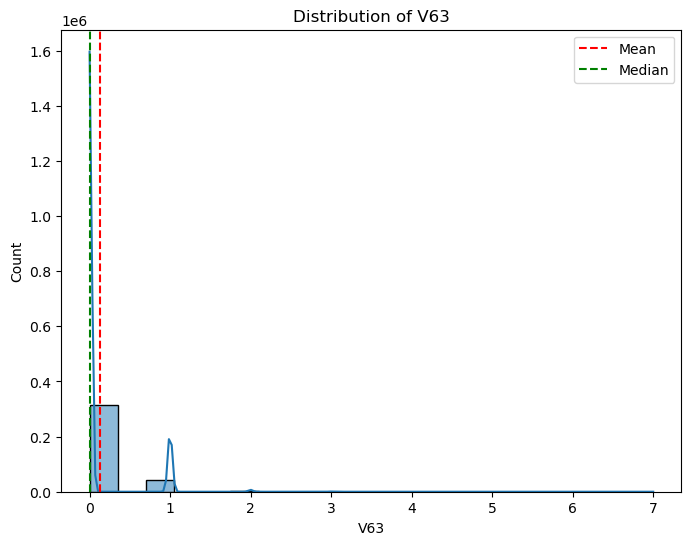

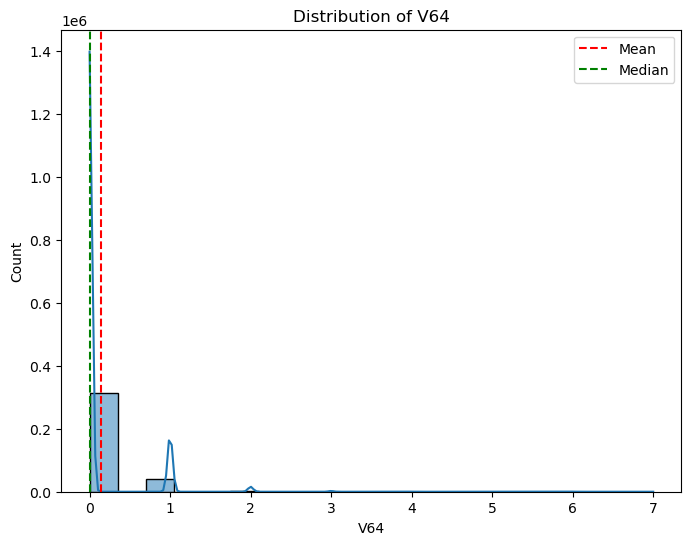

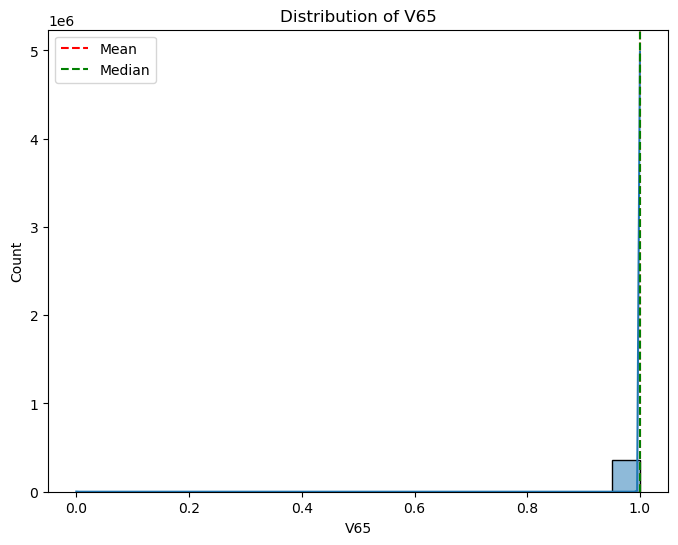

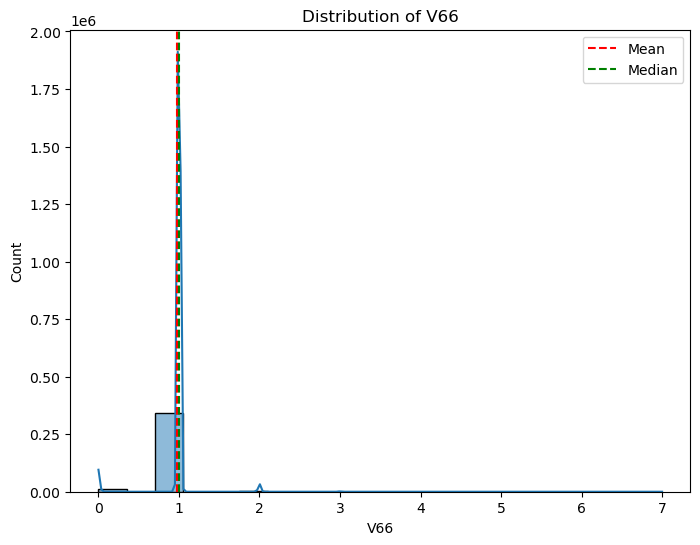

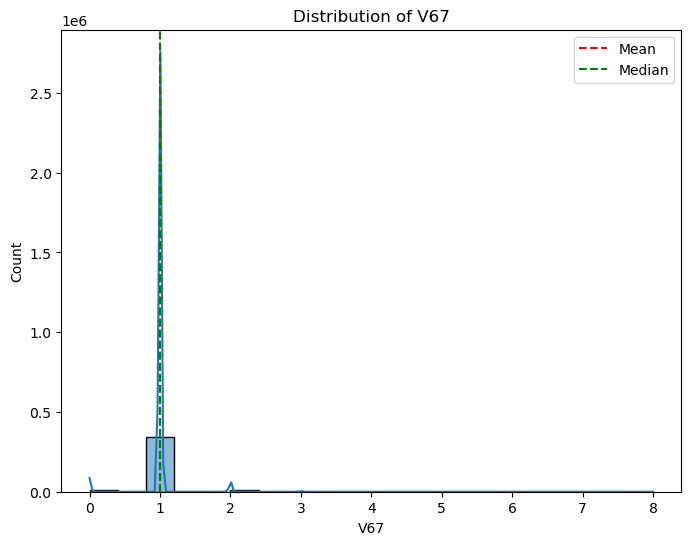

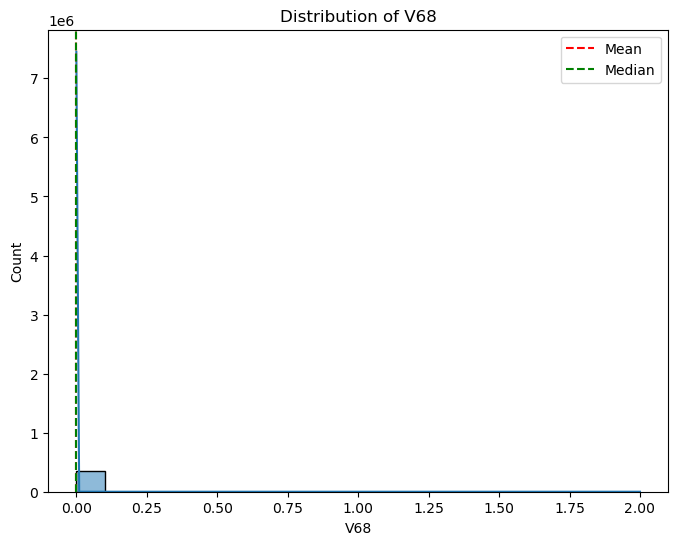

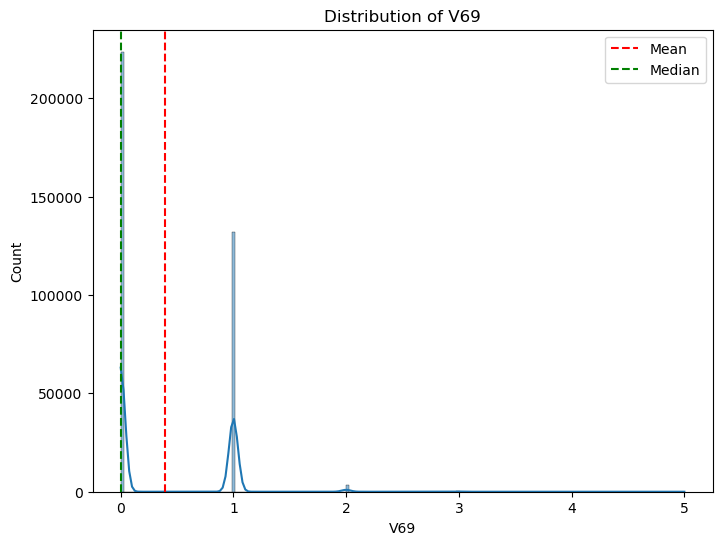

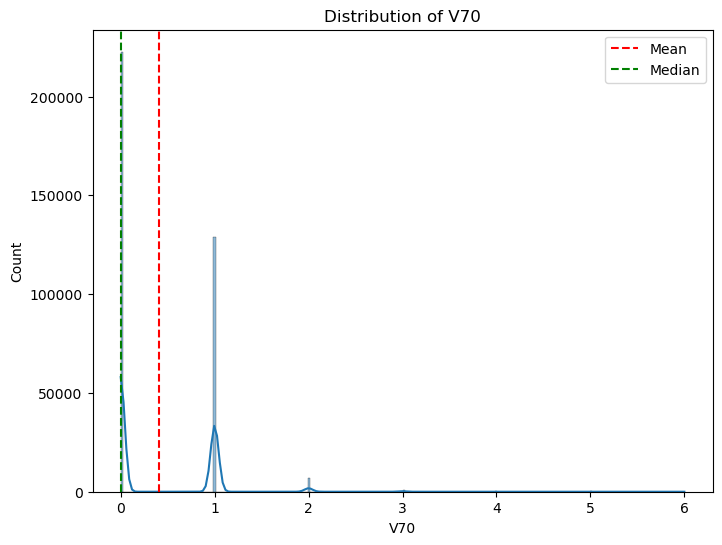

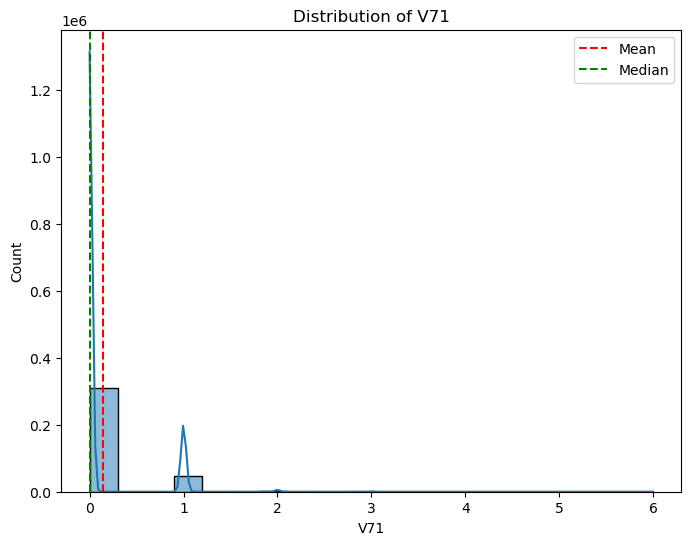

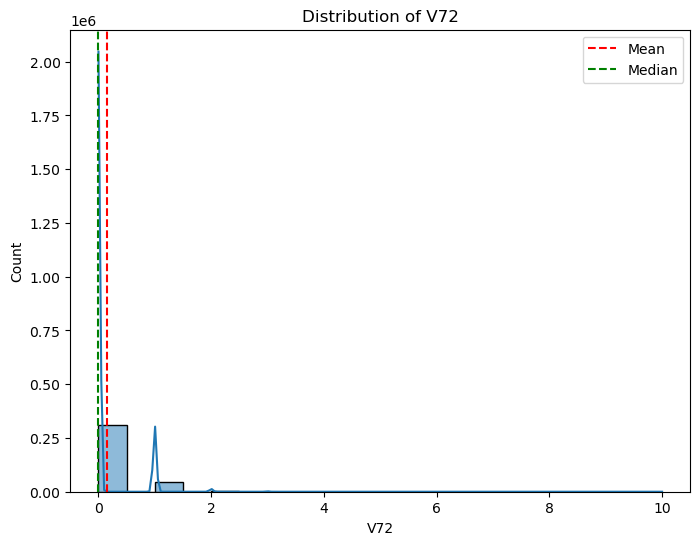

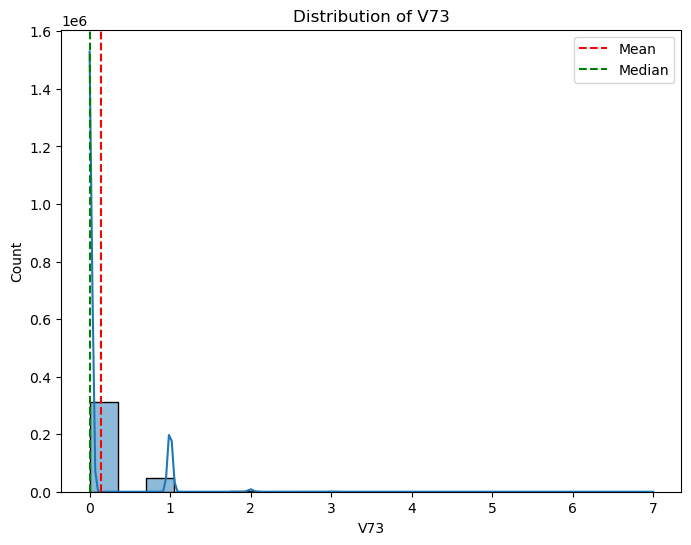

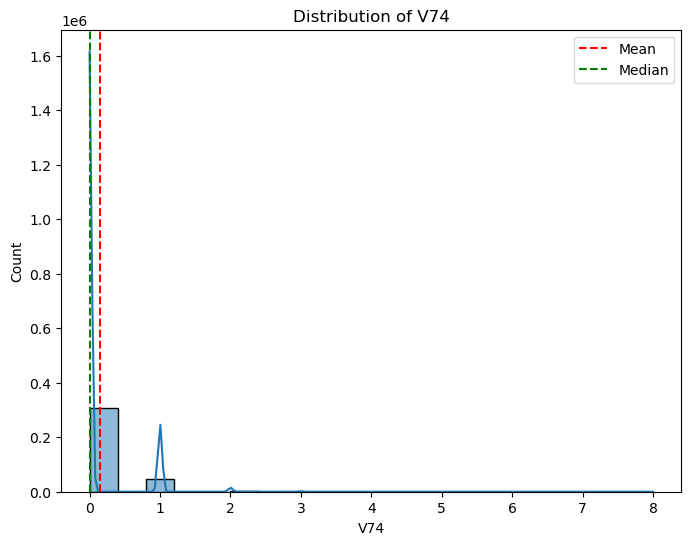

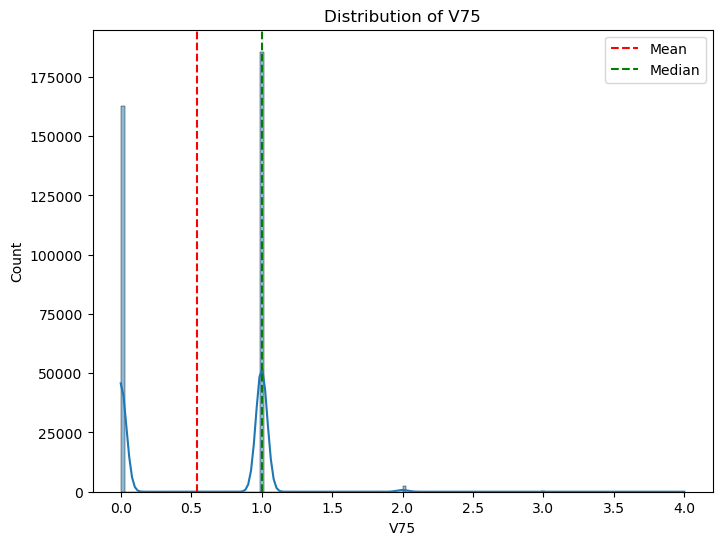

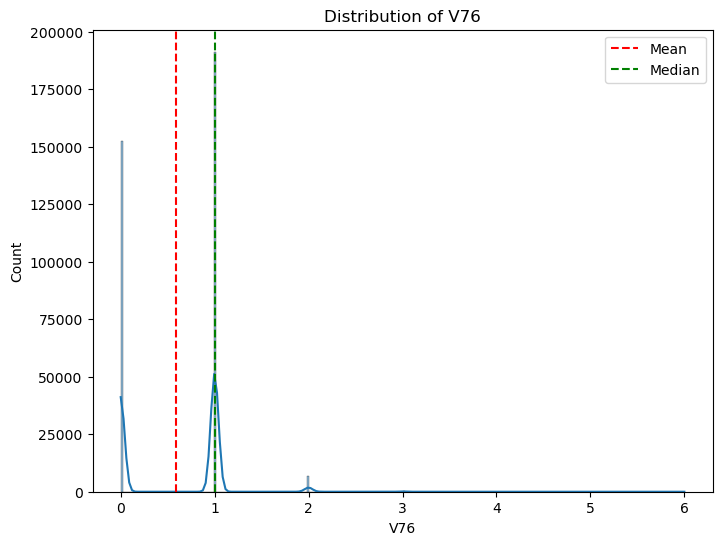

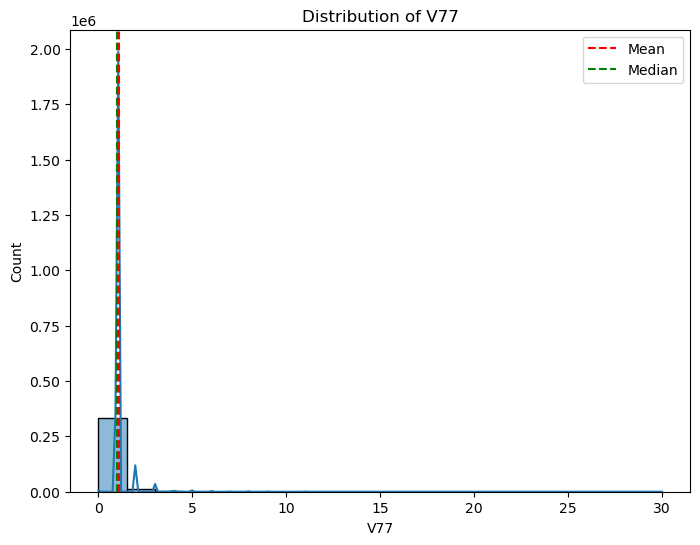

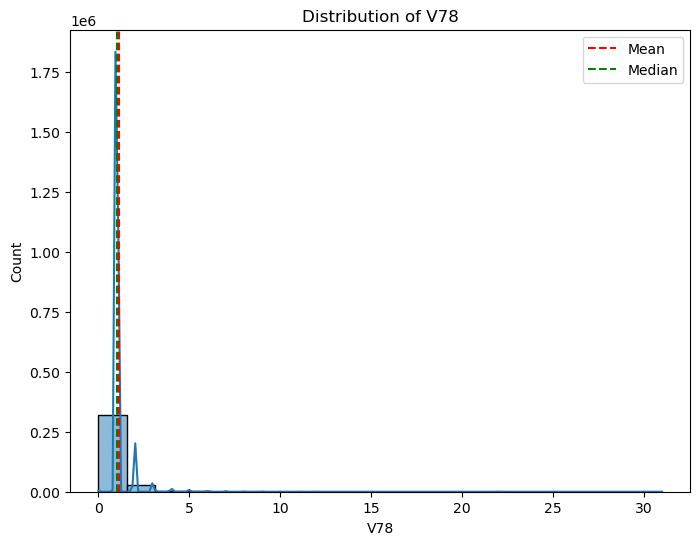

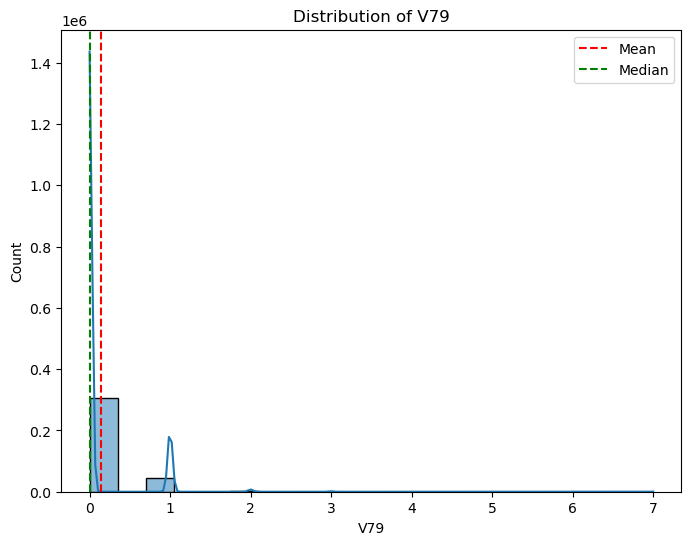

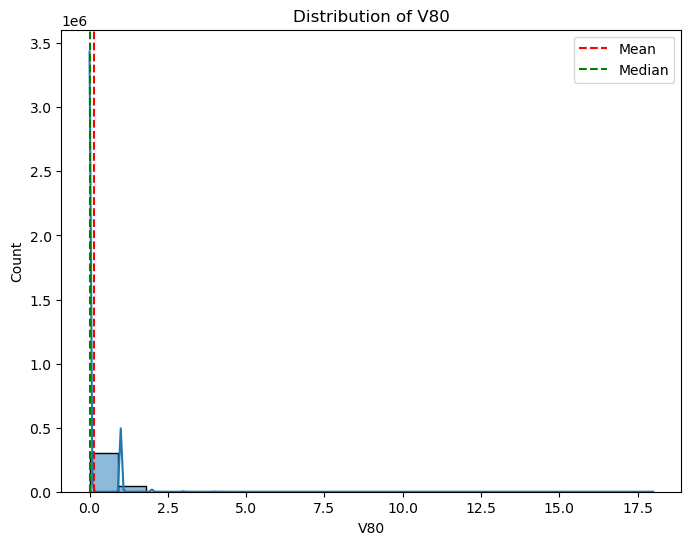

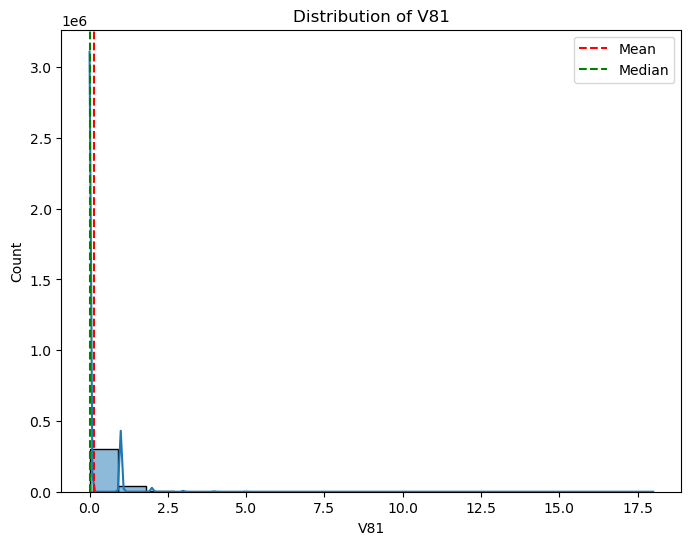

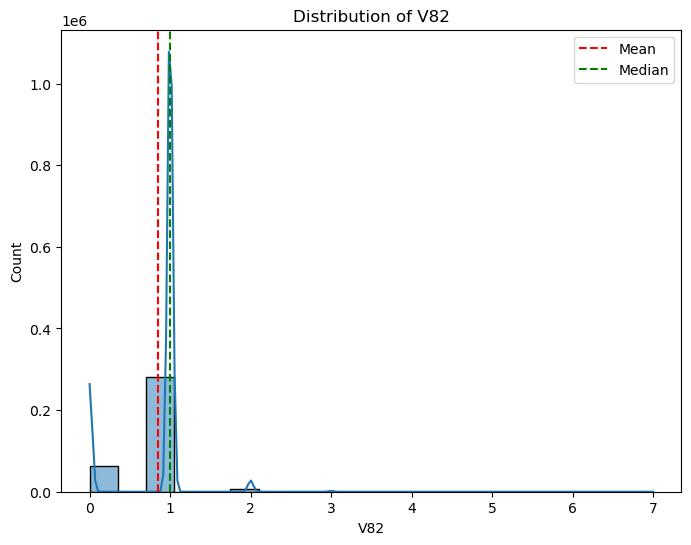

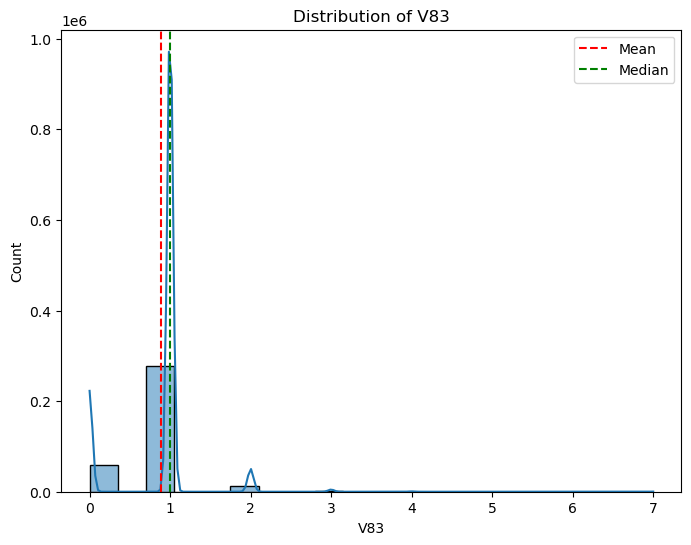

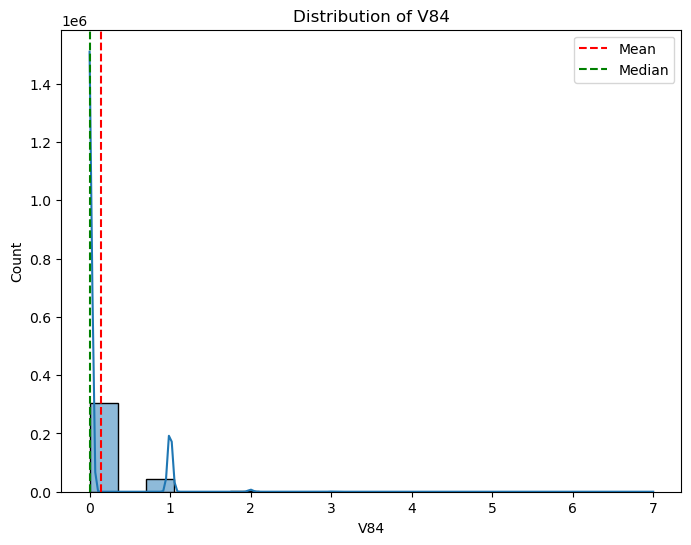

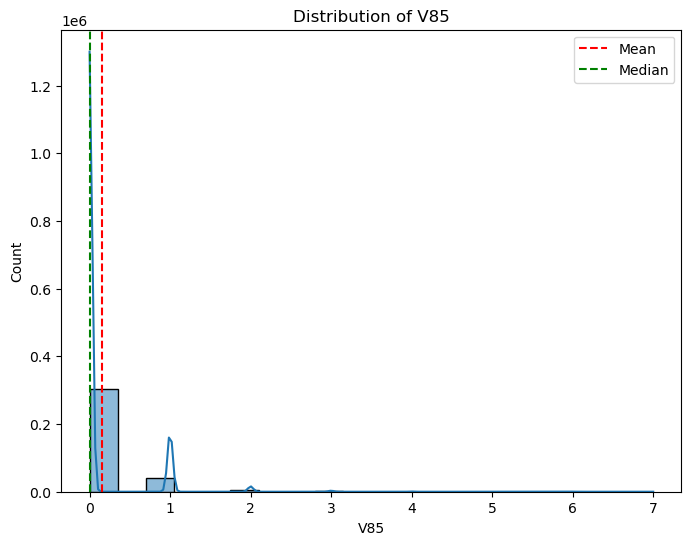

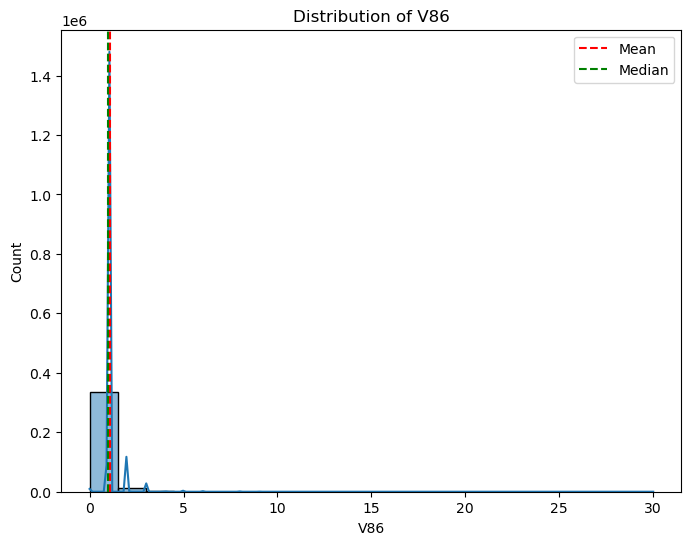

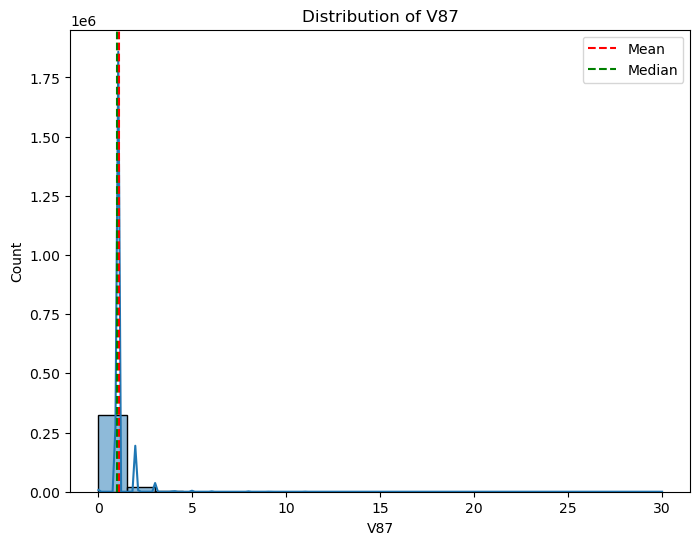

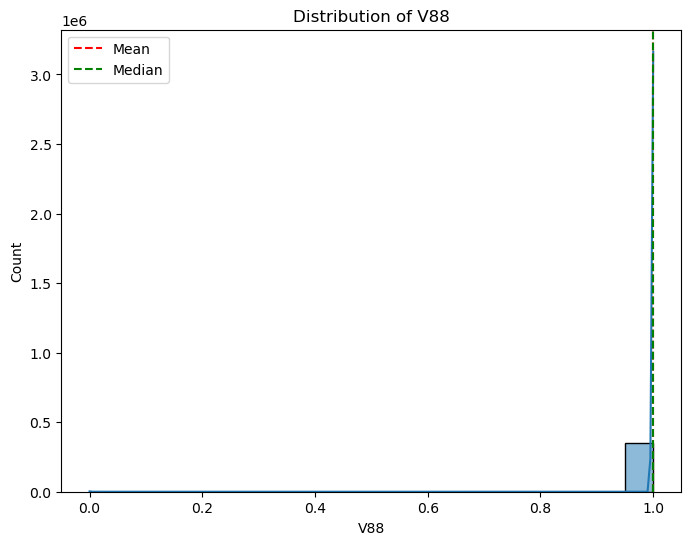

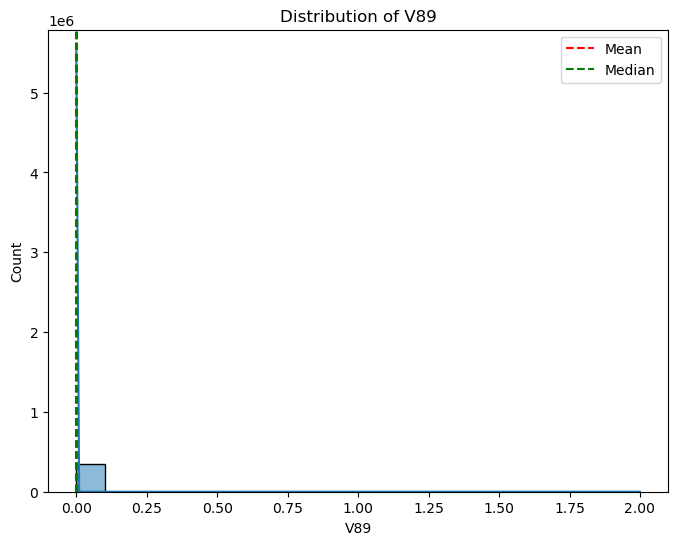

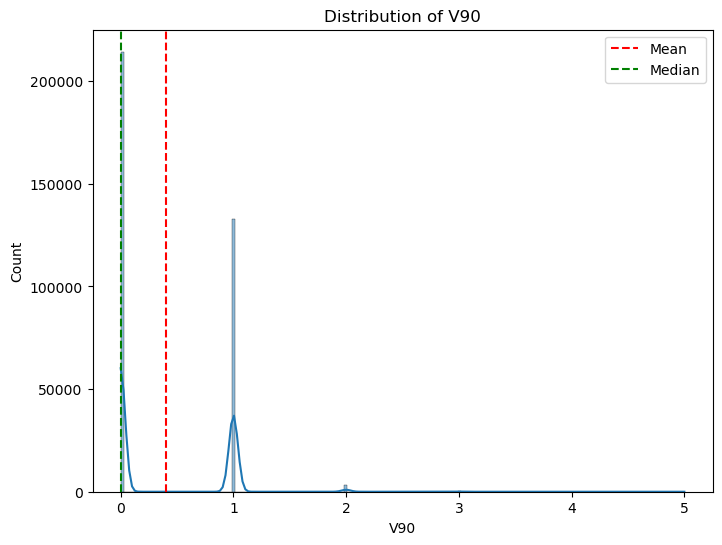

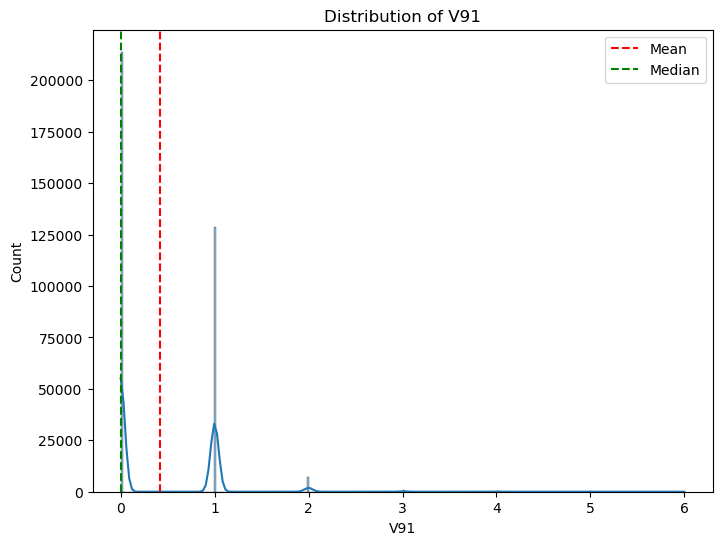

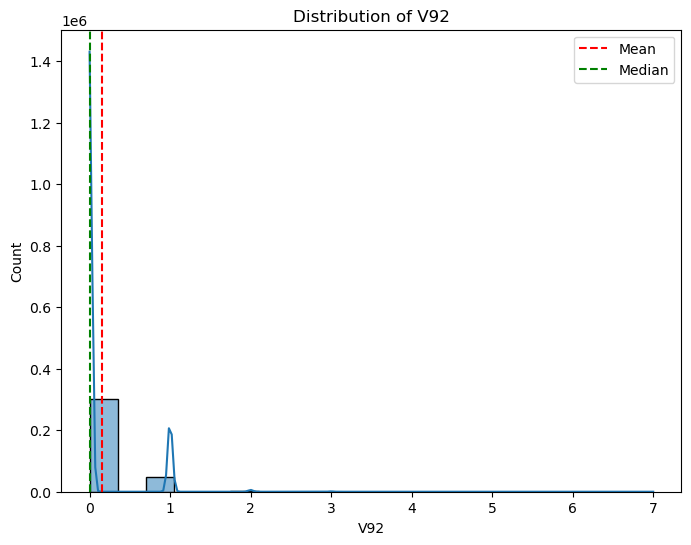

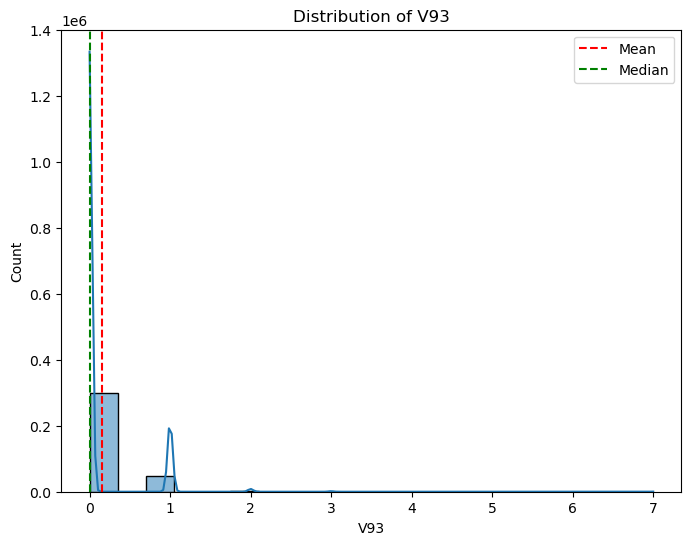

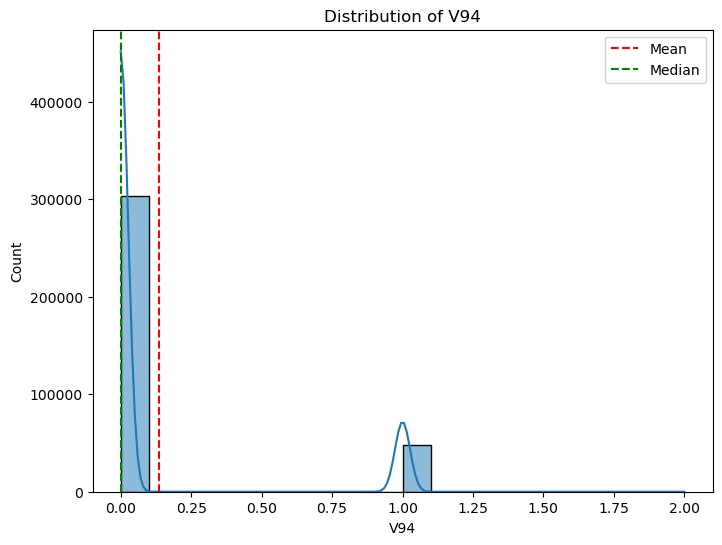

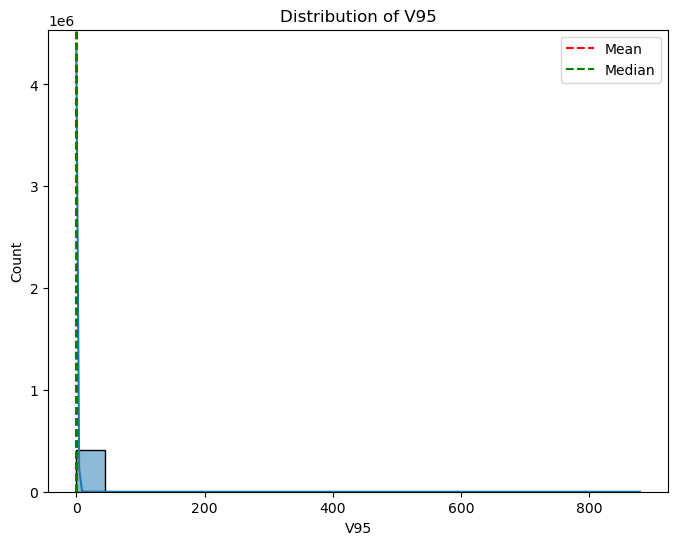

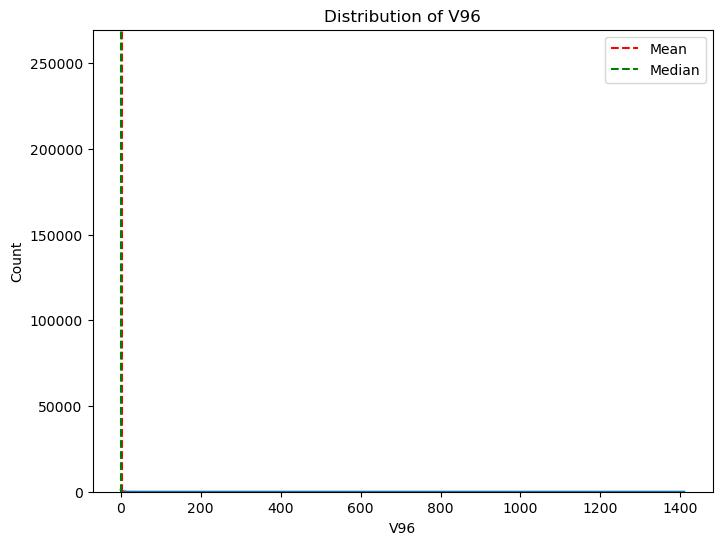

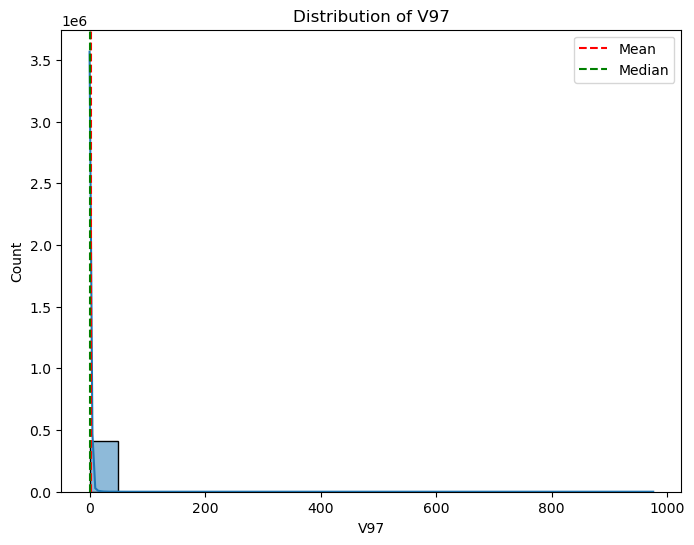

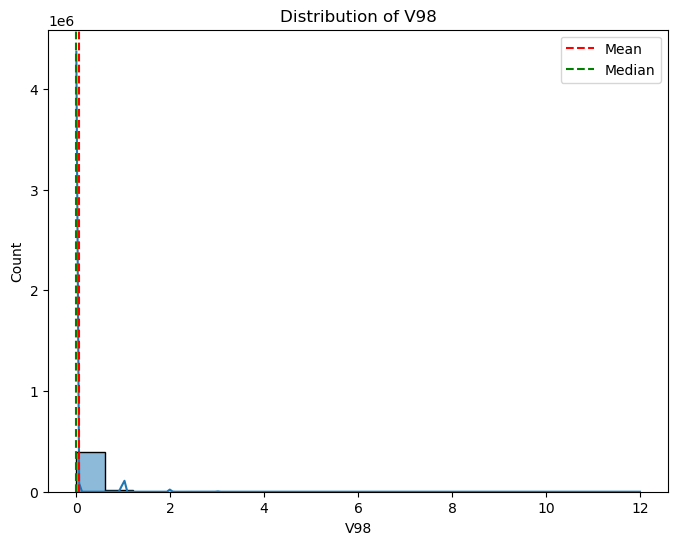

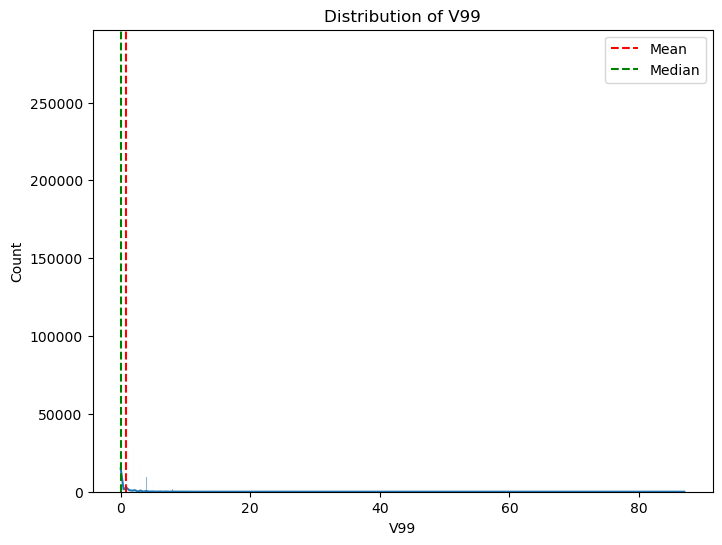

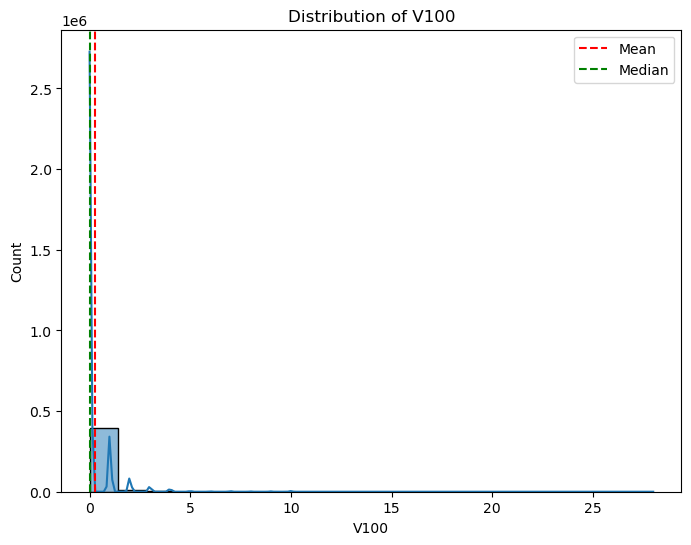

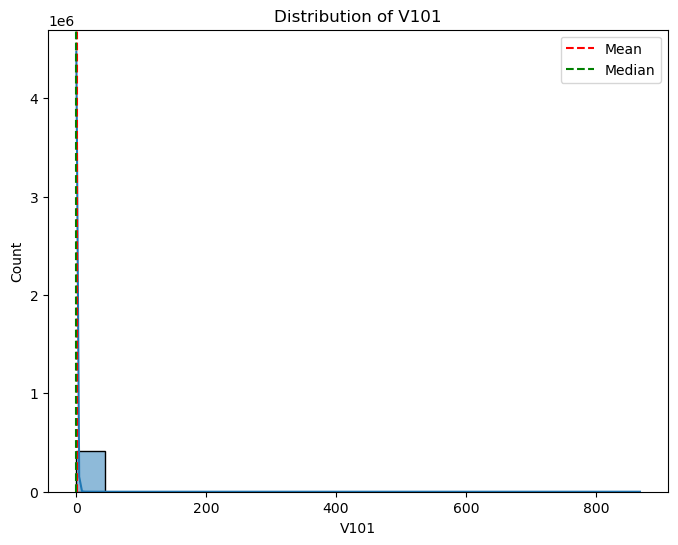

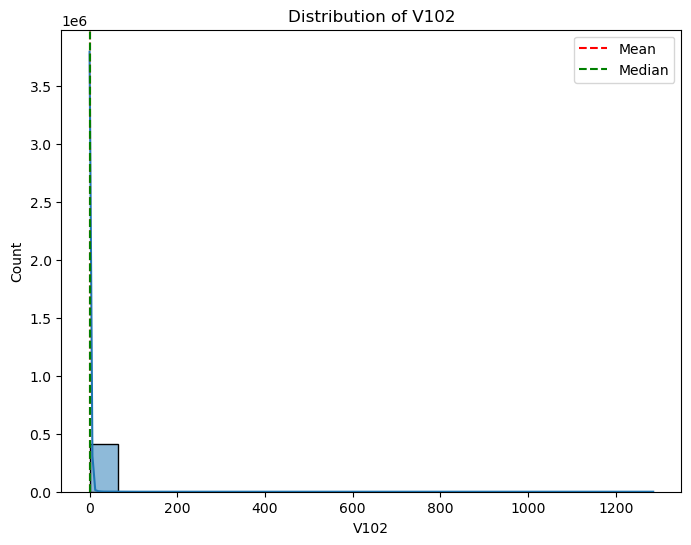

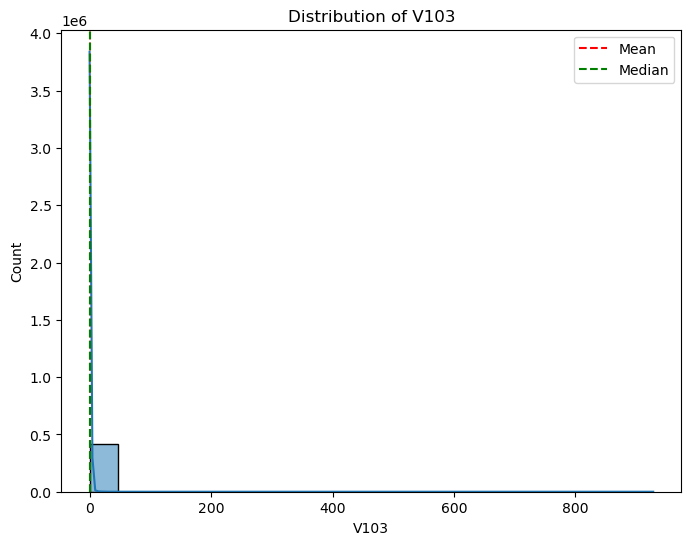

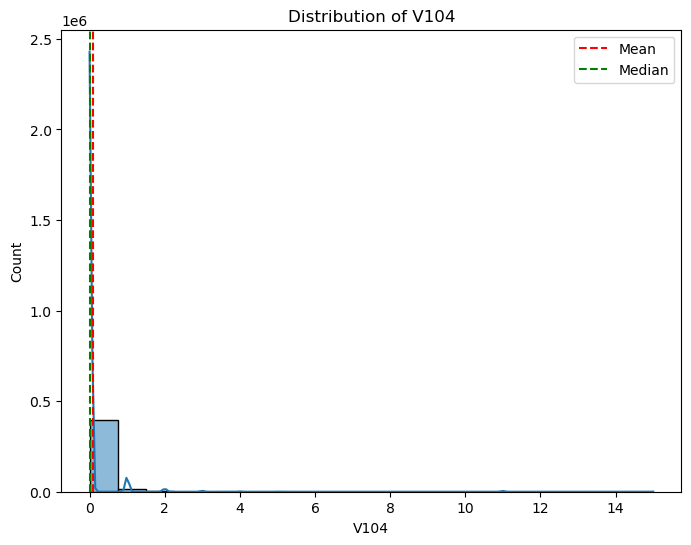

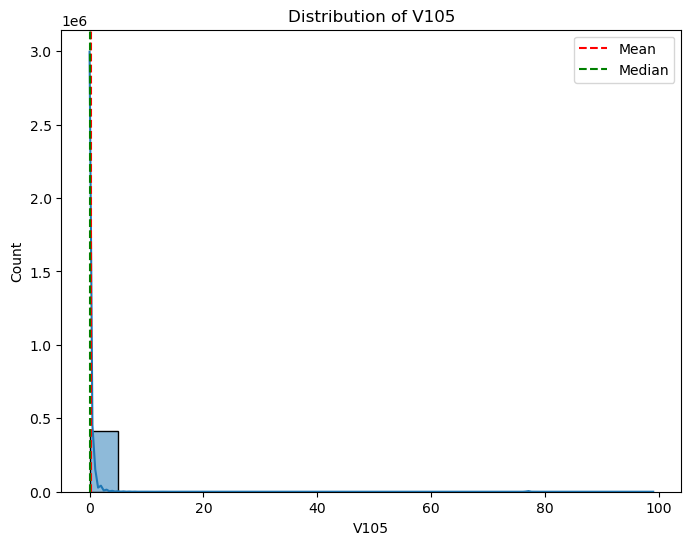

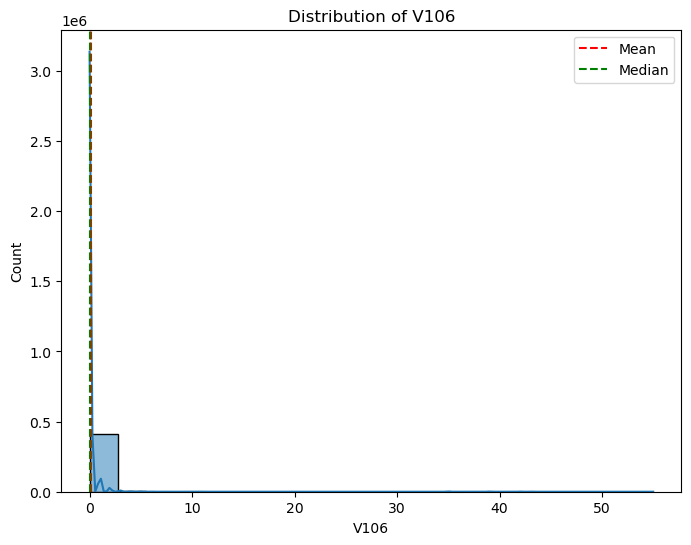

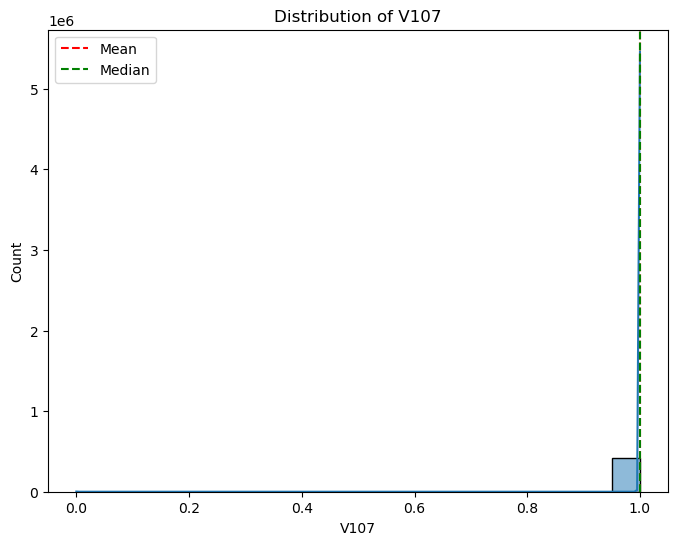

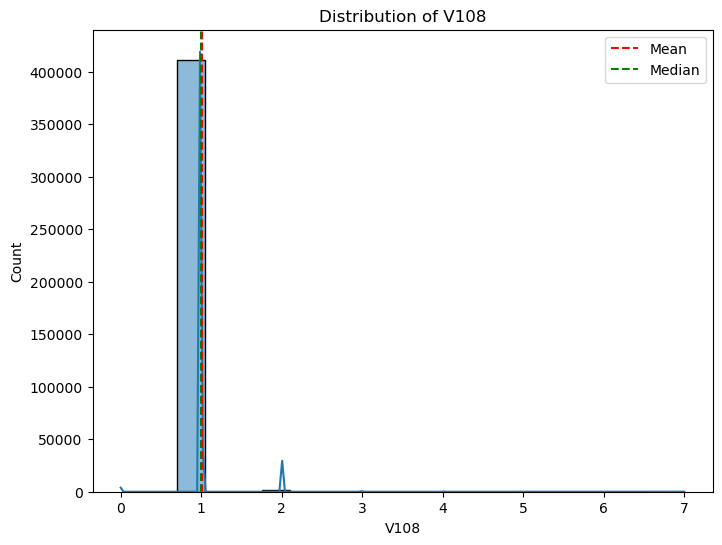

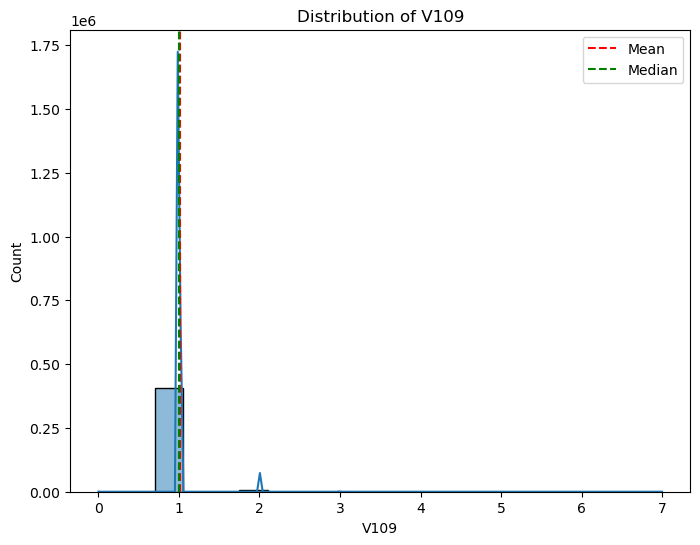

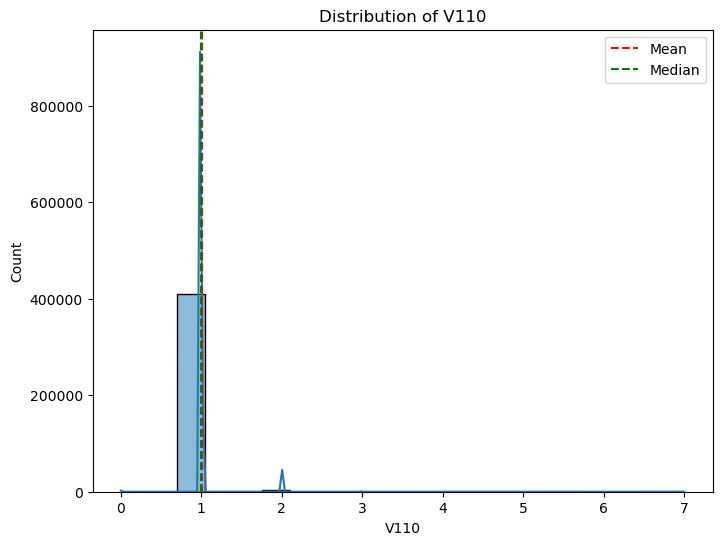

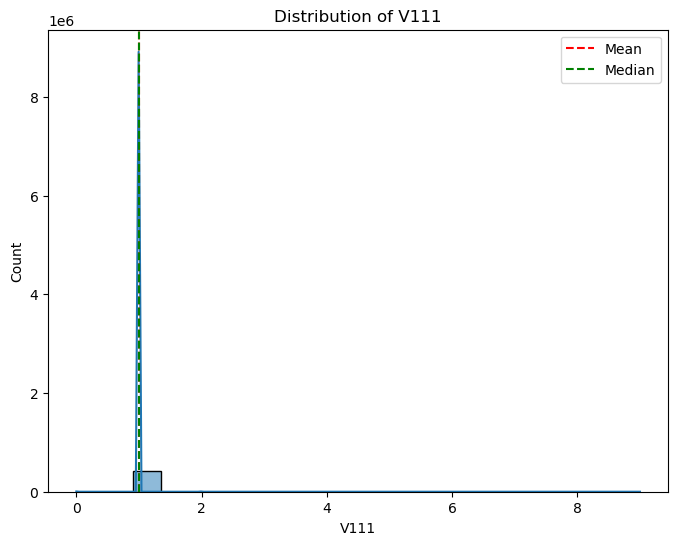

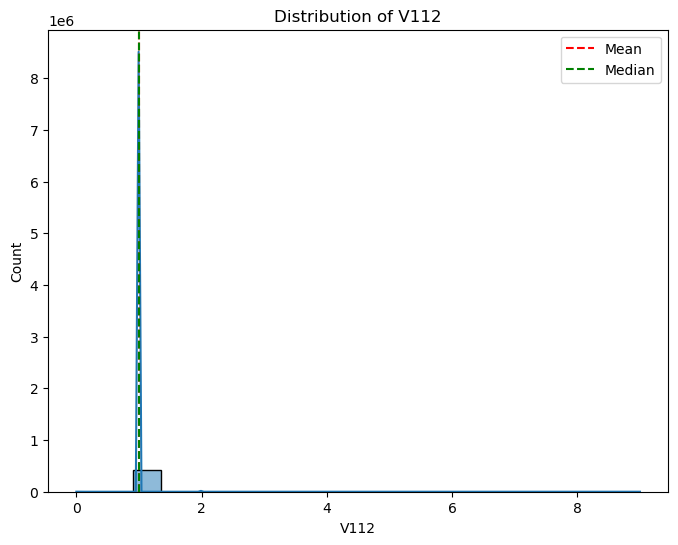

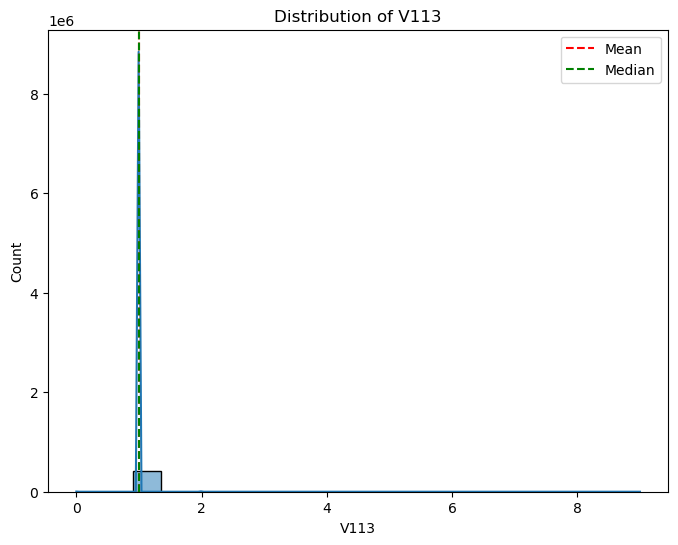

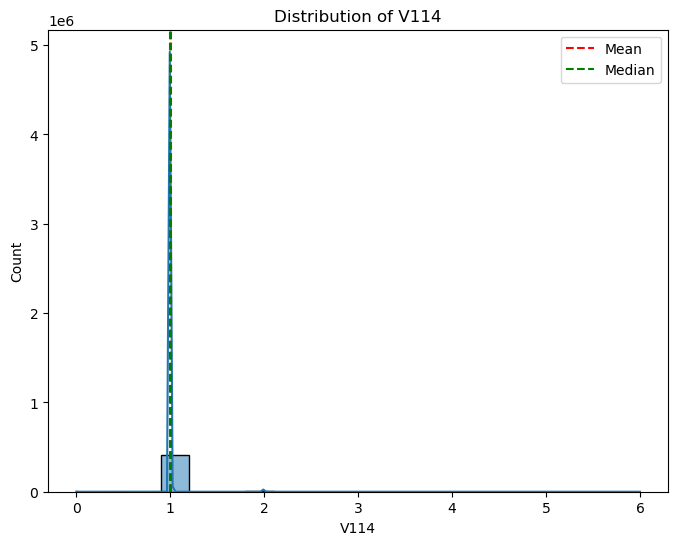

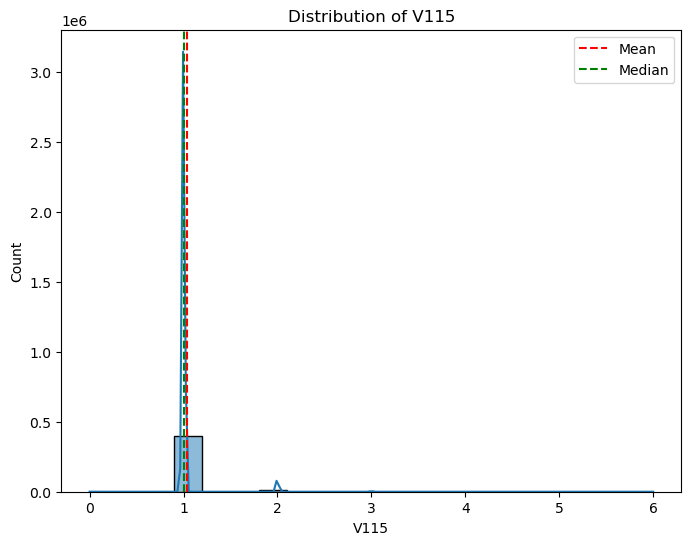

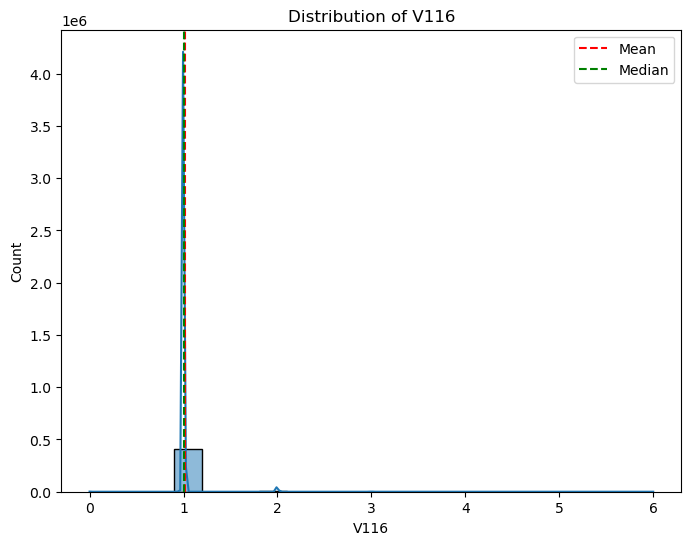

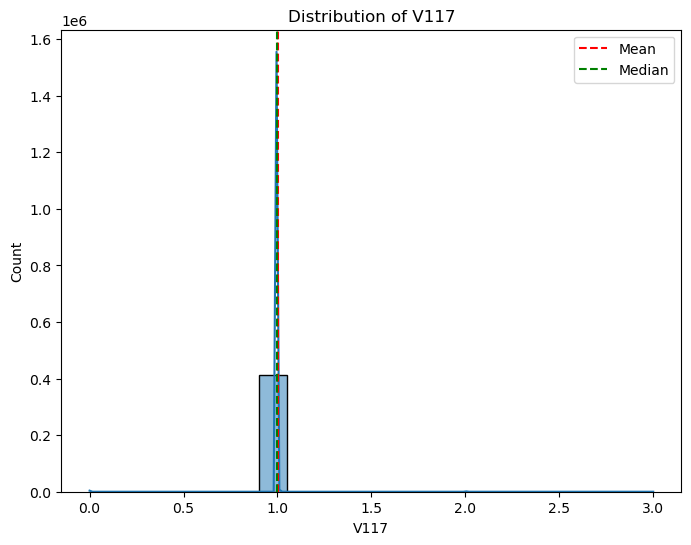

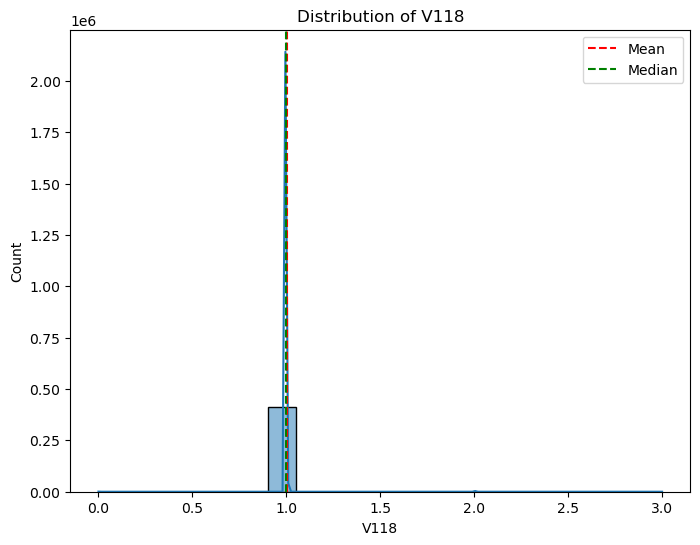

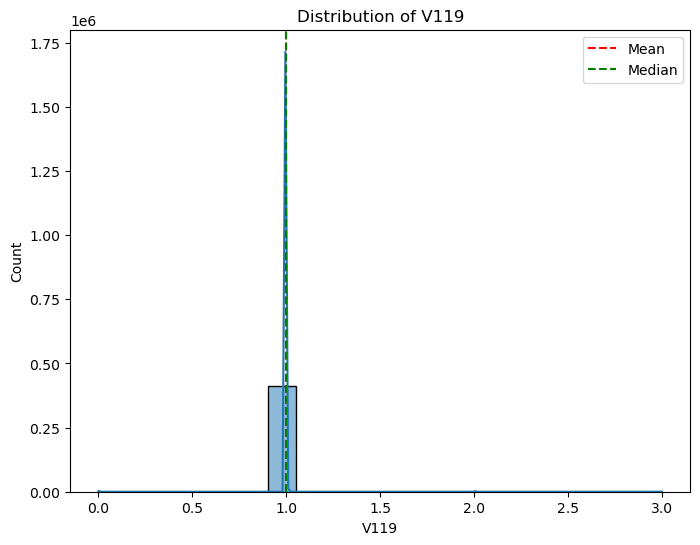

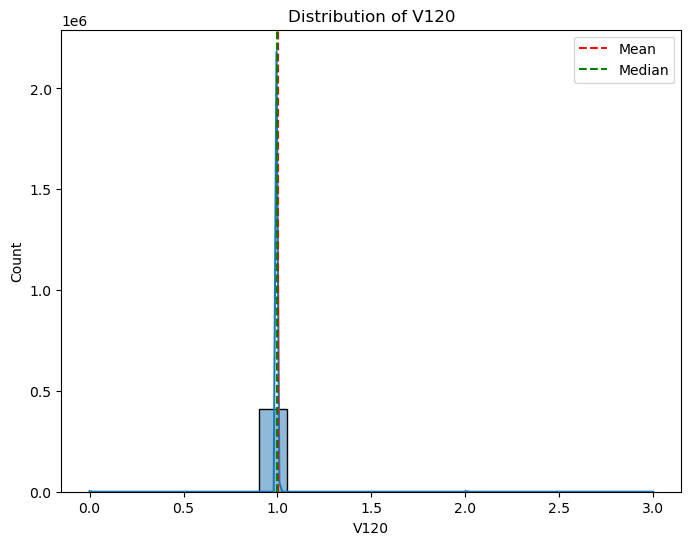

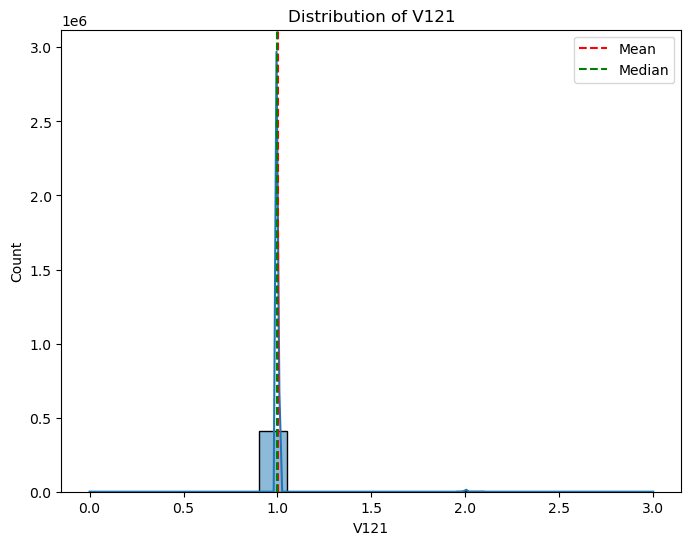

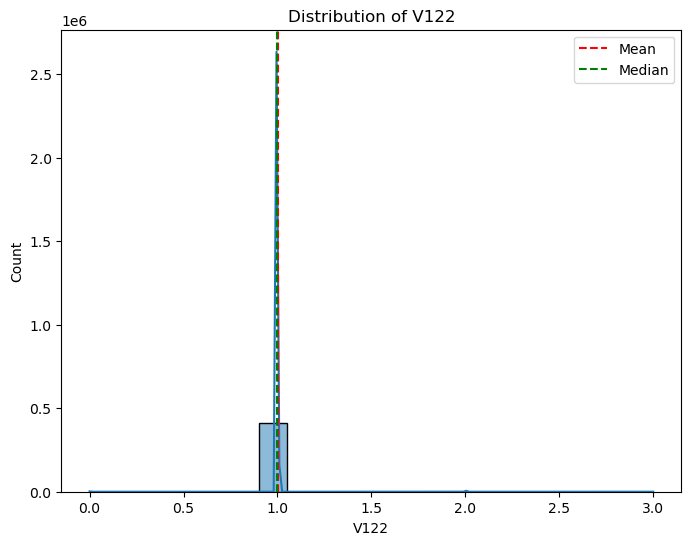

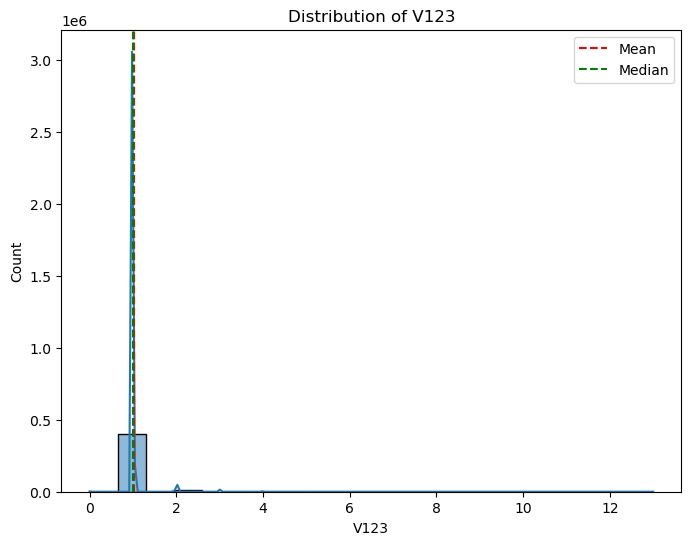

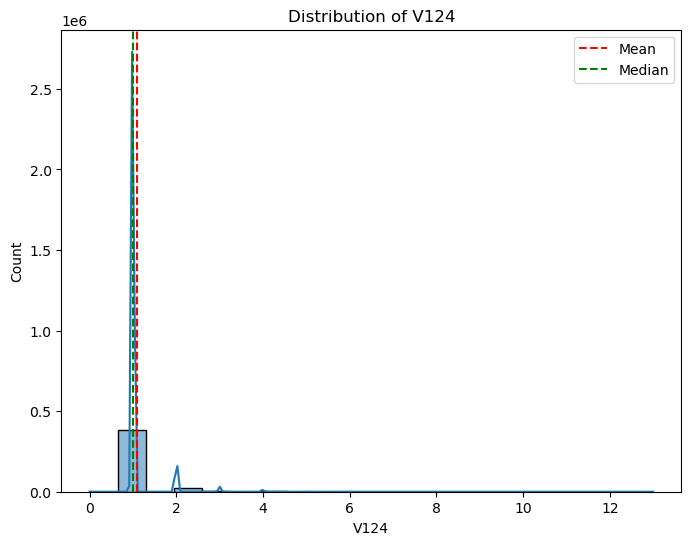

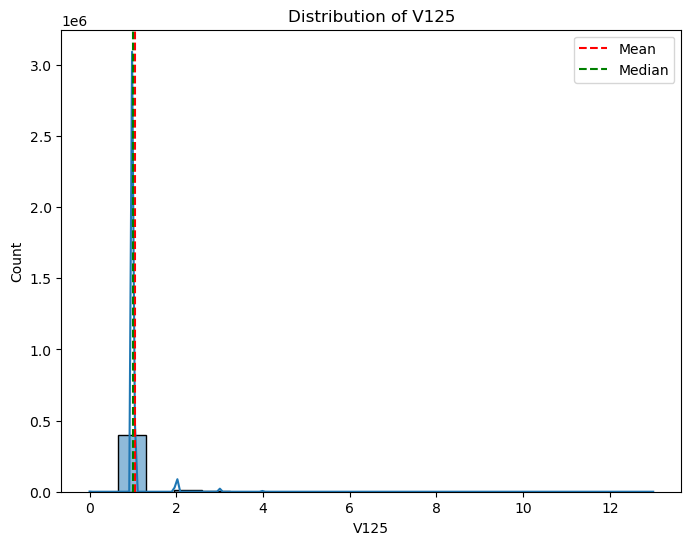

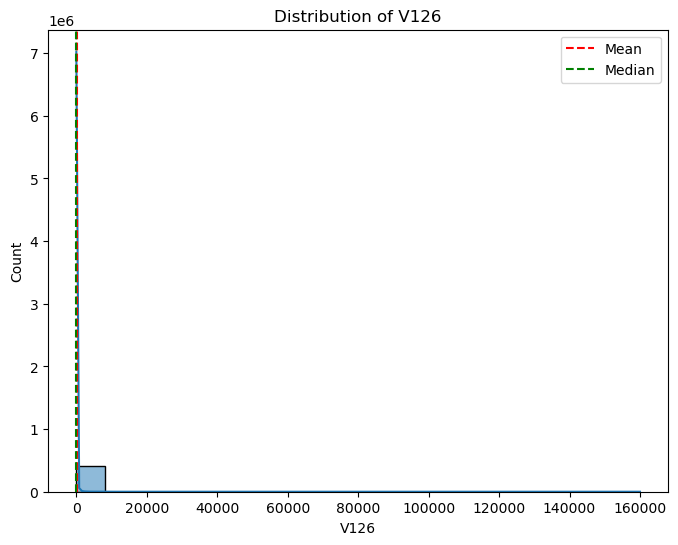

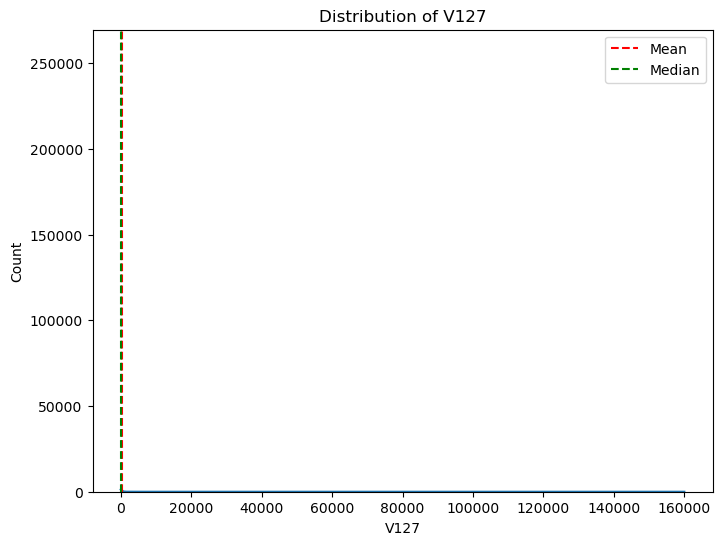

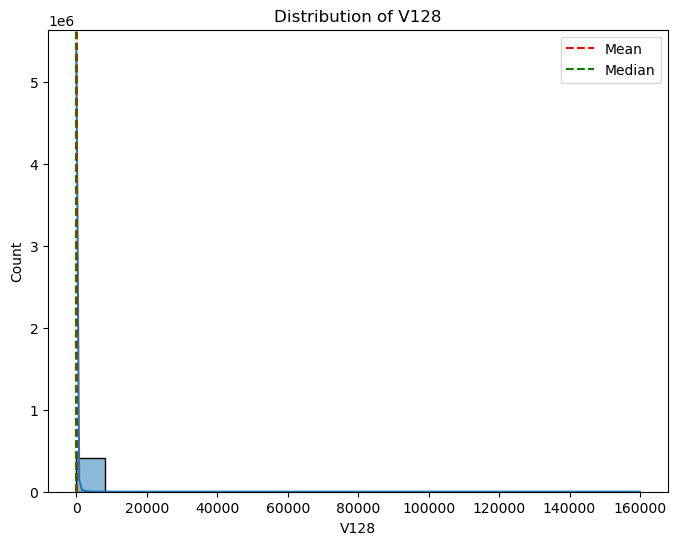

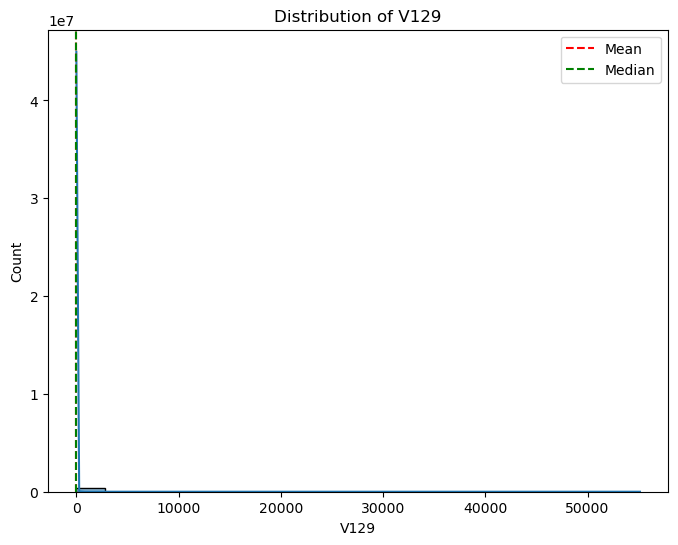

In [ ]:
# Mengambil kolom-kolom numerik saja
numeric_cols = df_train.select_dtypes(include='number').columns

# Meloop melalui setiap kolom numerik
for col in numeric_cols:
    # Menampilkan distribusi data menggunakan histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_train, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Menambahkan garis vertikal untuk menunjukkan rata-rata
    mean_val = df_train[col].mean()
    plt.axvline(mean_val, color='red', linestyle='--', label='Mean')

    # Menambahkan garis vertikal untuk menunjukkan median
    median_val = df_train[col].median()
    plt.axvline(median_val, color='green', linestyle='--', label='Median')

    plt.legend()
    plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil kolom-kolom numerik saja
numeric_cols = df_train.select_dtypes(include='number').columns

# Meloop melalui setiap kolom numerik
for col in numeric_cols:
    # Menampilkan distribusi data menggunakan boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_train, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil kolom-kolom numerik saja
numeric_cols = df_train.select_dtypes(include='number').columns

# Meloop melalui setiap kolom numerik
for col in numeric_cols:
    # Membuat plot KDE untuk nilai Non Fraud
    plt.figure(figsize=(8, 6))
    stay_kde = sns.kdeplot(df_train[col][(df_train["isFraud"] == 0)], color="Red", shade=True)
    
    # Membuat plot KDE untuk nilai Fraud
    exit_kde = sns.kdeplot(df_train[col][(df_train["isFraud"] == 1)], ax=stay_kde, color="Blue", shade=True)
    
    # Menambahkan legenda
    exit_kde.legend(["Non Fraud", "Fraud"], loc='upper right')
    
    # Mengatur label sumbu y
    exit_kde.set_ylabel('Density')
    
    # Mengatur label sumbu x
    exit_kde.set_xlabel(col)
    
    # Mengatur judul plot
    exit_kde.set_title(f'{col} by isFraud')
    
    # Menambahkan garis vertikal untuk menunjukkan rata-rata Non Fraud
    stay_mean = df_train[col][df_train["isFraud"] == 0].mean()
    plt.axvline(stay_mean, 0, 1, color="r")
    
    # Menambahkan garis vertikal untuk menunjukkan rata-rata Fraud
    exit_mean = df_train[col][df_train["isFraud"] == 1].mean()
    plt.axvline(exit_mean, 0, 1, color="b")
    
    plt.show()

## Kesimpulan

1. Data yang tidak diperuntukan untuk pemodelan dan eda akan  langsung di drop pada data preparation yakni kolom 

* ['dist1', 'dist2', 'R_emaildomain', 'D5', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'M5', 'M7', 'M8', 'M9', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


2. Imputasi Data 

* Kolom Numerik

Rules :

* jika kolom mendapati skewnya sebesar > +- 0.5, maka dari itu kolom tersebut akan diimputasi dengan median
* jika kolom mendapati skewnya sebesar <= +- 0.5 kolom lainnya akan diimputasi dengan mean

Kolom dengan skewness di atas 0.5: ['isFraud', 'TransactionAmt', 'card3', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D10', 'D11', 'D15', 'V2', 'V3', 'V6', 'V7', 'V8', 'V9', 'V11', 'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V23', 'V24', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V37', 'V38', 'V39', 'V40', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V62', 'V63', 'V64', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V77', 'V78', 'V79', 'V80', 'V81', 'V83', 'V84', 'V85', 'V86', 'V87', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']

Kolom dengan skewness di bawah 0.5: ['card1', 'card2', 'card5', 'addr1', 'addr2', 'V1', 'V4', 'V5', 'V10', 'V12', 'V13', 'V14', 'V19', 'V20', 'V25', 'V35', 'V36', 'V41', 'V53', 'V54', 'V61', 'V65', 'V66', 'V75', 'V76', 'V82', 'V88', 'V107']

* Kolom Kategorik

Sementara akan menggunakan imputasi menggunakan kata "kosong"

3. EDA Kolom Kategorikal menggunakan countplot

Countplot untuk keseluruhan data tanpa melihat kelas non fraud dan fraud

* Frekuensi Transaksi pada ProductCD tertinggi yakni produk W 74.5%, selanjutnya C 11.6%, R 6.4%, H 5.6% dan S 2.5%
* Frekuensi Transaksi pada card4 tertinggi yakni produk visa 65.2%, selanjutnya mastercard 32.0%, american express 1.4%, dan discover 1.1%
* Frekuensi Transaksi pada card6 tertinggi yakni produk debit 74.5%, selanjutnya credit 25.2%, dan debit credit serta charge card yang masing masing sebesar 0%
* Frekuensi Transaksi pada P_emaildomain tertinggi yakni gmail.com 38.7%, yahoo.com 17.7% hotmail.com 7.7% anonymous.com 6.3% aol.com 4.%  

Countplot berdasarkan kelas non fraud dan fraud

* Secara umum, seluruh kelas non fraud jauh lebih mendominasi untuk masing masing kolom kategorik yang akan diekplorasi dibandingkan dengan kelas fraud
* Frekuensi Transaksi ProductCD pada kelas fraud tertinggi diawali dengan produk W sebesar 1.5%, C sebesar 1.4%, H sebesar 0.3%, R sebesar 0.2% dan S sebesar 0.1%
* Frekuensi Transaksi card4 pada kelas fraud tertinggi diawali dengan produk visa sebesar 2.3%, mastercard sebesar 1.1%, discover sebesar 0.1% dan american express sebesar 0.0% 
* Frekuensi Transaksi card6 pada kelas fraud tertinggi diawali dengan produk debit sebesar 1.8%, credit sebesar 1.7%, debit or credit sebesar 0.0% dan charge card sebesar 0.0% 
* Frekuensi Transaksi menggunakan email atau P_emaildomain pada kelas fraud tertinggi diawali dengan gmail.com sebesar 2.3%, hotmail.com sebesar 0.5%, yahoo.com sebesar 0.5%, anonymous.com sebesar 0.2%, dan aol.com sebesar 0.1% 

4. Data Imbalance, maka perlu dilakukan balancing data untuk menyeimbangkan label target yakni 96.5% untuk fraud dan 3.5% untuk fraud

5. Outlier Detection, memang terdapat titik yang menggambarkan oulier, namun data tersebut dibutuhkan untuk proses deteksi fraud